# **Load Libraries**

In [ ]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from tensorflow import data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mae
from tensorflow.keras import layers
from tensorflow.keras import metrics
from tensorflow import keras


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, Input
from keras import utils
from keras.metrics import BinaryCrossentropy, MeanSquaredError, TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC, Accuracy, CategoricalAccuracy
from keras.metrics import F1Score
from keras.layers import LeakyReLU

from sklearn.metrics import roc_curve, RocCurveDisplay, auc
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import Adam, RMSprop, SGD

import tempfile
from itertools import cycle

from kerastuner import HyperModel, RandomSearch, Objective
import kerastuner as kt
from kerastuner.tuners import GridSearch
from kerastuner.engine.hyperparameters import HyperParameters
from kerastuner.engine.hypermodel import HyperModel

from tensorflow.keras.utils import plot_model, to_categorical
from PIL import Image
from imblearn.under_sampling import NeighbourhoodCleaningRule

from google.colab import drive
import os

<ipython-input-3-ae4c215c462c>:33: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel, RandomSearch, Objective


# **Initial Data Analysis**

## **Load the data from the zip files**


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Check current working directory
!pwd

In [ ]:
#Change current working directory
os.chdir('/content/drive/My Drive/Colab Notebooks/Machine Learning and AI/Coursework 2 (Group)/Datasets')

In [ ]:
#Load Testing Dataset
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning and AI/Coursework 2 (Group)/Datasets/ECG5000_TEST.txt')
test_df.head()

1.0000000e+00   3.6908442e+00   7.1141435e-01  -2.1140915e+00  -4.1410068e+00  -4.5744716e+00  -3.4319085e+00  -1.9507914e+00  -1.1070667e+00  -6.3232248e-01   3.3457718e-01   8.7883579e-01   8.3106672e-01   8.3246584e-01   7.9099271e-01   7.3318448e-01   6.7531414e-01   7.6075122e-01   6.4545074e-01   6.4472425e-01   5.9314006e-01   6.0070077e-01   4.9679470e-01   4.0954629e-01   3.3081901e-01   1.5958058e-01   2.0091363e-01   1.0775284e-01  -3.9164736e-02  -9.6833474e-02  -1.7062963e-01  -2.9695160e-01  -3.8126935e-01  -3.6309706e-01  -5.0136180e-01  -6.7307625e-01  -5.5188068e-01  -6.5094102e-01  -5.4260816e-01  -6.6110174e-01  -5.8118387e-01  -4.5428738e-01  -4.5106516e-01  -2.9907368e-01  -2.1448719e-01  -7.6921402e-02   1.0233773e-01   2.0839504e-01   1.5054113e-01   2.1366603e-01   2.4493933e-01   3.0699451e-01   3.3835116e-01   3.4609696e-01   4.1369076e-01   4.4100555e-01   3.9159341e-01   4.1750854e-01   3.0276646e-01   3.8036357e-01   2.8972908e-01   3.7412731e-01   3.9876561e-01   3.6499806e-01   6.3122707e-01   5.0918961e-01   4.6911811e-01   6.1013159e-01   5.9380291e-01   5.6851494e-01   6.1854890e-01   7.5104048e-01   4.9345872e-01   5.3952164e-01   6.4126341e-01   6.0935203e-01   5.9405769e-01   4.0790413e-01   4.2761301e-01   4.3085571e-01   4.1528731e-01   3.1350561e-01   3.5372391e-01   2.6930733e-01   1.6958593e-01   2.4089280e-01   1.3035327e-01   1.8621097e-01   2.4304193e-02  -6.8152656e-02   9.5436502e-03  -1.6012437e-01  -1.3560100e-01  -1.5552812e-01  -1.4475897e-01  -3.9798800e-03  -4.0228089e-02  -5.1341236e-02   3.8336424e-02   3.4101747e-01   6.1595840e-01   8.1549648e-01   9.1215047e-01   1.1970380e+00   1.5258563e+00   1.6774093e+00   1.4938024e+00   1.3328849e+00   1.0334170e+00   7.0938029e-01   5.0417612e-01   1.2197655e-01  -1.4469165e-01  -7.0622151e-01  -9.7195913e-01  -1.0928120e+00  -1.2048382e+00  -1.1141657e+00  -1.0873249e+00  -1.2853534e+00  -1.2481586e+00  -1.2101424e+00  -1.2784696e+00  -1.2789237e+00  -1.3769847e+00  -1.2328171e+00  -1.1899430e+00  -1.3444164e+00  -1.2390104e+00  -1.1742654e+00  -6.9966643e-01  -3.2476949e-02   2.2846766e-02   1.8893657e-01   4.8093188e-01   6.2925026e-01   5.7729083e-01   6.6552725e-01   1.0359968e+00   1.4922866e+00  -1.9050734e+00
0     1.0000000e+00  -1.3481323e+00  -3.9960376e+...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
#Load Training Dataset
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Machine Learning and AI/Coursework 2 (Group)/Datasets/ECG5000_TRAIN.txt')
train_df.head()

1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00  -1.8182865e+00  -1.2505219e+00  -4.7749208e-01  -3.6380791e-01  -4.9195659e-01  -4.2185509e-01  -3.0920086e-01  -4.9593870e-01  -3.4211867e-01  -3.5533627e-01  -3.6791303e-01  -3.1650279e-01  -4.1237405e-01  -4.7167181e-01  -4.1345783e-01  -3.6461703e-01  -4.4929829e-01  -4.7141866e-01  -4.2477658e-01  -4.6251673e-01  -5.5247236e-01  -4.7537519e-01  -6.9420000e-01  -7.0186810e-01  -5.9381178e-01  -6.6068415e-01  -7.1383066e-01  -7.6980688e-01  -6.7228161e-01  -6.5367605e-01  -6.3940562e-01  -5.5930228e-01  -5.9167032e-01  -4.9322332e-01  -4.6305183e-01  -3.0164382e-01  -2.3273401e-01  -1.2505488e-01  -1.5394314e-01  -2.4357404e-02  -6.5608758e-02   3.4999258e-02   6.1935219e-02   7.1195420e-02   1.2392505e-01   1.0312371e-01   2.2522849e-01   1.2868305e-01   3.0248315e-01   2.5727621e-01   1.9635161e-01   1.7938297e-01   2.4472863e-01   3.4121687e-01   3.2820441e-01   4.0604169e-01   4.4660507e-01   4.2406823e-01   4.8151204e-01   4.7784380e-01   6.2408259e-01   5.7458456e-01   5.9801319e-01   5.6459190e-01   6.0797900e-01   6.2063457e-01   6.5625291e-01   6.8474806e-01   6.9427284e-01   6.6558377e-01   5.7579577e-01   6.3813479e-01   6.1491695e-01   5.6908343e-01   4.6857572e-01   4.4281777e-01   4.6827436e-01   4.3249295e-01   4.0795792e-01   4.1862256e-01   3.6253075e-01   4.1095901e-01   4.7166633e-01   3.7216676e-01   3.3787543e-01   2.2140511e-01   2.7399747e-01   2.9866408e-01   2.6356357e-01   3.4256352e-01   4.1950529e-01   5.8660736e-01   8.6062387e-01   1.1733446e+00   1.2581791e+00   1.4337887e+00   1.7005334e+00   1.9990431e+00   2.1253411e+00   1.9932907e+00   1.9322463e+00   1.7974367e+00   1.5222839e+00   1.2511679e+00   9.9873034e-01   4.8372242e-01   2.3132292e-02  -1.9491383e-01  -2.2091729e-01  -2.4373668e-01  -2.5469462e-01  -2.9113555e-01  -2.5649034e-01  -2.2787425e-01  -3.2242276e-01  -2.8928586e-01  -3.1816951e-01  -3.6365359e-01  -3.9345584e-01  -2.6641886e-01  -2.5682316e-01  -2.8869399e-01  -1.6233755e-01   1.6034772e-01   7.9216787e-01   9.3354122e-01   7.9695779e-01   5.7862066e-01   2.5773990e-01   2.2807718e-01   1.2343082e-01   9.2528624e-01   1.9313742e-01
0     1.0000000e+00  -1.1008778e+00  -3.9968398e+...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

## **Verify no records are missing**


In [ ]:
test_df.shape

(4499, 1)

In [ ]:
train_df.shape

(499, 1)

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Machine Learning and AI/Coursework 2 (Group)/Datasets/ECG5000_TEST.txt'
df1 = pd.read_csv(file_path, header=None, names=['Heart_Data'])
df1 = df1['Heart_Data'].str.split(expand=True)
df1.head()

0               1               2               3    \
0  1.0000000e+00   3.6908442e+00   7.1141435e-01  -2.1140915e+00   
1  1.0000000e+00  -1.3481323e+00  -3.9960376e+00  -4.2267496e+00   
2  1.0000000e+00   1.0242946e+00  -5.9031419e-01  -1.9169491e+00   
3  1.0000000e+00   5.4565692e-01  -1.0143830e+00  -2.3166977e+00   
4  1.0000000e+00   6.6113283e-01  -1.5524706e+00  -3.1246406e+00   

              4               5               6               7    \
0  -4.1410068e+00  -4.5744716e+00  -3.4319085e+00  -1.9507914e+00   
1  -4.2511874e+00  -3.4779528e+00  -2.2284217e+00  -1.8084877e+00   
2  -2.8069890e+00  -3.5279051e+00  -3.6386750e+00  -2.7797674e+00   
3  -3.6340397e+00  -4.1968570e+00  -3.7580926e+00  -3.1944444e+00   
4  -4.3133515e+00  -4.0170422e+00  -3.0059934e+00  -1.8324110e+00   

              8               9    ...             131            132  \
0  -1.1070667e+00  -6.3232248e-01  ...  -3.2476949e-02  2.2846766e-02   
1  -1.5342415e+00  -7.7986138e-01  ...   9.3798389e-01  1.5709378e+00   
2  -2.0190308e+00  -1.9807535e+00  ...   3.6882000e-01  4.4350192e-01   
3  -2.2217637e+00  -1.5885544e+00  ...   8.9463842e-01  7.7752982e-01   
4  -1.5038856e+00  -1.0717055e+00  ...   1.4165819e+00  1.2808227e+00   

             133            134            135            136            137  \
0  1.8893657e-01  4.8093188e-01  6.2925026e-01  5.7729083e-01  6.6552725e-01   
1  1.5913944e+00  1.5491932e+00  1.1930770e+00  5.1513440e-01  1.2627351e-01   
2  8.2758242e-01  1.2370070e+00  1.2351214e+00  1.7381027e+00  1.8007674e+00   
3  1.1192396e+00  9.0298365e-01  5.5409760e-01  4.9705263e-01  4.1811561e-01   
4  1.4943155e+00  1.6187644e+00  1.4474491e+00  1.2385768e+00  1.7496922e+00   

             138            139             140  
0  1.0359968e+00  1.4922866e+00  -1.9050734e+00  
1  2.6753217e-01  1.0711484e+00  -1.1640090e+00  
2  1.8163009e+00  1.4739633e+00   1.3897666e+00  
3  7.0310771e-01  1.0646019e+00  -4.4853163e-02  
4  1.9868029e+00  1.4227564e+00  -3.5778384e-01  

[5 rows x 141 columns]

In [ ]:
df1.shape

(4500, 141)

In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/Machine Learning and AI/Coursework 2 (Group)/Datasets/ECG5000_TRAIN.txt'
df2 = pd.read_csv(file_path, header=None, names=['Heart_Data'])
df2 = df2['Heart_Data'].str.split(expand=True)
df2.head()

0               1               2               3    \
0  1.0000000e+00  -1.1252183e-01  -2.8272038e+00  -3.7738969e+00   
1  1.0000000e+00  -1.1008778e+00  -3.9968398e+00  -4.2858426e+00   
2  1.0000000e+00  -5.6708802e-01  -2.5934502e+00  -3.8742297e+00   
3  1.0000000e+00   4.9047253e-01  -1.9144071e+00  -3.6163638e+00   
4  1.0000000e+00   8.0023202e-01  -8.7425189e-01  -2.3847613e+00   

              4               5               6               7    \
0  -4.3497511e+00  -4.3760410e+00  -3.4749863e+00  -2.1814082e+00   
1  -4.5065789e+00  -4.0223767e+00  -3.2343676e+00  -1.5661258e+00   
2  -4.5840949e+00  -4.1874487e+00  -3.1514617e+00  -1.7429402e+00   
3  -4.3188235e+00  -4.2680158e+00  -3.8811104e+00  -2.9932802e+00   
4  -3.9732924e+00  -4.3382241e+00  -3.8024222e+00  -2.5345096e+00   

              8               9    ...            131            132  \
0  -1.8182865e+00  -1.2505219e+00  ...  1.6034772e-01  7.9216787e-01   
1  -9.9225766e-01  -7.5467971e-01  ...  5.6032676e-01  5.3835583e-01   
2  -1.4906585e+00  -1.1835803e+00  ...  1.2848254e+00  8.8607336e-01   
3  -1.6711314e+00  -1.3338845e+00  ...  4.9117320e-01  3.5081636e-01   
4  -1.7834233e+00  -1.5944504e+00  ...  9.6660600e-01  1.1488838e+00   

             133            134             135             136  \
0  9.3354122e-01  7.9695779e-01   5.7862066e-01   2.5773990e-01   
1  6.5688079e-01  7.8748958e-01   7.2404623e-01   5.5578372e-01   
2  5.3145240e-01  3.1137684e-01  -2.1918959e-02  -7.1368344e-01   
3  4.9911056e-01  6.0034499e-01   8.4206940e-01   9.5207354e-01   
4  9.5843425e-01  1.0590254e+00   1.3716823e+00   1.2773918e+00   

              137            138            139             140  
0   2.2807718e-01  1.2343082e-01  9.2528624e-01   1.9313742e-01  
1   4.7633335e-01  7.7381971e-01  1.1196209e+00  -1.4362499e+00  
2  -5.3219671e-01  3.2109663e-01  9.0422673e-01  -4.2179659e-01  
3   9.9013318e-01  1.0867984e+00  1.4030110e+00  -3.8356426e-01  
4   9.6030393e-01  9.7101956e-01  1.6143924e+00   1.4214563e+00  

[5 rows x 141 columns]

In [ ]:
df2.shape

(500, 141)

In [ ]:
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.head()

0               1               2               3    \
0  1.0000000e+00   3.6908442e+00   7.1141435e-01  -2.1140915e+00   
1  1.0000000e+00  -1.3481323e+00  -3.9960376e+00  -4.2267496e+00   
2  1.0000000e+00   1.0242946e+00  -5.9031419e-01  -1.9169491e+00   
3  1.0000000e+00   5.4565692e-01  -1.0143830e+00  -2.3166977e+00   
4  1.0000000e+00   6.6113283e-01  -1.5524706e+00  -3.1246406e+00   

              4               5               6               7    \
0  -4.1410068e+00  -4.5744716e+00  -3.4319085e+00  -1.9507914e+00   
1  -4.2511874e+00  -3.4779528e+00  -2.2284217e+00  -1.8084877e+00   
2  -2.8069890e+00  -3.5279051e+00  -3.6386750e+00  -2.7797674e+00   
3  -3.6340397e+00  -4.1968570e+00  -3.7580926e+00  -3.1944444e+00   
4  -4.3133515e+00  -4.0170422e+00  -3.0059934e+00  -1.8324110e+00   

              8               9    ...             131            132  \
0  -1.1070667e+00  -6.3232248e-01  ...  -3.2476949e-02  2.2846766e-02   
1  -1.5342415e+00  -7.7986138e-01  ...   9.3798389e-01  1.5709378e+00   
2  -2.0190308e+00  -1.9807535e+00  ...   3.6882000e-01  4.4350192e-01   
3  -2.2217637e+00  -1.5885544e+00  ...   8.9463842e-01  7.7752982e-01   
4  -1.5038856e+00  -1.0717055e+00  ...   1.4165819e+00  1.2808227e+00   

             133            134            135            136            137  \
0  1.8893657e-01  4.8093188e-01  6.2925026e-01  5.7729083e-01  6.6552725e-01   
1  1.5913944e+00  1.5491932e+00  1.1930770e+00  5.1513440e-01  1.2627351e-01   
2  8.2758242e-01  1.2370070e+00  1.2351214e+00  1.7381027e+00  1.8007674e+00   
3  1.1192396e+00  9.0298365e-01  5.5409760e-01  4.9705263e-01  4.1811561e-01   
4  1.4943155e+00  1.6187644e+00  1.4474491e+00  1.2385768e+00  1.7496922e+00   

             138            139             140  
0  1.0359968e+00  1.4922866e+00  -1.9050734e+00  
1  2.6753217e-01  1.0711484e+00  -1.1640090e+00  
2  1.8163009e+00  1.4739633e+00   1.3897666e+00  
3  7.0310771e-01  1.0646019e+00  -4.4853163e-02  
4  1.9868029e+00  1.4227564e+00  -3.5778384e-01  

[5 rows x 141 columns]

In [ ]:
combined_df.tail()

0               1               2               3    \
4995  4.0000000e+00  -4.7857737e-01  -1.7799590e+00  -2.3981589e+00   
4996  4.0000000e+00  -1.3252098e+00  -2.4809922e+00  -2.9653559e+00   
4997  4.0000000e+00  -2.1963843e-02  -9.1243389e-01  -1.9033529e+00   
4998  5.0000000e+00   2.8801100e-01  -1.0980196e+00  -2.5002499e+00   
4999  5.0000000e+00  -1.1336738e+00  -2.7029409e+00  -3.1209789e+00   

                 4               5               6               7    \
4995  -3.1701118e+00  -3.5597319e+00  -3.5739558e+00  -2.9897701e+00   
4996  -3.3423924e+00  -3.1763512e+00  -2.8915279e+00  -2.3696788e+00   
4997  -2.6628290e+00  -3.1221560e+00  -3.4514903e+00  -3.3929816e+00   
4998  -3.5985989e+00  -3.6506084e+00  -3.2815873e+00  -2.2316013e+00   
4999  -3.5586694e+00  -3.3124416e+00  -2.6076410e+00  -1.3549388e+00   

                 8               9    ...             131             132  \
4995  -2.2706046e+00  -1.6882766e+00  ...   1.2948401e+00   1.1608845e+00   
4996  -1.5987502e+00  -1.0717507e+00  ...   5.5207606e-01  -1.7215403e-01   
4997  -2.9299374e+00  -2.2562941e+00  ...   1.5287446e+00   1.3394788e+00   
4998  -1.2506564e+00  -1.0725741e+00  ...   8.1634188e-02  -2.9242159e-02   
4999  -1.0147399e+00  -7.9602313e-01  ...  -2.8863395e+00  -3.2069422e+00   

                 133             134             135             136  \
4995   1.4563312e+00   2.2094208e+00   2.5071751e+00   2.1985340e+00   
4996  -8.6480326e-01  -1.5498538e+00  -2.4602433e+00  -3.3665622e+00   
4997   1.4579951e+00   2.1280785e+00   2.6307589e+00   2.2957478e+00   
4998   7.1414393e-02   1.1816081e-01  -7.1966657e-02  -1.7121424e-01   
4999  -2.9416770e+00  -2.5571397e+00  -1.4879458e+00  -1.1188798e+00   

                 137             138             139             140  
4995   1.7058490e+00   1.4926416e+00   1.5618897e+00   1.5201610e+00  
4996  -3.4665462e+00  -2.7183804e+00  -1.8552087e+00  -1.5399579e+00  
4997   1.7649670e+00   1.4442803e+00   1.4323469e+00   1.4570283e+00  
4998   1.3121145e-01   4.9872417e-02   1.0914960e-02  -8.1534236e-02  
4999  -7.3711285e-01  -1.1084010e-01   1.8580663e-03  -1.2263937e-01  

[5 rows x 141 columns]

In [ ]:
combined_df.shape

(5000, 141)

In [ ]:
target_variable = combined_df[0]
target_variable.unique()

array(['1.0000000e+00', '2.0000000e+00', '3.0000000e+00', '4.0000000e+00',
       '5.0000000e+00'], dtype=object)

In [ ]:
target_variable.value_counts()

0
1.0000000e+00    2919
2.0000000e+00    1767
4.0000000e+00     194
3.0000000e+00      96
5.0000000e+00      24
Name: count, dtype: int64

In [ ]:
combined_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 141 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    0       5000 non-null   object
 1    1       5000 non-null   object
 2    2       5000 non-null   object
 3    3       5000 non-null   object
 4    4       5000 non-null   object
 5    5       5000 non-null   object
 6    6       5000 non-null   object
 7    7       5000 non-null   object
 8    8       5000 non-null   object
 9    9       5000 non-null   object
 10   10      5000 non-null   object
 11   11      5000 non-null   object
 12   12      5000 non-null   object
 13   13      5000 non-null   object
 14   14      5000 non-null   object
 15   15      5000 non-null   object
 16   16      5000 non-null   object
 17   17      5000 non-null   object
 18   18      5000 non-null   object
 19   19      5000 non-null   object
 20   20      5000 non-null   object
 21   21      5000 non-null   object
 22 

In [ ]:
combined_df[combined_df.duplicated()]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 141 columns]

## **Visualise both the data and the corresponding ground truth**

In [ ]:
vis_df1=combined_df.astype(float)
vis_df1.head()

0         1         2         3         4         5         6         7    \
0  1.0  3.690844  0.711414 -2.114091 -4.141007 -4.574472 -3.431909 -1.950791   
1  1.0 -1.348132 -3.996038 -4.226750 -4.251187 -3.477953 -2.228422 -1.808488   
2  1.0  1.024295 -0.590314 -1.916949 -2.806989 -3.527905 -3.638675 -2.779767   
3  1.0  0.545657 -1.014383 -2.316698 -3.634040 -4.196857 -3.758093 -3.194444   
4  1.0  0.661133 -1.552471 -3.124641 -4.313351 -4.017042 -3.005993 -1.832411   

        8         9    ...       131       132       133       134       135  \
0 -1.107067 -0.632322  ... -0.032477  0.022847  0.188937  0.480932  0.629250   
1 -1.534242 -0.779861  ...  0.937984  1.570938  1.591394  1.549193  1.193077   
2 -2.019031 -1.980754  ...  0.368820  0.443502  0.827582  1.237007  1.235121   
3 -2.221764 -1.588554  ...  0.894638  0.777530  1.119240  0.902984  0.554098   
4 -1.503886 -1.071705  ...  1.416582  1.280823  1.494315  1.618764  1.447449   

        136       137       138       139       140  
0  0.577291  0.665527  1.035997  1.492287 -1.905073  
1  0.515134  0.126274  0.267532  1.071148 -1.164009  
2  1.738103  1.800767  1.816301  1.473963  1.389767  
3  0.497053  0.418116  0.703108  1.064602 -0.044853  
4  1.238577  1.749692  1.986803  1.422756 -0.357784  

[5 rows x 141 columns]

In [ ]:
vis_df2 = vis_df1.drop(columns=[0])
vis_df2.head()

1         2         3         4         5         6         7    \
0  3.690844  0.711414 -2.114091 -4.141007 -4.574472 -3.431909 -1.950791   
1 -1.348132 -3.996038 -4.226750 -4.251187 -3.477953 -2.228422 -1.808488   
2  1.024295 -0.590314 -1.916949 -2.806989 -3.527905 -3.638675 -2.779767   
3  0.545657 -1.014383 -2.316698 -3.634040 -4.196857 -3.758093 -3.194444   
4  0.661133 -1.552471 -3.124641 -4.313351 -4.017042 -3.005993 -1.832411   

        8         9         10   ...       131       132       133       134  \
0 -1.107067 -0.632322  0.334577  ... -0.032477  0.022847  0.188937  0.480932   
1 -1.534242 -0.779861 -0.397999  ...  0.937984  1.570938  1.591394  1.549193   
2 -2.019031 -1.980754 -1.440680  ...  0.368820  0.443502  0.827582  1.237007   
3 -2.221764 -1.588554 -1.202146  ...  0.894638  0.777530  1.119240  0.902984   
4 -1.503886 -1.071705 -0.521316  ...  1.416582  1.280823  1.494315  1.618764   

        135       136       137       138       139       140  
0  0.629250  0.577291  0.665527  1.035997  1.492287 -1.905073  
1  1.193077  0.515134  0.126274  0.267532  1.071148 -1.164009  
2  1.235121  1.738103  1.800767  1.816301  1.473963  1.389767  
3  0.554098  0.497053  0.418116  0.703108  1.064602 -0.044853  
4  1.447449  1.238577  1.749692  1.986803  1.422756 -0.357784  

[5 rows x 140 columns]

In [ ]:
vis_df3= vis_df2.transpose()
vis_df3.head()

0         1         2         3         4         5         6     \
1  3.690844 -1.348132  1.024295  0.545657  0.661133  1.649272 -0.323103   
2  0.711414 -3.996038 -0.590314 -1.014383 -1.552471  1.121169 -1.510804   
3 -2.114091 -4.226750 -1.916949 -2.316698 -3.124641 -0.628753 -2.768216   
4 -4.141007 -4.251187 -2.806989 -3.634040 -4.313351 -1.939899 -3.788649   
5 -4.574472 -3.477953 -3.527905 -4.196857 -4.017042 -3.439175 -4.100396   

       7         8         9     ...      4990      4991      4992      4993  \
1 -1.309274 -1.736906 -1.101873  ...  0.196548 -2.451345  0.348943  0.900547   
2 -4.045362 -3.647089 -1.965967  ... -0.908556 -3.193112 -0.611009  0.536199   
3 -4.757328 -4.005470 -2.399643  ... -1.772692 -3.854398 -1.136266 -0.156062   
4 -4.657040 -4.413745 -2.905194  ... -2.406829 -3.975361 -2.162909 -0.797297   
5 -3.634479 -4.082557 -3.107600  ... -2.871268 -3.653244 -2.835477 -1.668879   

       4994      4995      4996      4997      4998      4999  
1 -1.390637 -0.478577 -1.325210 -0.021964  0.288011 -1.133674  
2 -2.233260 -1.779959 -2.480992 -0.912434 -1.098020 -2.702941  
3 -2.611226 -2.398159 -2.965356 -1.903353 -2.500250 -3.120979  
4 -2.876215 -3.170112 -3.342392 -2.662829 -3.598599 -3.558669  
5 -2.488089 -3.559732 -3.176351 -3.122156 -3.650608 -3.312442  

[5 rows x 5000 columns]

In [ ]:
vis_df3.tail()

0         1         2         3         4         5         6     \
136  0.577291  0.515134  1.738103  0.497053  1.238577  2.175072 -2.055868   
137  0.665527  0.126274  1.800767  0.418116  1.749692  2.500749 -1.968963   
138  1.035997  0.267532  1.816301  0.703108  1.986803  2.092176 -1.548612   
139  1.492287  1.071148  1.473963  1.064602  1.422756  1.455313 -1.411230   
140 -1.905073 -1.164009  1.389767 -0.044853 -0.357784  2.124303 -2.620855   

         7         8         9     ...      4990      4991      4992  \
136  0.311326  0.541003  0.489593  ... -2.891633  1.345202 -2.772122   
137 -0.325923  0.288060  0.890026  ... -1.994674  1.723119 -2.047622   
138 -0.385273  0.479704  1.026954  ... -0.959392  1.575392 -0.664174   
139  0.385835  0.658353  0.937848  ... -0.741941  0.666273 -0.214032   
140 -0.393619 -0.326727  0.321598  ... -0.217683 -0.287985  0.743974   

         4993      4994      4995      4996      4997      4998      4999  
136  1.934614 -4.067772  2.198534 -3.366562  2.295748 -0.171214 -1.118880  
137  1.546486 -3.821310  1.705849 -3.466546  1.764967  0.131211 -0.737113  
138  1.502077 -2.556163  1.492642 -2.718380  1.444280  0.049872 -0.110840  
139  1.281662 -1.966649  1.561890 -1.855209  1.432347  0.010915  0.001858  
140  0.884862 -1.013902  1.520161 -1.539958  1.457028 -0.081534 -0.122639  

[5 rows x 5000 columns]

In [ ]:
vis_df3.shape

(140, 5000)

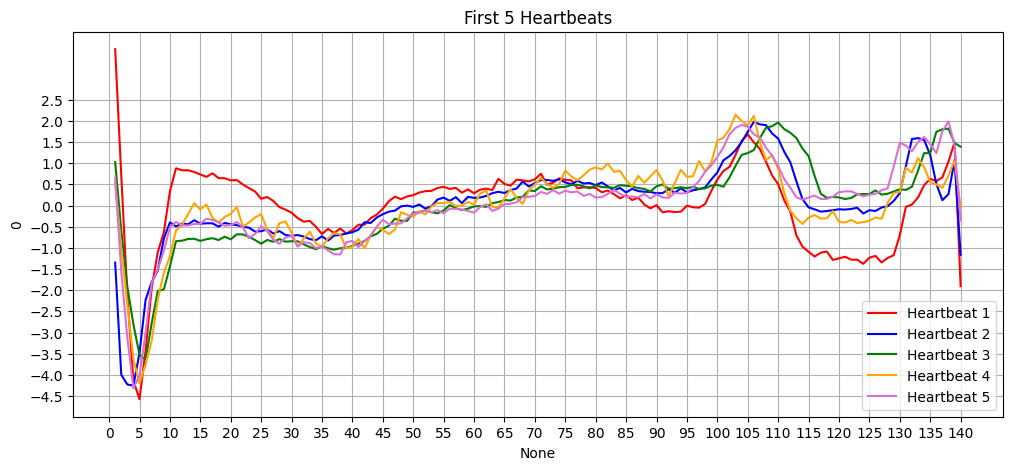

In [ ]:
# Create a line plot using seaborn
plt.figure(figsize=(12, 5))
sns.lineplot(x=vis_df3.index, y=vis_df3[0], label='Heartbeat 1', color='red')
sns.lineplot(x=vis_df3.index, y=vis_df3[1], label='Heartbeat 2', color='blue')
sns.lineplot(x=vis_df3.index, y=vis_df3[2], label='Heartbeat 3', color='green')
sns.lineplot(x=vis_df3.index, y=vis_df3[3], label='Heartbeat 4', color='orange')
sns.lineplot(x=vis_df3.index, y=vis_df3[4], label='Heartbeat 5', color='orchid')

# Customize the plot
plt.title('First 5 Heartbeats')


# Set y-axis ticks every 0.5 units from -5 to 3
plt.yticks(np.arange(-4.5, 3.0, 0.5))
plt.xticks(np.arange(0, 145,5))

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
vis_sample = vis_df3.sample(n=5, random_state=42)  # Set a seed for reproducibility if needed
vis_sample

0         1         2         3         4         5         6     \
109  0.709380  1.702459  1.873225  1.186209  1.180712  1.378803  0.951607   
68   0.593803  0.565366  0.204788  0.038314  0.198546  0.420085  0.252859   
32  -0.381269 -0.734096 -0.917276 -0.780202 -0.865493 -1.084056 -0.288399   
120 -1.248159 -0.088810  0.191033 -0.388988  0.316320 -0.080494 -0.774163   
43  -0.299074 -0.413654 -0.731499 -0.705615 -0.715453 -1.303152  0.345563   

         7         8         9     ...      4990      4991      4992  \
109  1.324200  0.707150  0.946814  ...  0.954808  0.621230  1.055660   
68   0.382790 -0.154489  0.216211  ...  0.369987  0.118370  0.259599   
32  -0.612199 -0.356851 -0.976366  ...  0.226173 -0.370503  0.028582   
120 -0.230581 -0.117941  0.579134  ...  0.721098  0.591290  0.828409   
43  -0.430301 -0.415041 -0.720650  ...  0.018626 -0.502320 -0.067609   

         4993      4994      4995      4996      4997      4998      4999  
109  0.690842  0.709018  0.528940  0.604627  0.463734  0.012006 -0.031602  
68  -0.859543  0.380286 -0.413102  0.307418 -0.411957  0.723932  0.479380  
32  -0.138155  0.317489 -0.226008 -0.133421 -0.147878 -0.123334 -0.222998  
120  0.956731  0.412771  0.890624  0.983010  0.896965 -0.875871  1.156563  
43  -0.364452  0.244326 -0.264033 -0.324514 -0.271912  0.115129  0.096814  

[5 rows x 5000 columns]

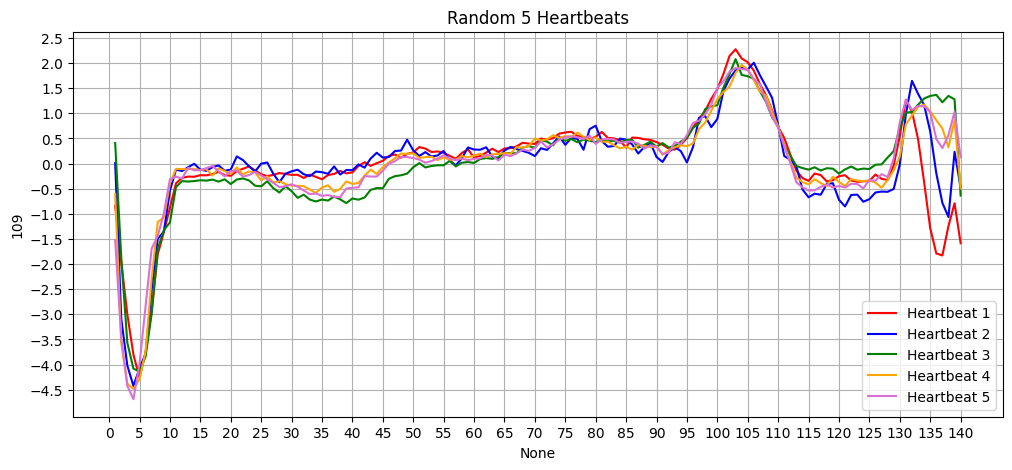

In [ ]:
# Create a line plot using seaborn
plt.figure(figsize=(12, 5))
sns.lineplot(x=vis_df3.index, y=vis_df3[109], label='Heartbeat 1', color='red')
sns.lineplot(x=vis_df3.index, y=vis_df3[68], label='Heartbeat 2', color='blue')
sns.lineplot(x=vis_df3.index, y=vis_df3[32], label='Heartbeat 3', color='green')
sns.lineplot(x=vis_df3.index, y=vis_df3[120], label='Heartbeat 4', color='orange')
sns.lineplot(x=vis_df3.index, y=vis_df3[43], label='Heartbeat 5', color='orchid')

# Customize the plot
plt.title('Random 5 Heartbeats')

# Set y-axis ticks every 0.5 units from -5 to 3
plt.yticks(np.arange(-4.5, 3.0, 0.5))
plt.xticks(np.arange(0, 145,5))

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Locate the first row with different classes
row_1 = vis_df1.loc[vis_df1[0] == 1.0].iloc[0]
row_2 = vis_df1.loc[vis_df1[0] == 2.0].iloc[0]
row_3 = vis_df1.loc[vis_df1[0] == 3.0].iloc[0]
row_4 = vis_df1.loc[vis_df1[0] == 4.0].iloc[0]
row_5 = vis_df1.loc[vis_df1[0] == 5.0].iloc[0]

# Create a new DataFrame with the located rows
result_df = pd.concat([row_1, row_2, row_3, row_4, row_5], axis=1).transpose()
result_df.head()


0         1         2         3         4         5         6    \
0     1.0  3.690844  0.711414 -2.114091 -4.141007 -4.574472 -3.431909   
2627  2.0 -0.543034 -1.072205 -1.196558 -1.856033 -1.970170 -1.954442   
2638  3.0 -1.170113 -1.681393 -1.854496 -2.038944 -2.271918 -2.237541   
2661  4.0 -1.522882 -2.329818 -1.978559 -1.672285 -1.834738 -1.920105   
2731  5.0 -0.076217 -1.756775 -3.129501 -3.968392 -4.078730 -3.982415   

           7         8         9    ...       131       132       133  \
0    -1.950791 -1.107067 -0.632322  ... -0.032477  0.022847  0.188937   
2627 -2.092883 -2.038381 -1.894391  ... -2.047855 -2.504653 -3.154438   
2638 -2.060587 -1.591673 -1.032691  ...  1.254704  0.614170  0.014499   
2661 -1.623848 -1.327558 -1.380543  ...  1.443143  1.408513  1.219838   
2731 -3.413866 -2.135125 -1.391347  ... -0.307395 -0.279370 -0.232449   

           134       135       136       137       138       139       140  
0     0.480932  0.629250  0.577291  0.665527  1.035997  1.492287 -1.905073  
2627 -3.750381 -3.841103 -3.712559 -2.878429 -1.912279 -1.904657 -0.481642  
2638 -0.149143 -0.170839 -0.196967 -0.991989 -2.056344 -2.541085 -2.880575  
2661  1.050193  1.097659  1.243116  1.221448  1.146914  1.468611  2.285676  
2731  0.151849  0.867551  1.011659  0.718420  0.314203 -0.501266 -1.098788  

[5 rows x 141 columns]

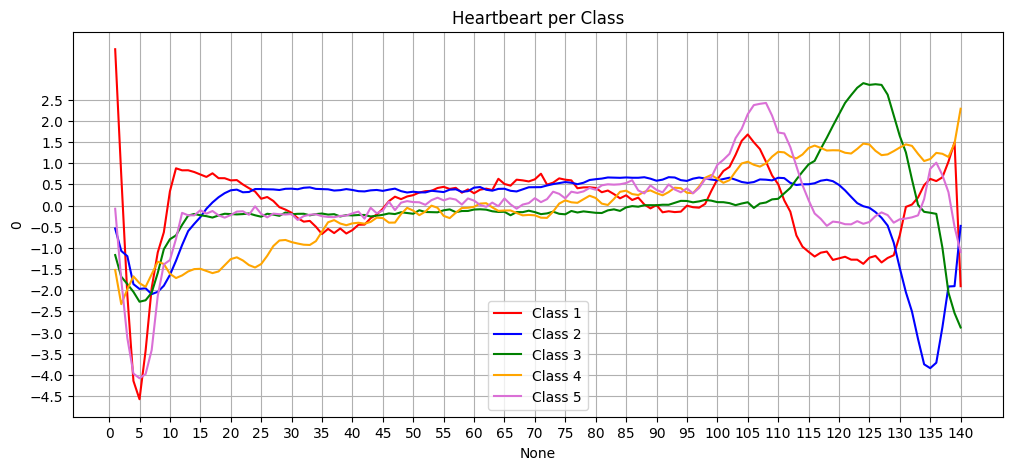

In [ ]:
# Create a line plot using seaborn
plt.figure(figsize=(12, 5))
sns.lineplot(x=vis_df3.index, y=vis_df3[0], label='Class 1', color='red')
sns.lineplot(x=vis_df3.index, y=vis_df3[2627], label='Class 2', color='blue')
sns.lineplot(x=vis_df3.index, y=vis_df3[2638], label='Class 3', color='green')
sns.lineplot(x=vis_df3.index, y=vis_df3[2661], label='Class 4', color='orange')
sns.lineplot(x=vis_df3.index, y=vis_df3[2731], label='Class 5', color='orchid')

# Customize the plot
plt.title('Heartbeart per Class')

# Set y-axis ticks every 0.5 units from -5 to 3
plt.yticks(np.arange(-4.5, 3.0, 0.5))
plt.xticks(np.arange(0, 145,5))

plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Distribution of heartbeat samples per class')

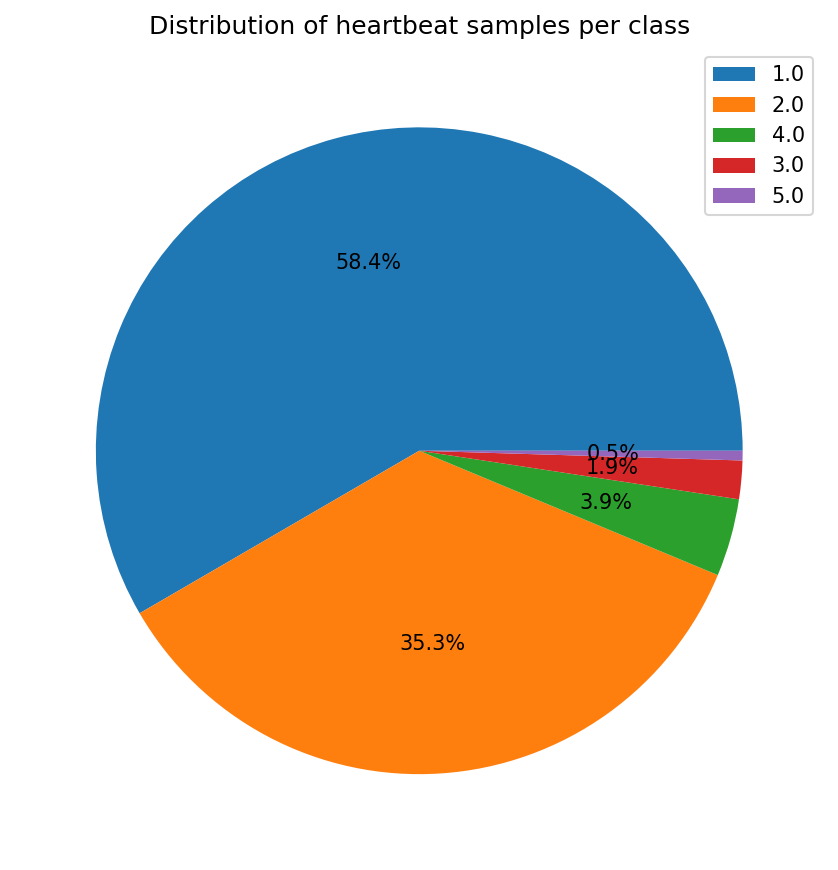

In [ ]:
plt.figure(figsize=(7,7), dpi=150)

plt.pie(x=vis_df1[0].value_counts(), autopct='%1.1f%%')
plt.legend(vis_df1[0].value_counts().index)
plt.title(label='Distribution of heartbeat samples per class')

In [ ]:
target_variable = vis_df1[0]
target_variable.unique()

array([1., 2., 3., 4., 5.])

In [ ]:
target_variable.value_counts()

0
1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: count, dtype: int64

# **Existing Deep Neural Networks**

## **Existing DNN 1 - Minesh A Jethva**

In [ ]:
##Author: MINESH A. JETHVA ##

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [ ]:
# Download the dataset
dataframe = vis_df1
raw_data = dataframe.values
dataframe.head()

0         1         2         3         4         5         6         7    \
0  1.0  3.690844  0.711414 -2.114091 -4.141007 -4.574472 -3.431909 -1.950791   
1  1.0 -1.348132 -3.996038 -4.226750 -4.251187 -3.477953 -2.228422 -1.808488   
2  1.0  1.024295 -0.590314 -1.916949 -2.806989 -3.527905 -3.638675 -2.779767   
3  1.0  0.545657 -1.014383 -2.316698 -3.634040 -4.196857 -3.758093 -3.194444   
4  1.0  0.661133 -1.552471 -3.124641 -4.313351 -4.017042 -3.005993 -1.832411   

        8         9    ...       131       132       133       134       135  \
0 -1.107067 -0.632322  ... -0.032477  0.022847  0.188937  0.480932  0.629250   
1 -1.534242 -0.779861  ...  0.937984  1.570938  1.591394  1.549193  1.193077   
2 -2.019031 -1.980754  ...  0.368820  0.443502  0.827582  1.237007  1.235121   
3 -2.221764 -1.588554  ...  0.894638  0.777530  1.119240  0.902984  0.554098   
4 -1.503886 -1.071705  ...  1.416582  1.280823  1.494315  1.618764  1.447449   

        136       137       138       139       140  
0  0.577291  0.665527  1.035997  1.492287 -1.905073  
1  0.515134  0.126274  0.267532  1.071148 -1.164009  
2  1.738103  1.800767  1.816301  1.473963  1.389767  
3  0.497053  0.418116  0.703108  1.064602 -0.044853  
4  1.238577  1.749692  1.986803  1.422756 -0.357784  

[5 rows x 141 columns]

In [ ]:
# The first element contains the labels
labels = raw_data[:, 0]

# The other data points are the electrocardiogram data
data = raw_data[:, 1:]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)


In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

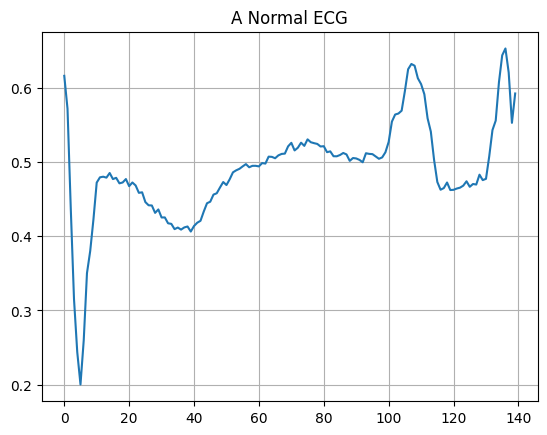

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

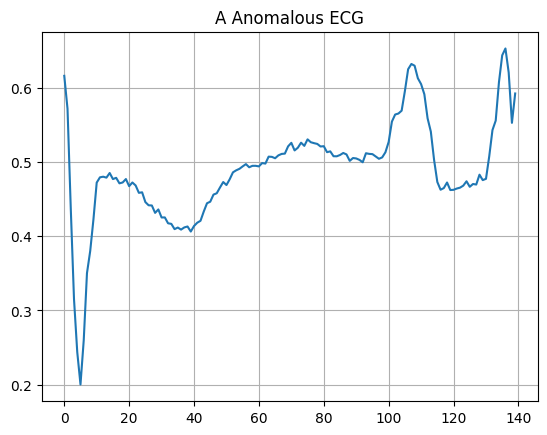

In [ ]:
# Plotting the first data point in the training set
plt.grid()
plt.plot(np.arange(140), train_data[0])
plt.title("A Anomalous ECG")
plt.show()

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
8/8 [==============================] - 4s 136ms/step - loss: 0.0449 - val_loss: 0.0435
Epoch 2/20
8/8 [==============================] - 0s 17ms/step - loss: 0.0427 - val_loss: 0.0420
Epoch 3/20
8/8 [==============================] - 0s 23ms/step - loss: 0.0409 - val_loss: 0.0401
Epoch 4/20
8/8 [==============================] - 0s 26ms/step - loss: 0.0390 - val_loss: 0.0382
Epoch 5/20
8/8 [==============================] - 0s 29ms/step - loss: 0.0370 - val_loss: 0.0364
Epoch 6/20
8/8 [==============================] - 0s 35ms/step - loss: 0.0352 - val_loss: 0.0348
Epoch 7/20
8/8 [==============================] - 0s 37ms/step - loss: 0.0335 - val_loss: 0.0334
Epoch 8/20
8/8 [==============================] - 0s 26ms/step - loss: 0.0322 - val_loss: 0.0323
Epoch 9/20
8/8 [==============================] - 0s 29ms/step - loss: 0.0311 - val_loss: 0.0313
Epoch 10/20
8/8 [==============================] - 0s 32ms/step - loss: 0.0302 - val_loss: 0.0306
Epoch 11/20
8/8 [===========

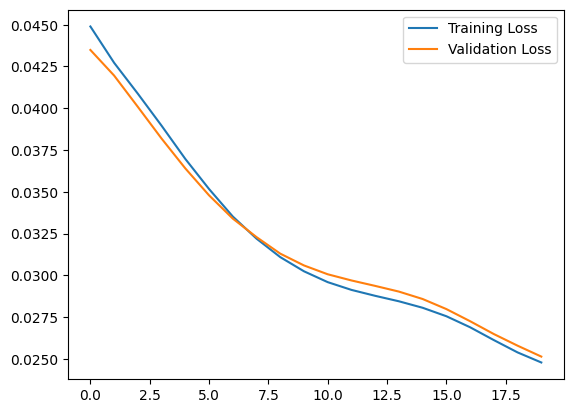

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

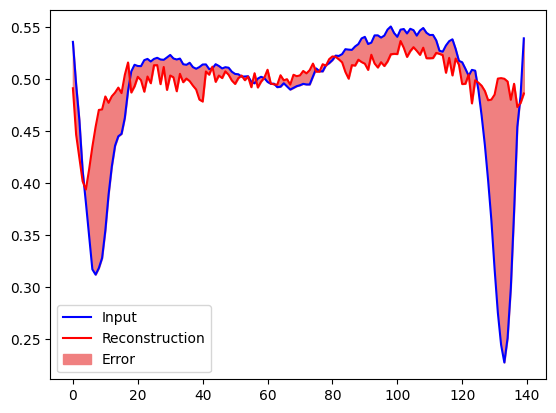

In [ ]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

125/125 [==============================] - 1s 3ms/step


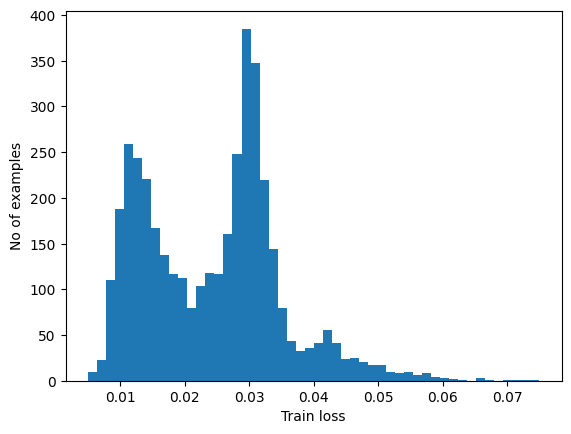

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.035054006


32/32 [==============================] - 0s 3ms/step


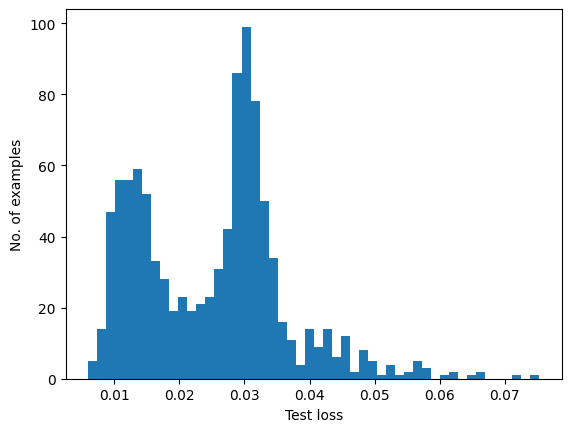

In [ ]:
# Reconstructing the test data using the autoencoder
reconstructions = autoencoder.predict(test_data)

# Calculating the mean absolute error for each reconstructed sample
test_loss = tf.keras.losses.mae(reconstructions, test_data)

# Plotting the distribution of the test loss
plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No. of examples")
plt.show()

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.873
Precision = 1.0
Recall = 0.873


## **Existing DNN 2 - Amardeep Chauhan**

In [ ]:
##Author: AMARDEEP CHAUHAN##

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [ ]:
# Extracting labels from the first column
labels = vis_df1.iloc[:, 0]

# Extracting features from the rest of the columns
data = vis_df1.iloc[:, 1:]

# Convert DataFrame to NumPy array
data_np = data.values
labels_np = labels.values

# Splitting the dataset into train and test sets
train_data_dnn2, test_data_dnn2, train_labels_dnn2, test_labels_dnn2 = train_test_split(
    data_np, labels_np, test_size=0.2, random_state=21
)


In [ ]:
# Normalizing the data
min_val_dnn2 = tf.reduce_min(train_data_dnn2)
max_val_dnn2 = tf.reduce_max(train_data_dnn2)

train_data_dnn2 = (train_data_dnn2 - min_val_dnn2) / (max_val_dnn2 - min_val_dnn2)
test_data_dnn2 = (test_data_dnn2 - min_val_dnn2) / (max_val_dnn2 - min_val_dnn2)

In [ ]:
train_labels_dnn2 = train_labels_dnn2.astype(bool)
test_labels_dnn2 = test_labels_dnn2.astype(bool)

normal_train_data_dnn2 = train_data_dnn2[train_labels_dnn2]
normal_test_data_dnn2 = test_data_dnn2[test_labels_dnn2]

anomalous_train_data_dnn2 = train_data_dnn2[~train_labels_dnn2]
anomalous_test_data_dnn2 = test_data_dnn2[~test_labels_dnn2]

train_data_dnn2, normal_test_data_dnn2, anomalous_train_data_dnn2

(<tf.Tensor: shape=(4000, 140), dtype=float64, numpy=
 array([[0.61615175, 0.57183292, 0.43802409, ..., 0.62063624, 0.55279283,
         0.59238098],
        [0.40161565, 0.32781131, 0.3084913 , ..., 0.25025673, 0.29360705,
         0.38986951],
        [0.45823408, 0.29590522, 0.22384167, ..., 0.54146677, 0.5537968 ,
         0.41803991],
        ...,
        [0.47621321, 0.34405215, 0.28907001, ..., 0.59057481, 0.62390326,
         0.56122358],
        [0.35849541, 0.26112085, 0.24078589, ..., 0.44372622, 0.41267971,
         0.33302391],
        [0.38099041, 0.21413462, 0.19331597, ..., 0.51048959, 0.54439452,
         0.4510412 ]])>,
 <tf.Tensor: shape=(1000, 140), dtype=float64, numpy=
 array([[0.53611954, 0.49490244, 0.46065906, ..., 0.45420668, 0.48434934,
         0.53951519],
        [0.30177189, 0.20329525, 0.23747713, ..., 0.56486343, 0.49300627,
         0.38555654],
        [0.56255689, 0.54793017, 0.52015425, ..., 0.26064518, 0.28874771,
         0.40214714],
        ...,

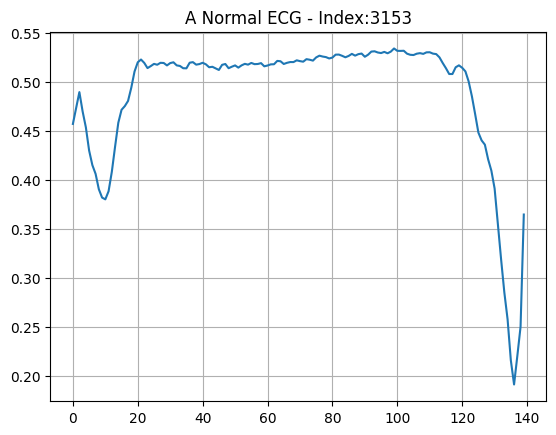

In [ ]:
# Plot a normal ECG.


plt.grid()
selected_index = np.random.randint(normal_train_data_dnn2.shape[0])
plt.plot(np.arange(140), normal_train_data_dnn2[selected_index])
plt.title(f"A Normal ECG - Index:{selected_index}")
plt.show()

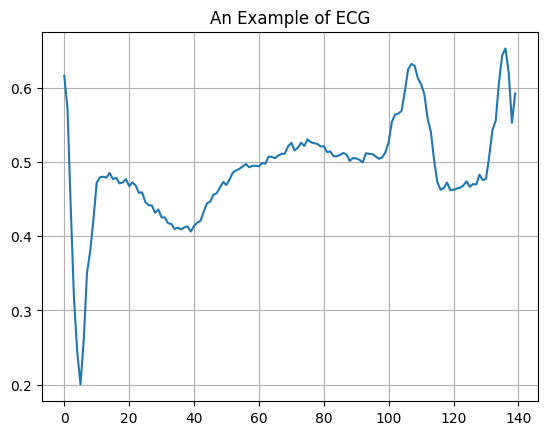

In [ ]:
# Plot an anomalous ECG.

plt.grid()
plt.plot(np.arange(140), train_data_dnn2[0])
plt.title("An Example of ECG")
plt.show()

In [ ]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
          layers.Dense(32, activation="relu"),
          layers.Dense(16, activation="relu"),
          layers.Dense(8, activation="relu")])

        self.decoder = tf.keras.Sequential([
          layers.Dense(16, activation="relu"),
          layers.Dense(32, activation="relu"),
          layers.Dense(140, activation="sigmoid")])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder_dnn2 = AnomalyDetector()

In [ ]:
autoencoder_dnn2.compile(optimizer='adam', loss='mae')

In [ ]:
history = autoencoder_dnn2.fit(normal_train_data_dnn2,
                          normal_train_data_dnn2,
                          epochs=20,
                          batch_size=512,
                          validation_data=(test_data_dnn2, test_data_dnn2),
                          shuffle=True)

Epoch 1/20
8/8 [==============================] - 1s 34ms/step - loss: 0.0442 - val_loss: 0.0432
Epoch 2/20
8/8 [==============================] - 0s 17ms/step - loss: 0.0422 - val_loss: 0.0413
Epoch 3/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0401 - val_loss: 0.0392
Epoch 4/20
8/8 [==============================] - 0s 17ms/step - loss: 0.0379 - val_loss: 0.0372
Epoch 5/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0357 - val_loss: 0.0353
Epoch 6/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0340 - val_loss: 0.0339
Epoch 7/20
8/8 [==============================] - 0s 13ms/step - loss: 0.0326 - val_loss: 0.0325
Epoch 8/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0312 - val_loss: 0.0313
Epoch 9/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0301 - val_loss: 0.0303
Epoch 10/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0291 - val_loss: 0.0293
Epoch 11/20
8/8 [============

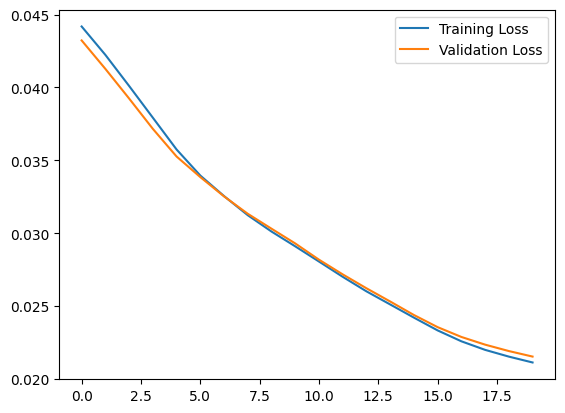

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

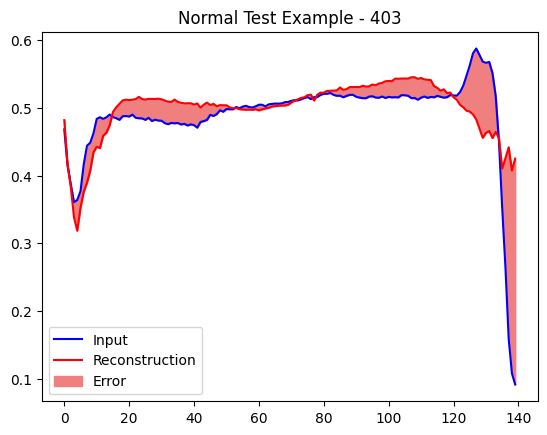

In [ ]:
encoded_data_dnn2 = autoencoder_dnn2.encoder(normal_test_data_dnn2).numpy()
decoded_data_dnn2 = autoencoder_dnn2.decoder(encoded_data_dnn2).numpy()

selected_index = np.random.randint(normal_test_data_dnn2.shape[0])

plt.plot(normal_test_data_dnn2[selected_index], 'b')
plt.plot(decoded_data_dnn2[selected_index], 'r')
plt.title(f'Normal Test Example - {selected_index}')
plt.fill_between(np.arange(140), decoded_data_dnn2[selected_index], normal_test_data_dnn2[selected_index], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

125/125 [==============================] - 0s 2ms/step


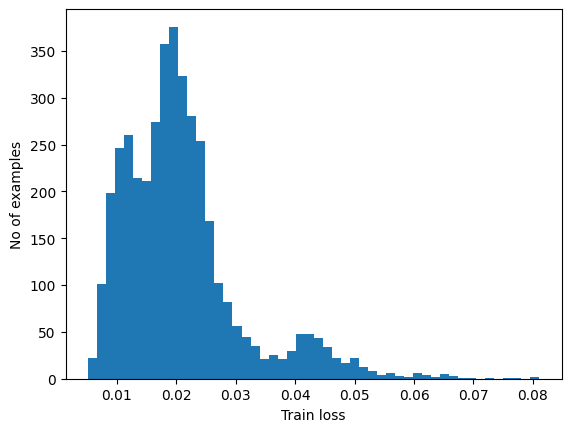

In [ ]:
reconstructions = autoencoder_dnn2.predict(normal_train_data_dnn2)
train_loss_dnn2 = tf.keras.losses.mae(reconstructions, normal_train_data_dnn2)

plt.hist(train_loss_dnn2, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold = np.mean(train_loss_dnn2) + np.std(train_loss_dnn2)
print("Threshold: ", threshold)

Threshold:  0.031038231977465913


32/32 [==============================] - 0s 2ms/step


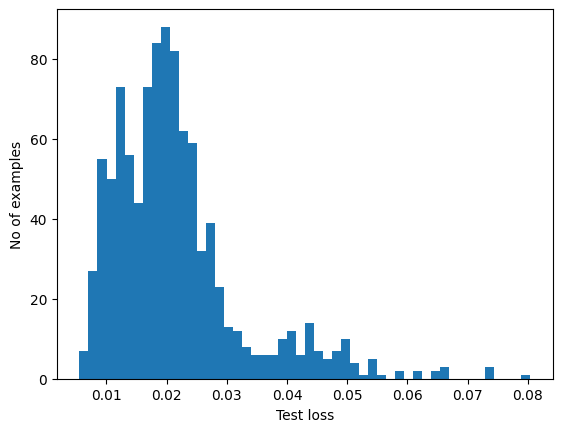

In [ ]:
reconstructions = autoencoder_dnn2.predict(test_data_dnn2)
test_loss_dnn2 = tf.keras.losses.mae(reconstructions, test_data_dnn2)

plt.hist(test_loss_dnn2[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()


In [ ]:
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))
    print("Precision = {}".format(precision_score(labels, predictions)))
    print("Recall = {}".format(recall_score(labels, predictions)))

preds = predict(autoencoder_dnn2, test_data_dnn2, threshold)
print_stats(preds, test_labels_dnn2)

Accuracy = 0.868
Precision = 1.0
Recall = 0.868


# **Anomaly Detection**


## **Method 1: Standard Autoencoder**

### **Splitting and Visualing the Anomaly**

In [ ]:
# Extract the labels and features from dataset and split the data
labels = vis_df1.iloc[:, 0]
data_1 = vis_df1.iloc[:, 1:]

train_data_ad, test_data_ad = train_test_split(vis_df1, test_size=0.1, random_state=21)
train_data_class, val_data_ad = train_test_split(train_data_ad, test_size=0.1, random_state=21)

# Form numpy arrays of labels
train_labels_ad = np.array(train_data_ad.iloc[:, 0])
val_labels_ad = np.array(val_data_ad.iloc[:, 0])
test_labels_ad = np.array(test_data_ad.iloc[:, 0])

train_features_ad= np.array(train_data_ad)
val_features_ad = np.array(val_data_ad)

# Ensure validation set has at least one record from each class
missing_classes_ad = set(np.unique(train_labels_ad)) - set(np.unique(val_labels_ad))
while missing_classes_ad:
    idx = np.random.choice(np.where(np.isin(train_labels_ad, list(missing_classes)))[0])
    val_features_ad = np.vstack((val_features_ad, train_features_ad[idx]))
    val_labels_ad = np.hstack((val_labels_ad, train_labels_ad[idx]))
    missing_classes_ad = set(np.unique(train_labels_ad)) - set(np.unique(val_labels_ad))

# Shuffle the validation data
np.random.shuffle(val_features_ad)

#Normalize the data to [0,1].
min_val = train_data_ad.min().min()  # Find the minimum value in the entire DataFrame
max_val = train_data_ad.max().max()  # Find the maximum value in the entire DataFrame

train_data_ad = (train_data_ad - min_val) / (max_val - min_val)
test_data_ad = (test_data_ad - min_val) / (max_val - min_val)

train_data_ad = tf.cast(train_data_ad, tf.float32)
test_data_ad = tf.cast(test_data_ad, tf.float32)

In [ ]:
# Define a TensorFlow variable for the class labels
train_class_labels_ad = tf.constant(train_labels_ad)
test_class_labels_ad =  tf.constant(test_labels_ad)

# Filter the train_data_ad tensor based on the class labels and print the shape
normal_train_data_ad = tf.boolean_mask(train_data_ad, train_class_labels_ad == 1)
anomalous_train_data_ad = tf.boolean_mask(train_data_ad, train_class_labels_ad != 1)

normal_test_data_ad = tf.boolean_mask(test_data_ad, test_class_labels_ad == 1)
anomalous_test_data_ad = tf.boolean_mask(test_data_ad, test_class_labels_ad != 1)

print("Shape of normal_train_data_ad:", normal_train_data_ad.shape)
print("Shape of anomalous_train_data_ad:", anomalous_train_data_ad.shape)
print("Shape of normal_test_data_ad:", normal_test_data_ad.shape)
print("Shape of anomalous_test_data_ad:", anomalous_test_data_ad.shape)

Shape of normal_train_data_ad: (2656, 141)
Shape of anomalous_train_data_ad: (1844, 141)
Shape of normal_test_data_ad: (263, 141)
Shape of anomalous_test_data_ad: (237, 141)


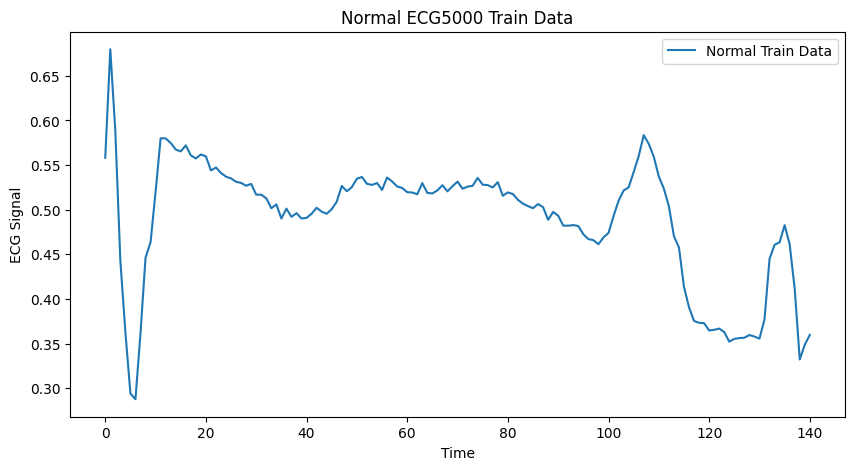

In [ ]:
# Plot a normal ECG data
plt.figure(figsize=(10, 5))
plt.plot(normal_train_data_ad[0], label='Normal Train Data')
plt.title('Normal ECG5000 Train Data')
plt.xlabel('Time')
plt.ylabel('ECG Signal')
plt.legend()
plt.show()


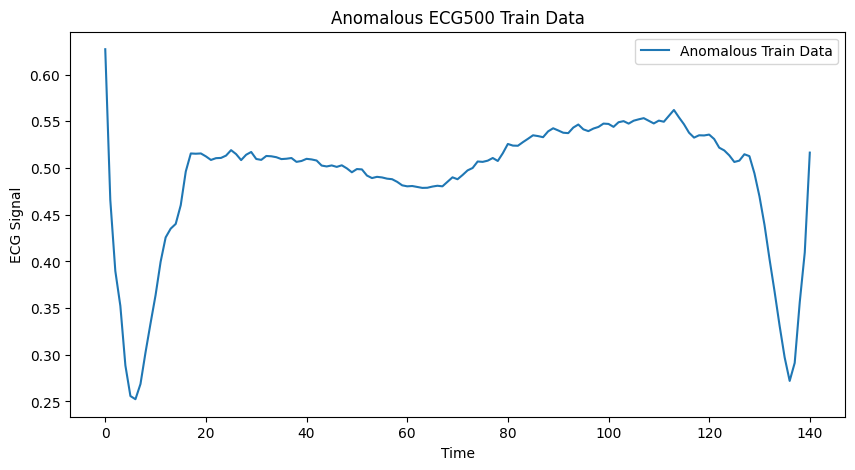

In [ ]:
# Check if anomalous_train_data contains any data and plot
if anomalous_train_data_ad.shape[0] > 0:
    # Plot anomalous ECG data
    plt.figure(figsize=(10, 5))
    plt.plot(anomalous_train_data_ad[0], label='Anomalous Train Data')
    plt.title('Anomalous ECG500 Train Data')
    plt.xlabel('Time')
    plt.ylabel('ECG Signal')
    plt.legend()
    plt.show()
else:
    print("No anomalous data found.")

### **Build the Model**

In [ ]:
#Define the constructor method __init__() for the AnomalyDetector class
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(32, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(8, activation="relu")])

        #Defines the decoder part of the autoencoder
        self.decoder = tf.keras.Sequential([
            layers.Dense(8, activation="relu"),
            layers.Dense(16, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dense(140, activation="sigmoid")])

    #Defines the forward pass of the autoencoder model
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()


### **Train the Model**

In [ ]:
# Reshape normal_train_data_ad to match the expected input shape of the autoencoder
num_samples = normal_train_data_ad.shape[0]
input_dim = normal_train_data_ad.shape[1]
normal_train_data_ad_reshaped = tf.reshape(normal_train_data_ad, (num_samples, input_dim))

# Define the encoder model
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoded = tf.keras.layers.Dense(64, activation='relu')(input_layer)
encoder = tf.keras.Model(input_layer, encoded)

# Define the decoder model
decoded_input = tf.keras.layers.Input(shape=(64,))
decoded = tf.keras.layers.Dense(input_dim, activation='sigmoid')(decoded_input)
decoder = tf.keras.Model(decoded_input, decoded)

# Combine encoder and decoder to create autoencoder
input_img = tf.keras.layers.Input(shape=(input_dim,))
encoded_img = encoder(input_img)
decoded_img = decoder(encoded_img)

autoencoder = tf.keras.Model(input_img, decoded_img)
autoencoder.compile(optimizer='adam', loss='mae')

# Train the autoencoder model
history = autoencoder.fit(normal_train_data_ad_reshaped, normal_train_data_ad_reshaped,
                          epochs=20,
                          batch_size=512,
                          validation_data=(test_data_ad , test_data_ad ),
                          shuffle=True)



################################################################
#########  Implemented from TensorFlow (2024)###################
################################################################

Epoch 1/20
6/6 [==============================] - 1s 27ms/step - loss: 0.0615 - val_loss: 0.0488
Epoch 2/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0435 - val_loss: 0.0419
Epoch 3/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0377 - val_loss: 0.0401
Epoch 4/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0341 - val_loss: 0.0386
Epoch 5/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0303 - val_loss: 0.0378
Epoch 6/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0275 - val_loss: 0.0372
Epoch 7/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.0364
Epoch 8/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0242 - val_loss: 0.0357
Epoch 9/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0233 - val_loss: 0.0353
Epoch 10/20
6/6 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.0349
Epoch 11/20
6/6 [=====================

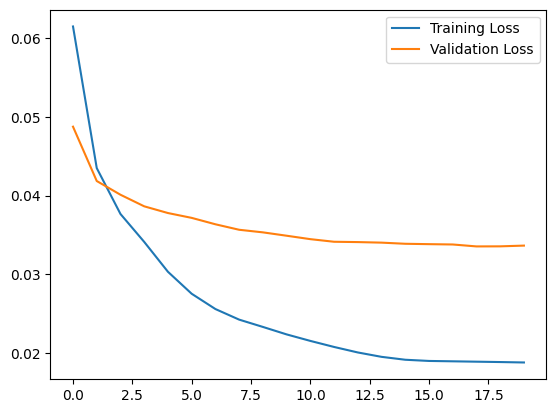

In [ ]:
#Plot training and validation loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

### **Visualise the reconstruction errors**

9/9 [==============================] - 0s 1ms/step


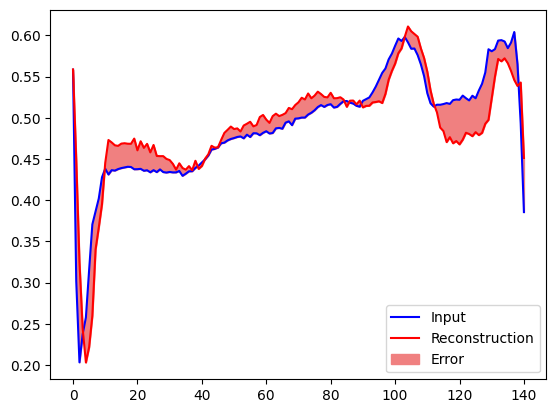

In [ ]:
#Get predicted values and plot against test data
encoded_imgs = encoder.predict(normal_test_data_ad)
decoded_imgs = decoder.predict(encoded_imgs)

plt.plot(normal_test_data_ad[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(decoded_imgs.shape[1]), decoded_imgs[0], normal_test_data_ad[0][:decoded_imgs.shape[1]], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


58/58 [==============================] - 0s 1ms/step


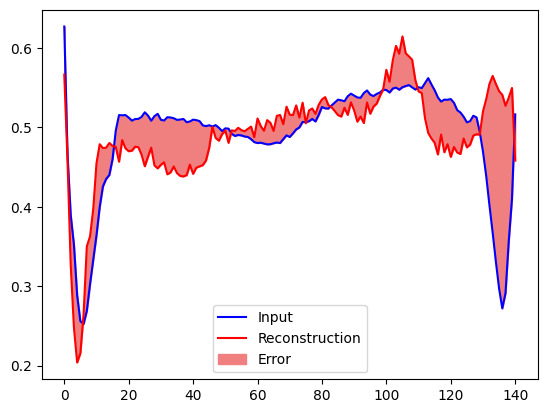

In [ ]:
#Get predicted values and plot against test data
encoded_imgs1 = encoder.predict(anomalous_train_data_ad)
decoded_imgs1 = decoder.predict(encoded_imgs1)

plt.plot(anomalous_train_data_ad[0],'b')
plt.plot(decoded_imgs1[0],'r')
plt.fill_between(np.arange(decoded_imgs1.shape[1]), decoded_imgs1[0], anomalous_train_data_ad[0][:decoded_imgs1.shape[1]], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

83/83 [==============================] - 0s 1ms/step


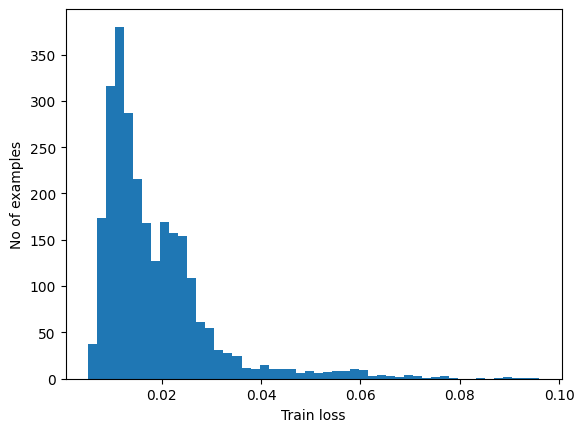

In [ ]:
#Plot the reconstruction error on normal data from  training data
reconstructions = autoencoder.predict(normal_train_data_ad)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data_ad)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
#Set the threshold value that is one standard deviation above the mean.
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.030168405


8/8 [==============================] - 0s 2ms/step


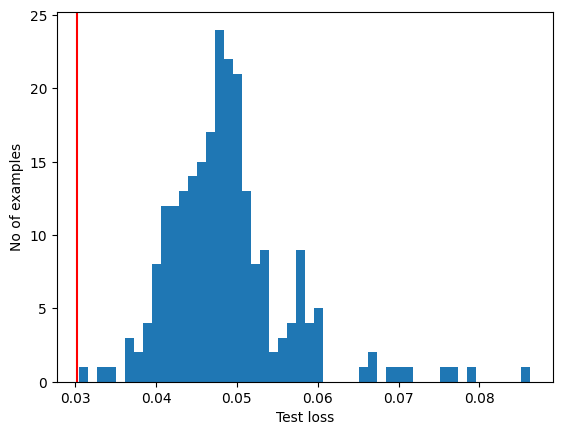

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data_ad)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_ad)

plt.hist(test_loss, bins=50)
plt.axvline(threshold,c='r')
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

### **Evaluation Metrics**

In [ ]:
#Create 4 functions to predict, convert predictions to labels and manually calculate and print evaluation metrics
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def convert_to_labels(predictions):
    if len(predictions.shape) == 1:
        return tf.cast(predictions, tf.int32)  # Convert to integer
    elif len(predictions.shape) == 2:
        return tf.argmax(predictions, axis=-1)
    else:
        raise ValueError("Invalid predictions tensor shape.")

def calculate_metrics(labels, predicted_labels):
    labels = tf.cast(labels, tf.int32)

    # Calculate True Positives, True Negatives, False Positives, False Negatives
    TP = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 1), tf.equal(labels, 1)), tf.float32))
    TN = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 0), tf.equal(labels, 0)), tf.float32))
    FP = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 1), tf.equal(labels, 0)), tf.float32))
    FN = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 0), tf.equal(labels, 1)), tf.float32))

    # Calculate metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP + 1e-7)
    recall = TP / (TP + FN + 1e-7)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)

    return accuracy, precision, recall, f1_score


def print_stats(predictions, labels):
    predicted_labels = convert_to_labels(predictions)
    labels = tf.cast(labels, tf.float32)

    accuracy, precision, recall, f1_score = calculate_metrics(labels, predicted_labels)

    print("Accuracy = {}".format(accuracy))
    print("Precision = {}".format(precision))
    print("Recall = {}".format(recall))
    print("F1 Score = {}".format(f1_score))

preds = predict(autoencoder, test_data_ad, threshold)
print_stats(preds, test_labels_ad)


Accuracy = 0.8783270120620728
Precision = 1.0
Recall = 0.8783270120620728
F1 Score = 0.9352226257324219


In [ ]:
#Create 2 functions to calculate and print confusion matrix by one hot encoding the labels
def calculate_confusion_matrix(labels, predicted_labels):
    predicted_labels_one_hot = tf.one_hot(tf.cast(predicted_labels, tf.int32), depth=2, dtype=tf.int32)
    labels_one_hot = tf.one_hot(tf.cast(labels, tf.int32), depth=2, dtype=tf.int32)

    # Calculate True Positives, True Negatives, False Positives, False Negatives
    TP = tf.reduce_sum(predicted_labels_one_hot[:, 1] * labels_one_hot[:, 1])
    TN = tf.reduce_sum((1 - predicted_labels_one_hot[:, 1]) * (1 - labels_one_hot[:, 1]))
    FP = tf.reduce_sum(predicted_labels_one_hot[:, 1] * (1 - labels_one_hot[:, 1]))
    FN = tf.reduce_sum((1 - predicted_labels_one_hot[:, 1]) * labels_one_hot[:, 1])

    return TP, TN, FP, FN

def print_confusion_matrix(TP, TN, FP, FN):
    print("True Positives (TP) =", TP.numpy())
    print("True Negatives (TN) =", TN.numpy())
    print("False Positives (FP) =", FP.numpy())
    print("False Negatives (FN) =", FN.numpy())

# Calculate confusion matrix
TP, TN, FP, FN = calculate_confusion_matrix(test_labels_ad, preds)

# Print confusion matrix values
print_confusion_matrix(TP, TN, FP, FN)



True Positives (TP) = 231
True Negatives (TN) = 237
False Positives (FP) = 0
False Negatives (FN) = 32


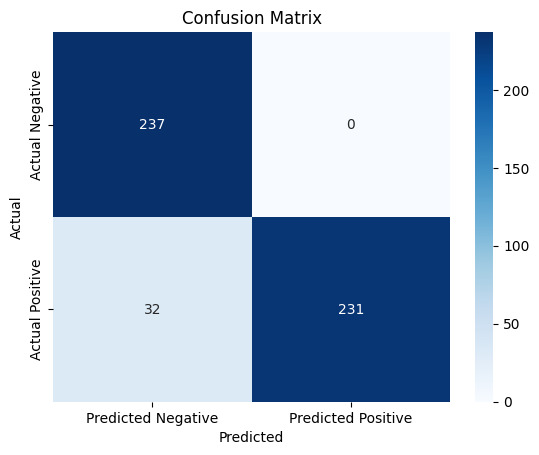

In [ ]:
#Define function to plot the confusion matrix as a seaborn heatmap
def plot_confusion_matrix(TP, TN, FP, FN):
    confusion_matrix = [[TN, FP],
                        [FN, TP]]

    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(TP.numpy(), TN.numpy(), FP.numpy(), FN.numpy())


### **Visualise the reconstruction errors**

9/9 [==============================] - 0s 1ms/step


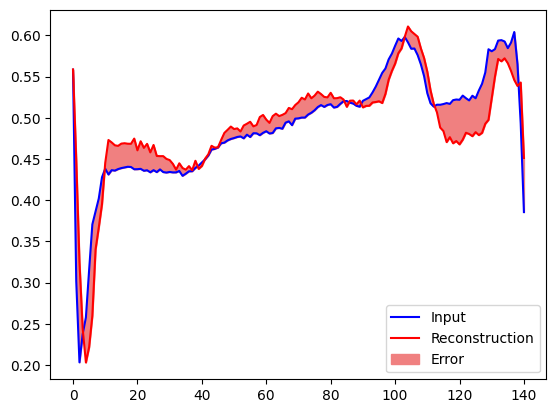

In [ ]:
#Get predicted values and plot against test data
encoded_imgs = encoder.predict(normal_test_data_ad)
decoded_imgs = decoder.predict(encoded_imgs)

plt.plot(normal_test_data_ad[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(decoded_imgs.shape[1]), decoded_imgs[0], normal_test_data_ad[0][:decoded_imgs.shape[1]], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()


58/58 [==============================] - 0s 1ms/step


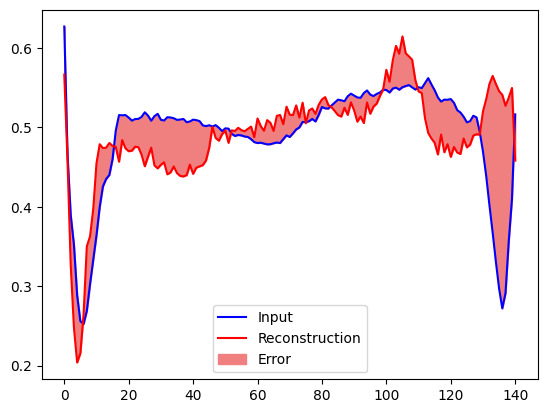

In [ ]:
#Get predicted values and plot against test data
encoded_imgs1 = encoder.predict(anomalous_train_data_ad)
decoded_imgs1 = decoder.predict(encoded_imgs1)

plt.plot(anomalous_train_data_ad[0],'b')
plt.plot(decoded_imgs1[0],'r')
plt.fill_between(np.arange(decoded_imgs1.shape[1]), decoded_imgs1[0], anomalous_train_data_ad[0][:decoded_imgs1.shape[1]], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

83/83 [==============================] - 0s 1ms/step


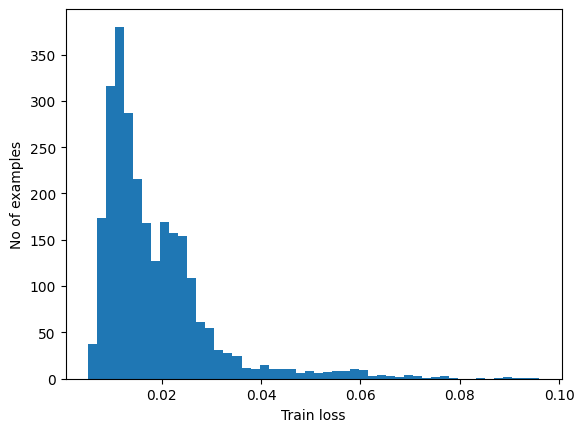

In [ ]:
#Plot the reconstruction error on normal data from  training data
reconstructions = autoencoder.predict(normal_train_data_ad)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data_ad)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
#Set the threshold value that is one standard deviations above the mean.
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.030168405


8/8 [==============================] - 0s 2ms/step


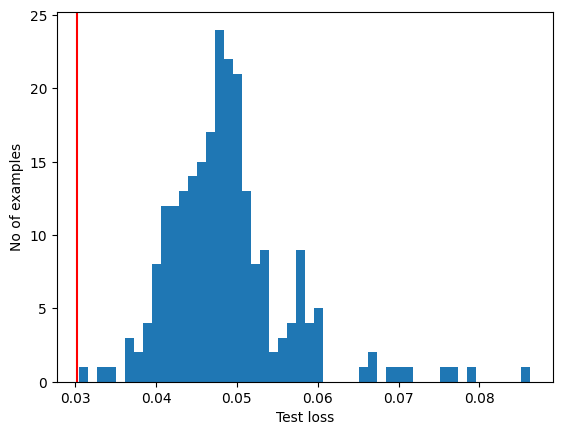

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data_ad)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_ad)

plt.hist(test_loss, bins=50)
plt.axvline(threshold,c='r')
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

### **Evaluation Metrics**

In [ ]:
#Create 4 functions to predict, convert predictions to labels and manually calculate and print evaluation metrics
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def convert_to_labels(predictions):
    if len(predictions.shape) == 1:
        return tf.cast(predictions, tf.int32)  # Convert to integer
    elif len(predictions.shape) == 2:
        return tf.argmax(predictions, axis=-1)
    else:
        raise ValueError("Invalid predictions tensor shape.")

def calculate_metrics(labels, predicted_labels):
    labels = tf.cast(labels, tf.int32)

    # Calculate True Positives, True Negatives, False Positives, False Negatives
    TP = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 1), tf.equal(labels, 1)), tf.float32))
    TN = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 0), tf.equal(labels, 0)), tf.float32))
    FP = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 1), tf.equal(labels, 0)), tf.float32))
    FN = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 0), tf.equal(labels, 1)), tf.float32))

    # Calculate metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP + 1e-7)
    recall = TP / (TP + FN + 1e-7)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)

    return accuracy, precision, recall, f1_score


def print_stats(predictions, labels):
    predicted_labels = convert_to_labels(predictions)
    labels = tf.cast(labels, tf.float32)

    accuracy, precision, recall, f1_score = calculate_metrics(labels, predicted_labels)

    print("Accuracy = {}".format(accuracy))
    print("Precision = {}".format(precision))
    print("Recall = {}".format(recall))
    print("F1 Score = {}".format(f1_score))

preds = predict(autoencoder, test_data_ad, threshold)
print_stats(preds, test_labels_ad)


Accuracy = 0.8783270120620728
Precision = 1.0
Recall = 0.8783270120620728
F1 Score = 0.9352226257324219


In [ ]:
#Create 2 functions to calculate and print confusion matrix by one hot encoding the labels
def calculate_confusion_matrix(labels, predicted_labels):
    predicted_labels_one_hot = tf.one_hot(tf.cast(predicted_labels, tf.int32), depth=2, dtype=tf.int32)
    labels_one_hot = tf.one_hot(tf.cast(labels, tf.int32), depth=2, dtype=tf.int32)

    # Calculate True Positives, True Negatives, False Positives, False Negatives
    TP = tf.reduce_sum(predicted_labels_one_hot[:, 1] * labels_one_hot[:, 1])
    TN = tf.reduce_sum((1 - predicted_labels_one_hot[:, 1]) * (1 - labels_one_hot[:, 1]))
    FP = tf.reduce_sum(predicted_labels_one_hot[:, 1] * (1 - labels_one_hot[:, 1]))
    FN = tf.reduce_sum((1 - predicted_labels_one_hot[:, 1]) * labels_one_hot[:, 1])

    return TP, TN, FP, FN

def print_confusion_matrix(TP, TN, FP, FN):
    print("True Positives (TP) =", TP.numpy())
    print("True Negatives (TN) =", TN.numpy())
    print("False Positives (FP) =", FP.numpy())
    print("False Negatives (FN) =", FN.numpy())

# Calculate confusion matrix
TP, TN, FP, FN = calculate_confusion_matrix(test_labels_ad, preds)

# Print confusion matrix values
print_confusion_matrix(TP, TN, FP, FN)



True Positives (TP) = 231
True Negatives (TN) = 237
False Positives (FP) = 0
False Negatives (FN) = 32


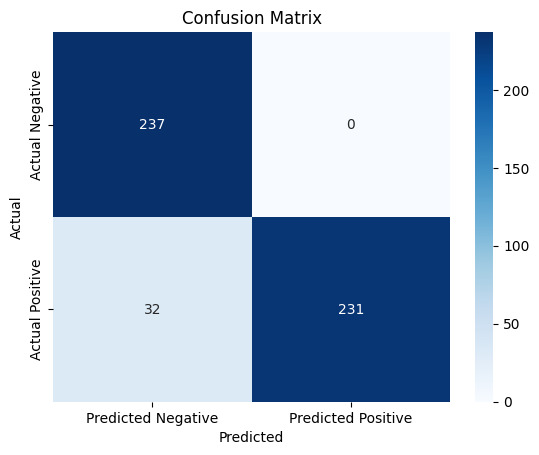

In [ ]:
#Define function to plot the confusion matrix as a seaborn heatmap
def plot_confusion_matrix(TP, TN, FP, FN):
    confusion_matrix = [[TN, FP],
                        [FN, TP]]

    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(TP.numpy(), TN.numpy(), FP.numpy(), FN.numpy())


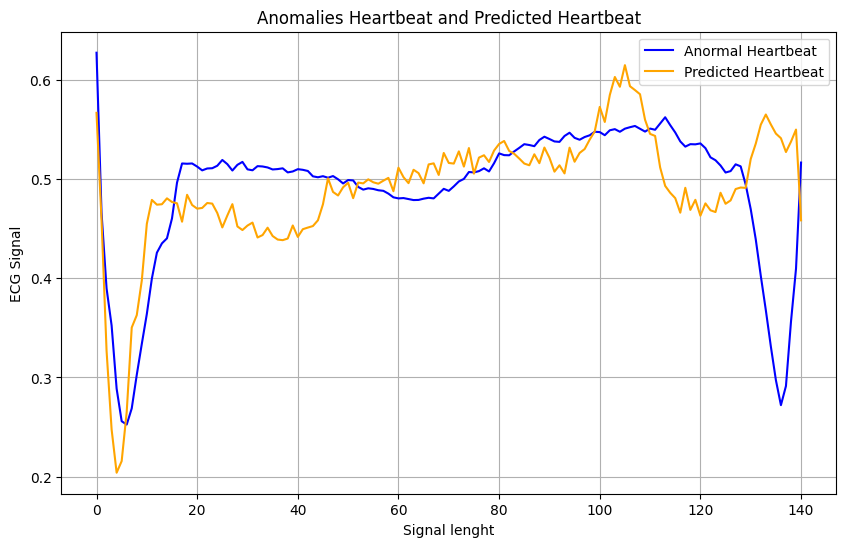

In [ ]:
# Plot anomalous heartbeat and its corresponding predicted heartbeat
plt.figure(figsize=(10, 6))
selected_index = np.random.randint(anomalous_train_data_ad.shape[0])
plt.plot(anomalous_train_data_ad[0],color='blue', label='Anormal Heartbeat')
plt.plot(decoded_imgs1[0], color='orange', label='Predicted Heartbeat')
plt.title('Anomalies Heartbeat and Predicted Heartbeat')
plt.xlabel('Signal lenght')
plt.ylabel('ECG Signal')
plt.legend()
plt.grid(True)
plt.show()

## **Method 2 :Variational Autoencoder**

In [ ]:
##define a function performing the sampling in the latent space using the reparametrisation trick
##(this allows backpropagation of the gradient).
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
#Define the encoder part of the network, containing the sampling step.

def encoder_model(normal_train_data_ad):
    encoder_inputs = tf.keras.Input(shape=(normal_train_data_ad.shape[1]))
    x = layers.Dense(32, activation="relu")(encoder_inputs)
    x = layers.Dense(16, activation="relu")(x)
    x = layers.Dense(8, activation="relu")(x)

    # Copy the network from above and generate the latent space of mean and log-variance
    z_mean = layers.Dense(8, name="z_mean")(x)
    z_log_var = layers.Dense(8, name="z_log_var")(x)

    # Sample from these distributions
    z = Sampling()([z_mean, z_log_var])

    encoder = tf.keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
    return encoder

In [ ]:
# Define the decoding network

def decoder_model(normal_train_data):
    # Recreate the network we used for the 'normal' autoencoder
    latent_inputs = tf.keras.Input(shape=(8,))
    x = layers.Dense(16, activation="relu")(latent_inputs)
    x = layers.Dense(32, activation="relu")(x)
    decoder_outputs = layers.Dense(normal_train_data_ad.shape[1], activation="relu")(x)
    decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")
    return decoder

In [ ]:
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.keras.losses.binary_crossentropy(data, reconstruction)
            )
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(kl_loss)
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": total_loss,
            "reconstruction_loss": reconstruction_loss,
            "kl_loss": kl_loss,
        }

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded[2])
        return decoded

    def get_config(self):
        config = super(VAE, self).get_config()
        config.update({
            'encoder': self.encoder.get_config(),
            'decoder': self.decoder.get_config(),
        })
        return config

###########################################################################
#############  Machine Learning for Science Team(2020) ####################
###########################################################################

In [ ]:
# Get the encoder and decoder models
encoder = encoder_model(normal_train_data_ad)
decoder = decoder_model(normal_test_data_ad)

# Get the combined model
vae = VAE(encoder, decoder)

# Compile the model
vae.compile(optimizer=tf.keras.optimizers.Adam())

# Fit the model to the training set
history_vea = vae.fit(normal_train_data_ad, normal_train_data_ad,
          epochs=100,
          batch_size=16,
          shuffle=True)


##########################################################################
######  Sciascio, E. D., et al, (2021), Variational AutoEncoders  ########
##########################################################################

Epoch 1/100
166/166 [==============================] - 3s 4ms/step - loss: 1.8992 - reconstruction_loss: 1.8971 - kl_loss: 0.0021
Epoch 2/100
166/166 [==============================] - 1s 4ms/step - loss: 0.8876 - reconstruction_loss: 0.8867 - kl_loss: 9.8281e-04
Epoch 3/100
166/166 [==============================] - 1s 4ms/step - loss: 0.8289 - reconstruction_loss: 0.8284 - kl_loss: 4.6477e-04
Epoch 4/100
166/166 [==============================] - 1s 4ms/step - loss: 0.8014 - reconstruction_loss: 0.8011 - kl_loss: 2.8726e-04
Epoch 5/100
166/166 [==============================] - 1s 4ms/step - loss: 0.7855 - reconstruction_loss: 0.7852 - kl_loss: 2.2394e-04
Epoch 6/100
166/166 [==============================] - 1s 4ms/step - loss: 0.7771 - reconstruction_loss: 0.7768 - kl_loss: 2.5217e-04
Epoch 7/100
166/166 [==============================] - 1s 4ms/step - loss: 0.7690 - reconstruction_loss: 0.7688 - kl_loss: 2.2049e-04
Epoch 8/100
166/166 [==============================] - 1s 4ms/step

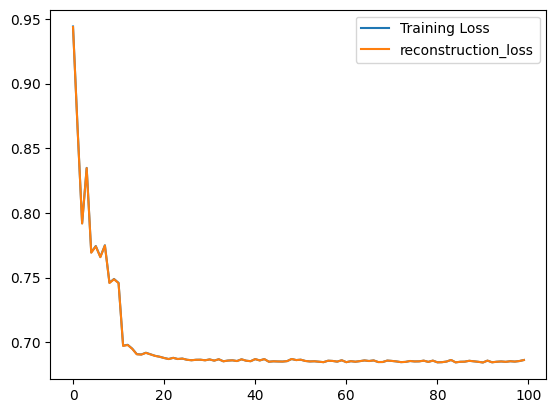

In [ ]:
plt.plot(history_vea.history["loss"], label="Training Loss")
plt.plot(history_vea.history["reconstruction_loss"], label="reconstruction_loss")
plt.legend()

In [ ]:
# Get the encoded representations
encoded_imgs = vae.encoder(normal_test_data_ad)[2]
# Get the encoded representations
encoded_imgs = vae.encoder(normal_test_data_ad)[2]

In [ ]:
# Pass the encoded representations to the decoder
decoded_imgs = vae.decoder(encoded_imgs).numpy()

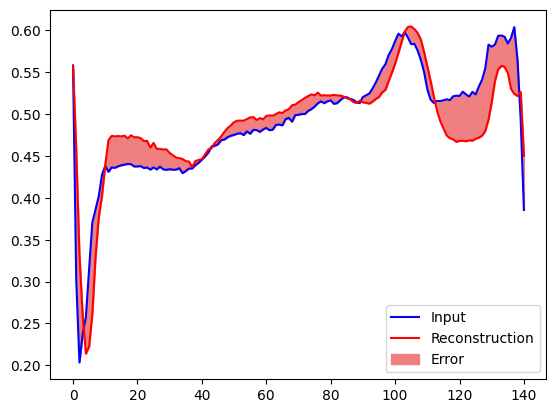

In [ ]:
# Plot input, reconstruction, and error
plt.plot(normal_test_data_ad[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(decoded_imgs.shape[1]), decoded_imgs[0], normal_test_data_ad[0][:decoded_imgs.shape[1]], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

In [ ]:
# Feed-forward pass through the encoder
z_mean, z_log_var, z = vae.encoder(normal_train_data_ad)

# Sample from the latent space distribution
z_sampled = tf.random.normal(tf.shape(z_mean)) * tf.exp(0.5 * z_log_var) + z_mean

# Feed-forward pass through the decoder
reconstructions = vae.decoder(z_sampled)


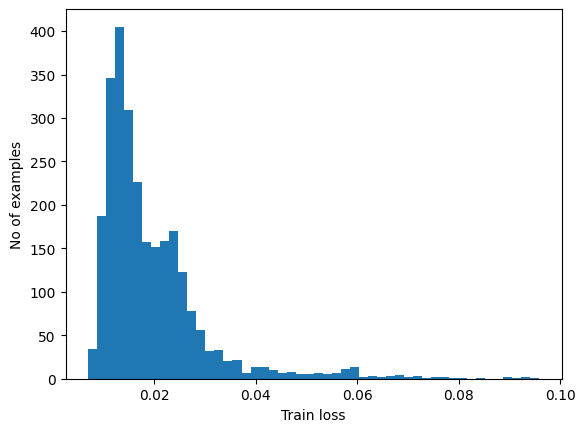

In [ ]:
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data_ad)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()


In [ ]:
threshold_vae = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold_vae)

Threshold:  0.030425139


In [ ]:
# Feed-forward pass through the encoder
z_mean, z_log_var, z = vae.encoder(anomalous_test_data_ad)

# Sample from the latent space distribution
z_sampled = tf.random.normal(tf.shape(z_mean)) * tf.exp(0.5 * z_log_var) + z_mean

# Feed-forward pass through the decoder
reconstructions = vae.decoder(z_sampled)

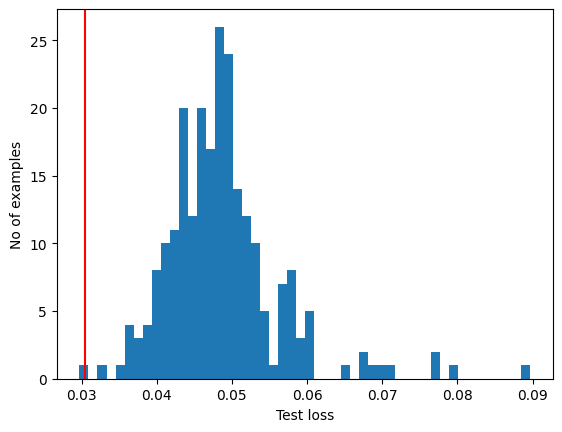

In [ ]:
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data_ad)

plt.hist(test_loss, bins=50)
plt.axvline(threshold_vae,c='r')
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
#Create 4 functions to predict, convert predictions to labels and manually calculate and print evaluation metrics
def predict(model, data, threshold):
    reconstructions = model(data)
    loss = tf.keras.losses.mae(reconstructions, data)
    return tf.math.less(loss, threshold)

def convert_to_labels(predictions):
    if len(predictions.shape) == 1:
        return tf.cast(predictions, tf.int32)  # Convert to integer
    elif len(predictions.shape) == 2:
        return tf.argmax(predictions, axis=-1)
    else:
        raise ValueError("Invalid predictions tensor shape.")

def calculate_metrics(labels, predicted_labels):
    labels = tf.cast(labels, tf.int32)

    # Calculate True Positives, True Negatives, False Positives, False Negatives
    TP = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 1), tf.equal(labels, 1)), tf.float32))
    TN = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 0), tf.equal(labels, 0)), tf.float32))
    FP = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 1), tf.equal(labels, 0)), tf.float32))
    FN = tf.reduce_sum(tf.cast(tf.math.logical_and(tf.equal(predicted_labels, 0), tf.equal(labels, 1)), tf.float32))

    # Calculate metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP + 1e-7)
    recall = TP / (TP + FN + 1e-7)
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)

    return accuracy, precision, recall, f1_score


def print_stats(predictions, labels):
    predicted_labels = convert_to_labels(predictions)
    labels = tf.cast(labels, tf.float32)

    accuracy, precision, recall, f1_score = calculate_metrics(labels, predicted_labels)

    print("Accuracy = {}".format(accuracy))
    print("Precision = {}".format(precision))
    print("Recall = {}".format(recall))
    print("F1 Score = {}".format(f1_score))

preds = predict(vae, test_data_ad, threshold_vae)
print_stats(preds, test_labels_ad)

Accuracy = 0.8821292519569397
Precision = 1.0
Recall = 0.8821292519569397
F1 Score = 0.937373697757721


In [ ]:
#Create 2 functions to calculate and print confusion matrix by one hot encoding the labels
def calculate_confusion_matrix(labels, predicted_labels):
    predicted_labels_one_hot = tf.one_hot(tf.cast(predicted_labels, tf.int32), depth=2, dtype=tf.int32)
    labels_one_hot = tf.one_hot(tf.cast(labels, tf.int32), depth=2, dtype=tf.int32)

    # Calculate True Positives, True Negatives, False Positives, False Negatives
    TP = tf.reduce_sum(predicted_labels_one_hot[:, 1] * labels_one_hot[:, 1])
    TN = tf.reduce_sum((1 - predicted_labels_one_hot[:, 1]) * (1 - labels_one_hot[:, 1]))
    FP = tf.reduce_sum(predicted_labels_one_hot[:, 1] * (1 - labels_one_hot[:, 1]))
    FN = tf.reduce_sum((1 - predicted_labels_one_hot[:, 1]) * labels_one_hot[:, 1])

    return TP, TN, FP, FN

def print_confusion_matrix(TP, TN, FP, FN):
    print("True Positives (TP) =", TP.numpy())
    print("True Negatives (TN) =", TN.numpy())
    print("False Positives (FP) =", FP.numpy())
    print("False Negatives (FN) =", FN.numpy())

# Calculate confusion matrix
TP, TN, FP, FN = calculate_confusion_matrix(test_labels_ad, preds)

# Print confusion matrix values
print_confusion_matrix(TP, TN, FP, FN)


True Positives (TP) = 232
True Negatives (TN) = 236
False Positives (FP) = 1
False Negatives (FN) = 31


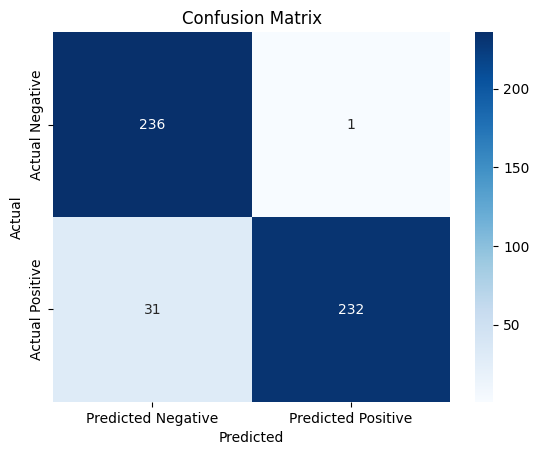

In [ ]:
#Define function to plot the confusion matrix as a seaborn heatmap
def plot_confusion_matrix(TP, TN, FP, FN):
    confusion_matrix = [[TN, FP],
                        [FN, TP]]

    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(TP.numpy(), TN.numpy(), FP.numpy(), FN.numpy())

# **Classification**

### **Splitting the Dataset**

In [ ]:
# Create binary labels and the counts for each class
binary_labels = vis_df1[0].map({1: 0, 2: 1, 3: 1, 4: 1, 5: 1})
class_counts = binary_labels.value_counts()
counts = np.bincount(binary_labels)

# Extract negative and positive counts
neg = counts[0]
pos = counts[1] if len(counts) > 1 else 0

total = neg + pos

print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

Examples:
    Total: 5000
    Positive: 2081 (41.62% of total)



In [ ]:
# Split the dataset into train, validation, and test sets
train_df_class, test_df_class = train_test_split(vis_df1, test_size=0.1)
train_df_class, val_df_class = train_test_split(train_df_class, test_size=0.1)

# Form arrays of labels and features
train_labels_class = np.array(train_df_class.pop(0))
val_labels_class = np.array(val_df_class.pop(0))
test_labels_class = np.array(test_df_class.pop(0))
bool_train_labels_class = (train_labels_class == 2) | (train_labels_class == 3) | (train_labels_class == 4) | (train_labels_class == 5)

train_features_class = np.array(train_df_class)
val_features_class = np.array(val_df_class)
test_features_class = np.array(test_df_class)

# Ensure validation set has at least one record from each class
missing_classes = set(np.unique(train_labels_class)) - set(np.unique(val_labels_class))
while missing_classes:
    idx = np.random.choice(np.where(np.isin(train_labels_class, list(missing_classes)))[0])
    val_features_class = np.vstack((val_features_class, train_features_class[idx]))
    val_labels_class = np.hstack((val_labels_class, train_labels_class[idx]))
    missing_classes = set(np.unique(train_labels_class)) - set(np.unique(val_labels_class))

# Shuffle the training and validation sets
np.random.shuffle(train_features_class)
np.random.shuffle(val_features_class)



In [ ]:
# Dataset is imbalanced so checking the class probability is similar between training,validation and testing before moving forward
#Scale features for easier comparison
scaler = StandardScaler()
train_features_class = scaler.fit_transform(train_features_class)

val_features_class = scaler.transform(val_features_class)
test_features_class = scaler.transform(test_features_class)

print(f'Average class probability in training set:   {train_labels_class.mean():.4f}')
print(f'Average class probability in validation set: {val_labels_class.mean():.4f}')
print(f'Average class probability in test set:       {test_labels_class.mean():.4f}')

print('Training labels shape:', train_labels_class.shape)
print('Validation labels shape:', val_labels_class.shape)
print('Test labels shape:', test_labels_class.shape)

print('Training features shape:', train_features_class.shape)
print('Validation features shape:', val_features_class.shape)
print('Test features shape:', test_features_class.shape)

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

Average class probability in training set:   1.5284
Average class probability in validation set: 1.5444
Average class probability in test set:       1.5040
Training labels shape: (4050,)
Validation labels shape: (450,)
Test labels shape: (500,)
Training features shape: (4050, 140)
Validation features shape: (450, 140)
Test features shape: (500, 140)


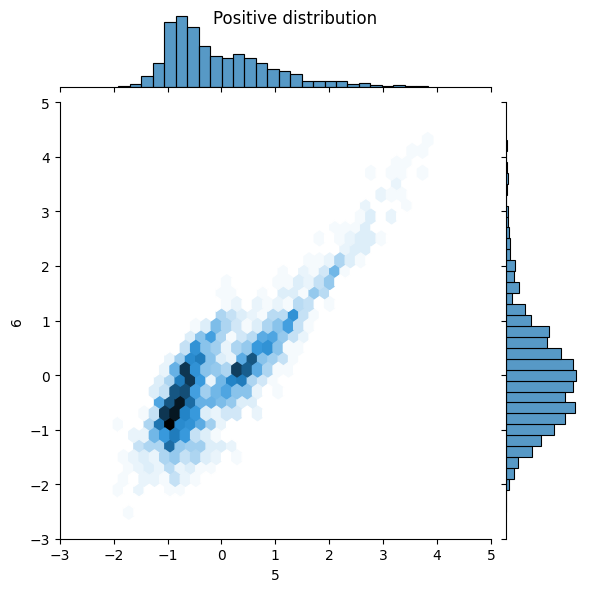

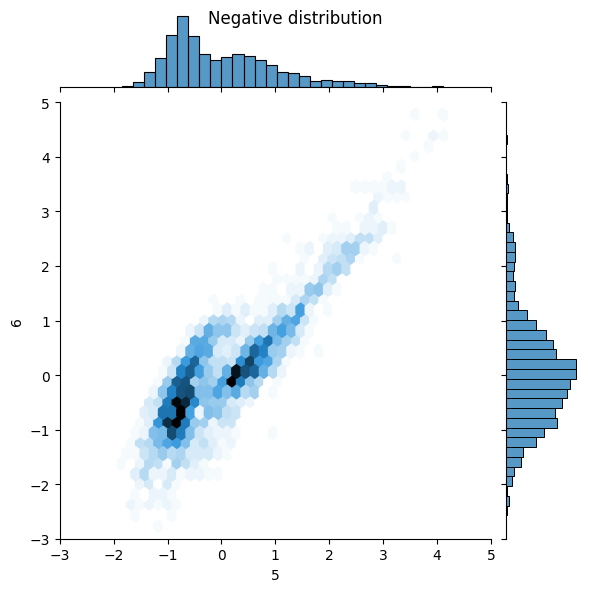

In [ ]:
#Using a jointplot to check the distribution of neg/pos.
#Pos has more extreme values as expected.

pos_df_class = pd.DataFrame(train_features_class[ bool_train_labels_class], columns=train_df_class.columns)
neg_df_class = pd.DataFrame(train_features_class[~bool_train_labels_class], columns=train_df_class.columns)

sns.jointplot(x=pos_df_class[5], y=pos_df_class[6],
              kind='hex', xlim=(-3,5), ylim=(-3,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df_class[5], y=neg_df_class[6],
              kind='hex', xlim=(-3,5), ylim=(-3,5))
_ = plt.suptitle("Negative distribution")

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

### **Baseline Model**

In [ ]:
#Define metrics needed to evaluate model
#Define a function to create and compile a model with minimal layers initially

Clf_metrics = [
      keras.metrics.TruePositives(name='True Positives'),
      keras.metrics.FalsePositives(name='False Positives'),
      keras.metrics.TrueNegatives(name='True Negatives'),
      keras.metrics.FalseNegatives(name='False Negatives'),
      keras.metrics.CategoricalAccuracy(name='Accuracy'),
      keras.metrics.Precision(name='Precision'),
      keras.metrics.Recall(name='Recall'),
      keras.metrics.AUC(name='AUC'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
      keras.metrics.F1Score(name='F1 Score'),
]

def make_clf_model(input_shape, num_classes, metrics=Clf_metrics, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    clf_model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=input_shape),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax', bias_initializer=output_bias),
    ])

    clf_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.CategoricalCrossentropy(),
        metrics=metrics
    )

    return clf_model

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

In [ ]:
#Initialise epochs, batch size and early stopping functions
class_epochs = 100
clf_batch_size = 500

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
#Initialise the number of features and classes and get a summary of basic model.
num_features = train_features_class.shape[1]
num_classes = 5
clf_model = make_clf_model((num_features,), num_classes)
clf_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 16)                2256      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 5)                 85        
                                                                 
Total params: 2341 (9.14 KB)
Trainable params: 2341 (9.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Use basic model initialised with 0 bias to get first set of predictions
clf_model.predict(train_features_class[:10])

1/1 [==============================] - 0s 86ms/step


array([[0.12598449, 0.07450708, 0.06817085, 0.36627203, 0.36506546],
       [0.19446146, 0.07521426, 0.05591207, 0.25988895, 0.41452318],
       [0.03566519, 0.18234888, 0.14539856, 0.31694832, 0.31963897],
       [0.0104867 , 0.11198776, 0.18332046, 0.41730466, 0.2769005 ],
       [0.03099539, 0.32050166, 0.03524871, 0.27544054, 0.3378137 ],
       [0.0292793 , 0.12756945, 0.02489171, 0.13352916, 0.68473047],
       [0.00523918, 0.25744238, 0.18536872, 0.20208572, 0.349864  ],
       [0.02094348, 0.21534757, 0.14962101, 0.28607693, 0.32801107],
       [0.06235484, 0.03177256, 0.01772513, 0.6314918 , 0.25665572],
       [0.10327639, 0.16915376, 0.14833763, 0.24302731, 0.3362049 ]],
      dtype=float32)

In [ ]:
#Use One Hot Encoding to to reshape the labels combining all labels from train, validation, and test sets to ensure all unique classes are considered
all_labels = np.concatenate((train_labels_class, val_labels_class, test_labels_class))


clf_encoder = OneHotEncoder()
clf_labels_onehot = clf_encoder.fit_transform(all_labels.reshape(-1, 1)).toarray()


clf_train_labels_onehot = clf_labels_onehot[:len(train_labels_class)]
clf_val_labels_onehot = clf_labels_onehot[len(train_labels_class):len(train_labels_class) + len(val_labels_class)]
clf_test_labels_onehot = clf_labels_onehot[-len(test_labels_class):]



In [ ]:
#Calculte loss of baseline model intialised with 0 bias
results = clf_model.evaluate(train_features_class, clf_train_labels_onehot, batch_size=clf_batch_size, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 2.6253


In [ ]:
#Calculate initial bias
clf_initial_bias = np.log([pos/neg])
print(clf_initial_bias)

[-0.33839254]


In [ ]:
#Use model initialised with calculated initial bias to get predictions
clf_model1 = make_clf_model((num_features,), num_classes, output_bias=clf_initial_bias)
clf_model1.predict(train_features_class[:10])

1/1 [==============================] - 0s 59ms/step


array([[0.28866863, 0.16978338, 0.20788373, 0.1327419 , 0.2009224 ],
       [0.30091304, 0.10351386, 0.43749344, 0.06250793, 0.0955717 ],
       [0.03513796, 0.168705  , 0.64791816, 0.12325443, 0.0249845 ],
       [0.00163121, 0.00803751, 0.9837996 , 0.00465359, 0.00187809],
       [0.00582825, 0.19501849, 0.7190561 , 0.05351738, 0.02657977],
       [0.17510025, 0.2719687 , 0.18516001, 0.23564637, 0.13212462],
       [0.15410458, 0.14112274, 0.48924163, 0.15978247, 0.05574852],
       [0.05558134, 0.18579727, 0.599804  , 0.12482073, 0.03399666],
       [0.33495703, 0.16594514, 0.21136455, 0.13178028, 0.15595298],
       [0.12480699, 0.16651894, 0.42772955, 0.1259474 , 0.15499713]],
      dtype=float32)

In [ ]:
#Calculte loss of model intialised with initial bias
results = clf_model1.evaluate(train_features_class, clf_train_labels_onehot, batch_size=clf_batch_size, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 2.2313


In [ ]:
#Save initial weights as a tempfile so it can be loaded into further models
initial_weights_clf = os.path.join(tempfile.mkdtemp(), 'initial_weights_clf')
clf_model1.save_weights(initial_weights_clf)

In [ ]:
#Create model initialised with 0 bias.
clf_model2 = make_clf_model((num_features,),num_classes)
clf_model2.load_weights(initial_weights_clf)

# Get the shape of the bias tensor
bias_shape = clf_model2.layers[-1].bias.shape

# Assign a bias value with the correct shape
zero_bias = np.zeros(bias_shape)

# Assign the zero bias value to the bias tensor
clf_model2.layers[-1].bias.assign(zero_bias)

# Train the model
zero_bias_history_clf = clf_model2.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=8,
    validation_data=(val_features_class, clf_val_labels_onehot),
    verbose=0
)


In [ ]:
#Create model initialised with initial bias.
clf_model3 = make_clf_model((num_features,), num_classes)
clf_model3.load_weights(initial_weights_clf)
careful_bias_history_clf = clf_model3.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=20,
    validation_data=(val_features_class, clf_val_labels_onehot),
    verbose=0)

In [ ]:
#Define a function to plot the validation and training loss for both models.
colors = ['blue', 'red', 'green', 'orange']

def plot_clf_loss(history, label, n):
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

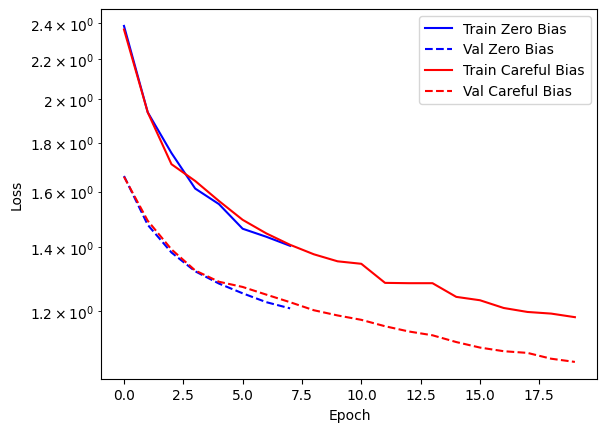

In [ ]:
plot_clf_loss(zero_bias_history_clf, "Zero Bias", 0)
plot_clf_loss(careful_bias_history_clf, "Careful Bias", 1)

In [ ]:
#Careful bias is better

In [ ]:
#Train baseline model with careful bias and early stopping
clf_model4 = make_clf_model((num_features,), num_classes)
clf_model4.load_weights(initial_weights_clf)

baseline_history_clf = clf_model4.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(val_features_class, clf_val_labels_onehot))

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################


Epoch 1/100
9/9 [==============================] - 2s 98ms/step - loss: 2.3426 - True Positives: 785.0000 - False Positives: 1586.0000 - True Negatives: 16414.0000 - False Negatives: 3715.0000 - Accuracy: 0.3211 - Precision: 0.3311 - Recall: 0.1744 - AUC: 0.5794 - prc: 0.2601 - F1 Score: 0.1618 - val_loss: 1.6668 - val_True Positives: 60.0000 - val_False Positives: 98.0000 - val_True Negatives: 1702.0000 - val_False Negatives: 390.0000 - val_Accuracy: 0.3822 - val_Precision: 0.3797 - val_Recall: 0.1333 - val_AUC: 0.6453 - val_prc: 0.3060 - val_F1 Score: 0.1798
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 1.9254 - True Positives: 813.0000 - False Positives: 1198.0000 - True Negatives: 15002.0000 - False Negatives: 3237.0000 - Accuracy: 0.3551 - Precision: 0.4043 - Recall: 0.2007 - AUC: 0.6138 - prc: 0.2960 - F1 Score: 0.1600 - val_loss: 1.4710 - val_True Positives: 104.0000 - val_False Positives: 91.0000 - val_True Negatives: 1709.0000 - val_False Negatives: 3

In [ ]:
#Define function to plot metrics in subplots.
def plot_metrics_clf(history):
    metrics = ['loss', 'prc', 'Precision', 'Recall']
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

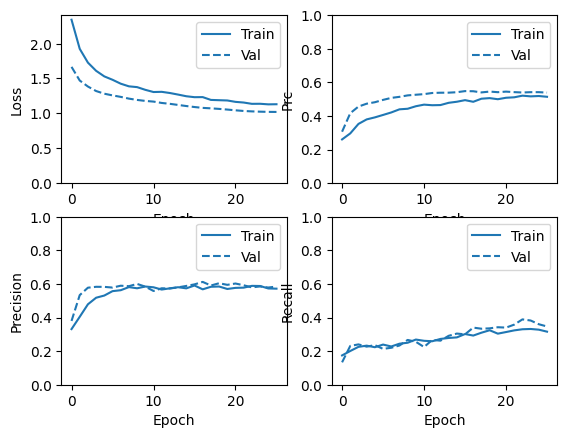

In [ ]:
plot_metrics_clf(baseline_history_clf)

In [ ]:
clf_train_predictions_baseline = clf_model4.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_baseline = clf_model4.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 20ms/step


In [ ]:
#Create function that creates a confusion matrix that can be used for each model
def plot_cm_clf(labels, predictions, threshold=0.5):
    # Convert one-hot encoded labels to single labels
    labels_single = np.argmax(labels, axis=1)
    predictions_single = np.argmax(predictions, axis=1)

    # Compute confusion matrix
    cm = confusion_matrix(labels_single, predictions_single)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################


loss :  1.1285914182662964
True Positives :  94.0
False Positives :  153.0
True Negatives :  1847.0
False Negatives :  406.0
Accuracy :  0.5580000281333923
Precision :  0.38056680560112
Recall :  0.18799999356269836
AUC :  0.8473910093307495
prc :  0.45323431491851807
F1 Score :  [0.71874994 0.02955665 0.         0.         0.        ]



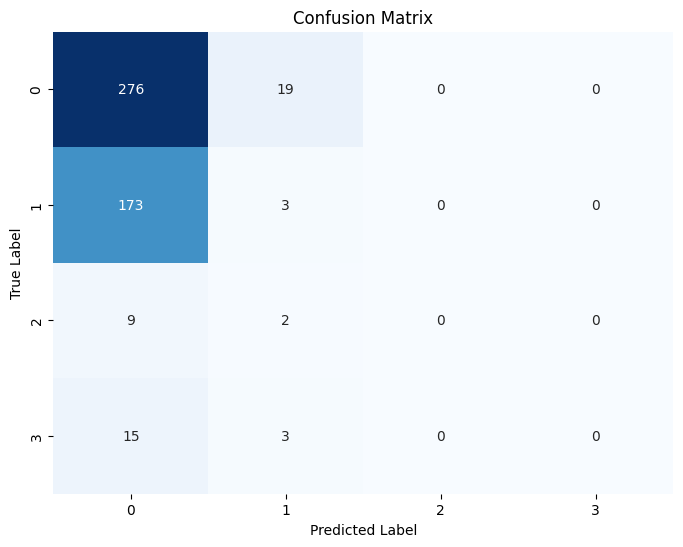

In [ ]:
#Evaulate results, get metrics and configure a confusion matrix
baseline_results_clf = clf_model4.evaluate(test_features_class, clf_test_labels_onehot,
                                  batch_size=clf_batch_size, verbose=0)
for name, value in zip(clf_model4.metrics_names, baseline_results_clf):
  print(name, ': ', value)
print()

plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_baseline)

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

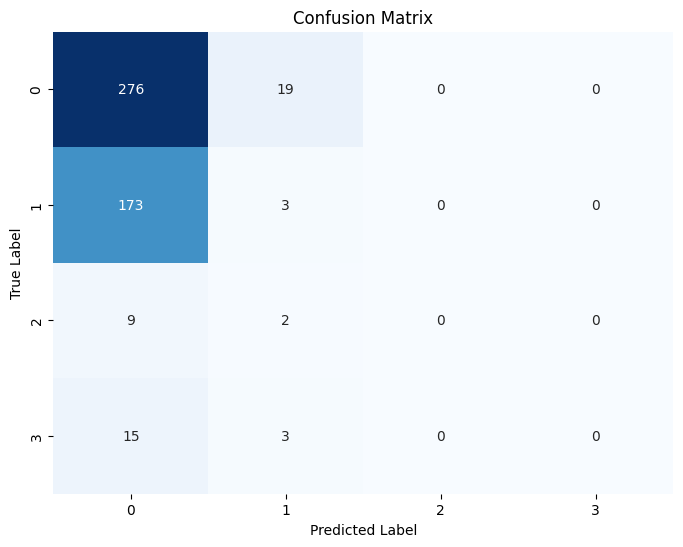

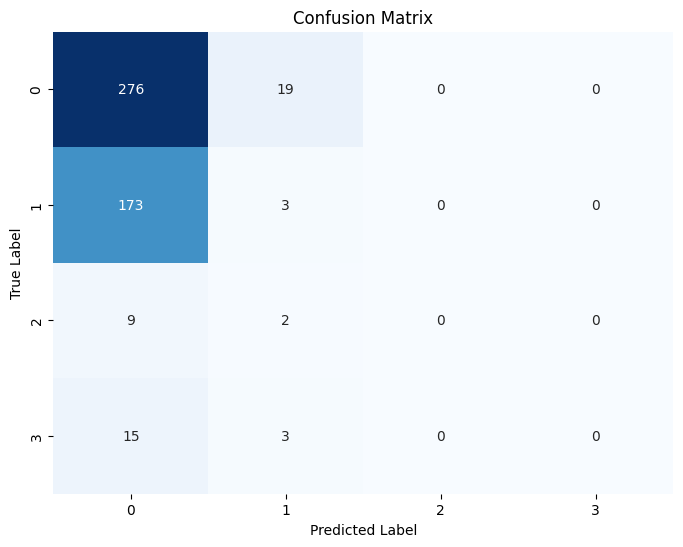

In [ ]:
#Plot confusion matrices to see if changing threshold value has an effect on predictions
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_baseline, threshold=0.001)
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_baseline, threshold=0.9)

In [ ]:
#Binarise the labels
label_binarizer = LabelBinarizer().fit(train_labels_class)
y_onehot_test = label_binarizer.transform(test_labels_class)
y_onehot_train = label_binarizer.transform(train_labels_class)
y_onehot_val = label_binarizer.transform(val_labels_class)

In [ ]:
#Check if the binarisation worked
label_binarizer.transform([5])

array([[0, 0, 0, 0, 1]])

In [ ]:
#Initialise class IDs for ROC curvers
class_of_interest = 5
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


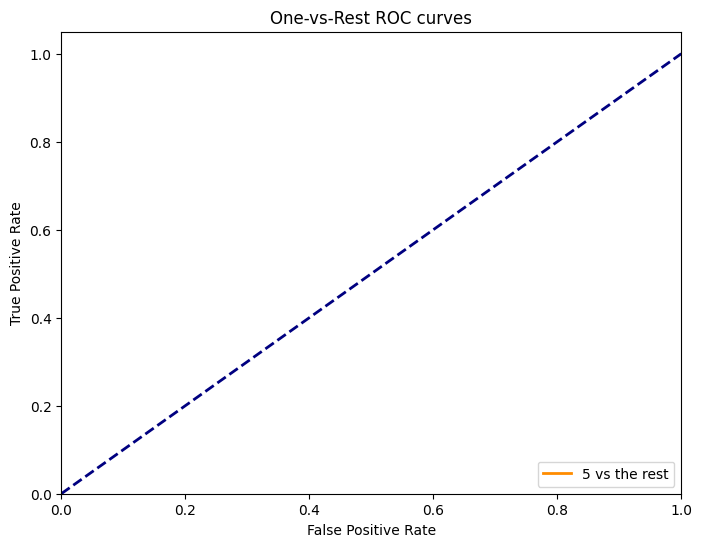

In [ ]:
# Compute One vs Rest ROC curve (sample class = class 5)
fpr, tpr, _ = roc_curve(y_onehot_test[:, class_id], clf_test_predictions_baseline[:, class_id])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"{class_of_interest} vs the rest")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC curves')
plt.legend(loc="lower right")
plt.show()


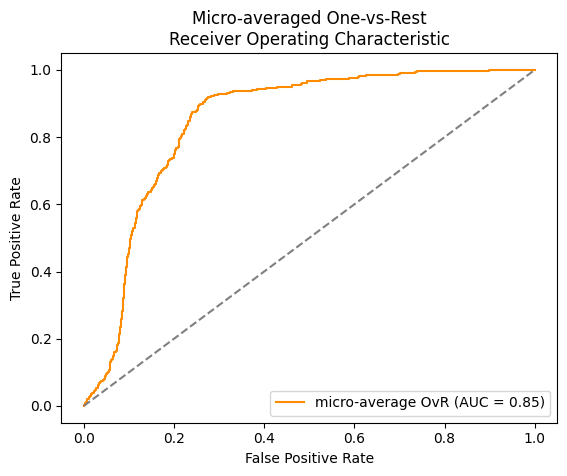

In [ ]:
#Plot Micro-averaged One-vs-Rest

display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    clf_test_predictions_baseline.ravel(),
    name="micro-average OvR",
    color="darkorange",
)

_ = plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance Level')
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)


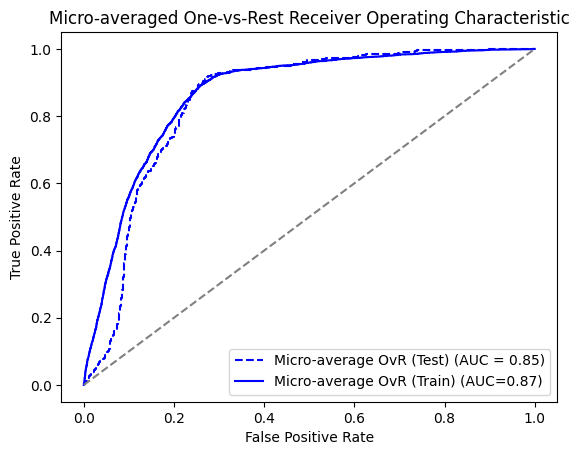

In [ ]:
# Calculate ROC curve for clf_train_predictions_baseline
fpr_train_baseline_clf, tpr_train_baseline_clf, _ = roc_curve(y_onehot_train.ravel(), clf_train_predictions_baseline.ravel())
roc_auc_train = auc(fpr_train_baseline_clf, tpr_train_baseline_clf)


# Plot the micro-average ROC curve for clf_test_predictions_baseline
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    clf_test_predictions_baseline.ravel(),
    name="Micro-average OvR (Test)",
    color="blue",
    linestyle='--',
)

# Plot the micro-average ROC curve for clf_train_predictions_baseline
plt.plot(fpr_train_baseline_clf, tpr_train_baseline_clf, color="blue", linestyle="-", label=f"Micro-average OvR (Train) (AUC={roc_auc_train:.2f})")


plt.plot([0, 1], [0, 1], color='gray', linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest Receiver Operating Characteristic")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


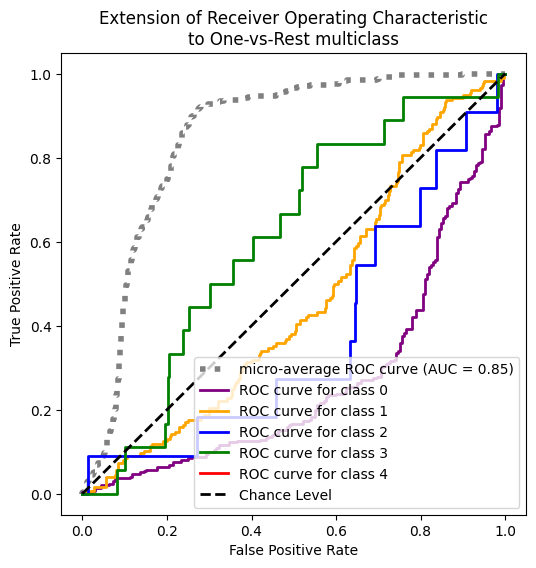

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

# Compute micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_onehot_test.ravel(), clf_test_predictions_baseline.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-average ROC curve
plt.plot(
    fpr_micro,
    tpr_micro,
    label=f"micro-average ROC curve (AUC = {roc_auc_micro:.2f})",
    color="gray",
    linestyle=":",
    linewidth=4,
)

# Plot ROC curves for each class
colors = cycle(["purple", "orange", "blue", "green", "red"])
for class_id, color in zip(range(num_classes), colors):
    # Compute ROC curve for each class
    fpr_class, tpr_class, _ = roc_curve(y_onehot_test[:, class_id], clf_test_predictions_baseline[:, class_id])

    # Plot ROC curve for each class
    plt.plot(
        fpr_class,
        tpr_class,
        label=f"ROC curve for class {class_id}",
        color=color,
        linewidth=2,
    )


plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2, label='Chance Level')
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)
plt.legend(loc="lower right")
plt.show()


##########################################################
##Code developed using existing code: SciKitLearn (2024)##
##########################################################

### **Class Weight Model**

In [ ]:
# Initialise class weights by scaling by 2 (keeps the loss similar)
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
weight_for_2 = (1 / pos) * (total / 2.0)
weight_for_3 = (1 / pos) * (total / 2.0)
weight_for_4 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4}

print('Weight for class 1: {:.2f}'.format(weight_for_0))
print('Weight for class 2: {:.2f}'.format(weight_for_1))
print('Weight for class 3: {:.2f}'.format(weight_for_2))
print('Weight for class 4: {:.2f}'.format(weight_for_3))
print('Weight for class 5: {:.2f}'.format(weight_for_4))

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

Weight for class 1: 0.86
Weight for class 2: 1.20
Weight for class 3: 1.20
Weight for class 4: 1.20
Weight for class 5: 1.20


In [ ]:
#Create and compile model using class weights
weighted_model_clf = make_clf_model((num_features,), num_classes)
weighted_model_clf.load_weights(initial_weights_clf)
bias_shape = clf_model4.layers[-1].bias.shape
zero_bias = np.zeros(bias_shape)
clf_model4.layers[-1].bias.assign(zero_bias)

weighted_history_clf = weighted_model_clf.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(val_features_class, clf_val_labels_onehot),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
9/9 [==============================] - 3s 176ms/step - loss: 2.4084 - True Positives: 693.0000 - False Positives: 1615.0000 - True Negatives: 16585.0000 - False Negatives: 3857.0000 - Accuracy: 0.3136 - Precision: 0.3003 - Recall: 0.1523 - AUC: 0.5685 - prc: 0.2492 - F1 Score: 0.1561 - val_loss: 1.6906 - val_True Positives: 31.0000 - val_False Positives: 79.0000 - val_True Negatives: 1721.0000 - val_False Negatives: 419.0000 - val_Accuracy: 0.3356 - val_Precision: 0.2818 - val_Recall: 0.0689 - val_AUC: 0.6149 - val_prc: 0.2713 - val_F1 Score: 0.1845
Epoch 2/100
9/9 [==============================] - 1s 155ms/step - loss: 1.9870 - True Positives: 603.0000 - False Positives: 1067.0000 - True Negatives: 15133.0000 - False Negatives: 3447.0000 - Accuracy: 0.3299 - Precision: 0.3611 - Recall: 0.1489 - AUC: 0.5877 - prc: 0.2772 - F1 Score: 0.1717 - val_loss: 1.4929 - val_True Positives: 61.0000 - val_False Positives: 66.0000 - val_True Negatives: 1734.0000 - val_False Negatives: 

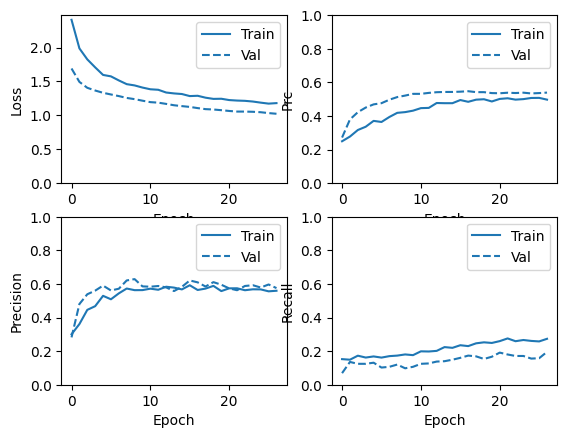

In [ ]:
plot_metrics_clf(weighted_history_clf)

In [ ]:
clf_train_predictions_weighted = weighted_model_clf.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_weighted = weighted_model_clf.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 21ms/step


loss :  1.129184365272522
True Positives :  49.0
False Positives :  95.0
True Negatives :  1905.0
False Negatives :  451.0
Accuracy :  0.5260000228881836
Precision :  0.3402777910232544
Recall :  0.09799999743700027
AUC :  0.8521720170974731
prc :  0.46216487884521484
F1 Score :  [0.6846361  0.07860262 0.         0.         0.        ]



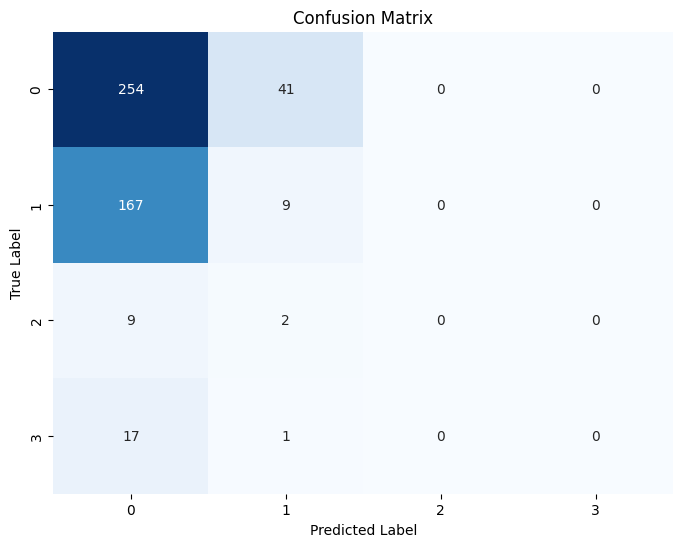

In [ ]:
weighted_results_clf = weighted_model_clf.evaluate(test_features_class, clf_test_labels_onehot,
                                           batch_size=clf_batch_size, verbose=0)
for name, value in zip(weighted_model_clf.metrics_names, weighted_results_clf):
  print(name, ': ', value)
print()

plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_weighted)

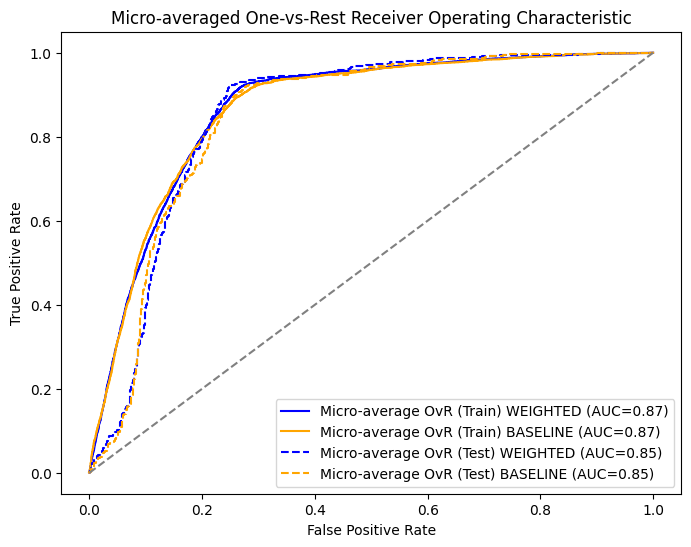

In [ ]:
# Calculate ROC curve for clf_train_predictions_weighted
fpr_train_weighted_clf, tpr_train_weighted_clf, _ = roc_curve(y_onehot_train.ravel(), clf_train_predictions_weighted.ravel())
roc_auc_train_weighted_clf = auc(fpr_train_weighted_clf, tpr_train_weighted_clf)

# Calculate ROC curve for clf_train_predictions_baseline
fpr_train_baseline_clf, tpr_train_baseline_clf, _ = roc_curve(y_onehot_train.ravel(), clf_train_predictions_baseline.ravel())
roc_auc_train_baseline_clf = auc(fpr_train_baseline_clf, tpr_train_baseline_clf)

# Calculate ROC curve for clf_test_predictions_weighted
fpr_test_weighted_clf, tpr_test_weighted_clf, _ = roc_curve(y_onehot_test.ravel(), clf_test_predictions_weighted.ravel())
roc_auc_test_weighted_clf = auc(fpr_test_weighted_clf, tpr_test_weighted_clf)

# Calculate ROC curve for clf_test_predictions_baseline
fpr_test_baseline_clf, tpr_test_baseline_clf, _ = roc_curve(y_onehot_test.ravel(), clf_test_predictions_baseline.ravel())
roc_auc_test_baseline_clf = auc(fpr_test_baseline_clf, tpr_test_baseline_clf)

# Plot all ROC curves
plt.figure(figsize=(8, 6))

# Plot the micro-average ROC curve for clf_train_predictions_weighted
plt.plot(fpr_train_weighted_clf, tpr_train_weighted_clf, color="blue", linestyle="-", label=f"Micro-average OvR (Train) WEIGHTED (AUC={roc_auc_train_weighted_clf:.2f})")

# Plot the micro-average ROC curve for clf_train_predictions_baseline
plt.plot(fpr_train_baseline_clf, tpr_train_baseline_clf, color="orange", linestyle="-", label=f"Micro-average OvR (Train) BASELINE (AUC={roc_auc_train_baseline_clf:.2f})")

# Plot the micro-average ROC curve for clf_test_predictions_weighted
plt.plot(fpr_test_weighted_clf, tpr_test_weighted_clf, color="blue", linestyle="--", label=f"Micro-average OvR (Test) WEIGHTED (AUC={roc_auc_test_weighted_clf:.2f})")

# Plot the micro-average ROC curve for clf_test_predictions_baseline
plt.plot(fpr_test_baseline_clf, tpr_test_baseline_clf, color="orange", linestyle="--", label=f"Micro-average OvR (Test) BASELINE (AUC={roc_auc_test_baseline_clf:.2f})")

# Plot the chance level (diagonal line)
plt.plot([0, 1], [0, 1], color='gray', linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest Receiver Operating Characteristic")
plt.legend()
plt.show()


In [ ]:
#BASELINE MODEL is BETTER

### **Oversampling Model**

In [ ]:
#Create new variables to separate positive and negative features
pos_features_class = train_features_class[bool_train_labels_class]
neg_features_class = train_features_class[~bool_train_labels_class]

pos_labels_class = clf_train_labels_onehot[bool_train_labels_class]
neg_labels_class = clf_train_labels_onehot[~bool_train_labels_class]

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

In [ ]:
#Randomly select positive samples to balance classes and display the shape
ids_class = np.arange(len(pos_features_class))
choices_class = np.random.choice(ids_class, len(neg_features_class))

res_pos_features_class = pos_features_class[choices_class]
res_pos_labels_class = pos_labels_class[choices_class]

res_pos_features_class.shape

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

(2363, 140)

In [ ]:
#Combine resampled positive and negative samples and display the shape
resampled_features_class = np.concatenate([res_pos_features_class, neg_features_class], axis=0)
resampled_labels_class = np.concatenate([res_pos_labels_class, neg_labels_class], axis=0)

order_class = np.arange(len(resampled_labels_class))
np.random.shuffle(order_class)
resampled_features_class = resampled_features_class[order_class]
resampled_labels_class = resampled_labels_class[order_class]

resampled_features_class.shape

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

(4726, 140)

In [ ]:
#Create new datasets
buffer_size_clf = 100000

def make_ds_clf(features, labels):
  ds_clf = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds_clf = ds_clf.shuffle(buffer_size_clf).repeat()
  return ds_clf

pos_ds_class = make_ds_clf(pos_features_class, pos_labels_class)
neg_ds_class = make_ds_clf(neg_features_class, neg_labels_class)

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

In [ ]:
#Print features and labels of a class in the new dataset
for features, label in pos_ds_class.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

Features:
 [ 0.06801758  0.35206126  0.67291108  0.88296132  0.96208348  0.6432195
 -0.11904603 -0.81348562 -1.22164102 -1.29013414 -1.22085507 -0.9763835
 -0.67646455 -0.60566397 -0.580818   -0.34155002  0.27962456  1.04818023
  1.27447191  1.0029735   1.06539443  1.28683596  1.14106629  1.08369945
  1.29353738  1.30901633  1.21445268  1.31009199  1.4578675   1.41990531
  1.3452956   1.36680463  1.31934962  1.28346947  1.29762509  1.31245103
  1.48366875  1.51322766  1.36096179  1.43574538  1.43743178  1.33266796
  1.43912236  1.44140729  1.300589    1.40933924  1.47510321  1.26860123
  1.20319202  1.2875357   1.2968058   1.2415784   1.16755741  1.17065863
  0.90123653  0.53089756  0.57265526  0.51360926  0.33682747  0.49970118
  0.47012519  0.1473216   0.16685739  0.20580547 -0.15233736 -0.30600827
 -0.17923039 -0.30621225 -0.50468473 -0.60598349 -0.76183327 -0.75924216
 -0.56002925 -0.60220921 -0.90913512 -1.06681701 -1.03388645 -0.9423727
 -0.86439886 -0.80781237 -0.65440525 -0.583

In [ ]:
#Merge both datasets and get mean
resampled_ds_clf = tf.data.Dataset.sample_from_datasets([pos_ds_class, neg_ds_class], weights=[0.5, 0.5])
resampled_ds_clf = resampled_ds_clf.batch(clf_batch_size).prefetch(2)

for features, label in resampled_ds_clf.take(1):
  print(label.numpy().mean())

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

0.2


In [ ]:
#Initialise steps per epoch
resampled_steps_per_epoch_clf = np.ceil(2.0*neg/clf_batch_size)
resampled_steps_per_epoch_clf

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################

12.0

In [ ]:
#Train resampled model on resampled dataset and 19 steps per epoch
resampled_model_clf = make_clf_model((num_features,), num_classes)
resampled_model_clf.load_weights(initial_weights_clf)
bias_shape = resampled_model_clf.layers[-1].bias.shape
zero_bias = np.zeros(bias_shape)
resampled_model_clf.layers[-1].bias.assign(zero_bias)

val_ds_clf = tf.data.Dataset.from_tensor_slices((val_features_class, clf_val_labels_onehot)).cache()
val_ds_clf = val_ds_clf.batch(clf_batch_size).prefetch(2)

resampled_history_clf = resampled_model_clf.fit(
    resampled_ds_clf,
    epochs=100,
    steps_per_epoch=resampled_steps_per_epoch_clf,
    callbacks=[early_stopping],
    validation_data=val_ds_clf)

#########################################################
##Code developed using existing code: TensorFlow (2024)##
#########################################################


Epoch 1/100
12/12 [==============================] - 3s 87ms/step - loss: 2.2943 - True Positives: 859.0000 - False Positives: 2255.0000 - True Negatives: 23745.0000 - False Negatives: 5641.0000 - Accuracy: 0.2912 - Precision: 0.2759 - Recall: 0.1322 - AUC: 0.5604 - prc: 0.2383 - F1 Score: 0.1573 - val_loss: 1.5908 - val_True Positives: 47.0000 - val_False Positives: 75.0000 - val_True Negatives: 1725.0000 - val_False Negatives: 403.0000 - val_Accuracy: 0.4089 - val_Precision: 0.3852 - val_Recall: 0.1044 - val_AUC: 0.6569 - val_prc: 0.3210 - val_F1 Score: 0.1985
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 1.8854 - True Positives: 847.0000 - False Positives: 1498.0000 - True Negatives: 22502.0000 - False Negatives: 5153.0000 - Accuracy: 0.3112 - Precision: 0.3612 - Recall: 0.1412 - AUC: 0.5848 - prc: 0.2695 - F1 Score: 0.1573 - val_loss: 1.4235 - val_True Positives: 68.0000 - val_False Positives: 56.0000 - val_True Negatives: 1744.0000 - val_False Negatives

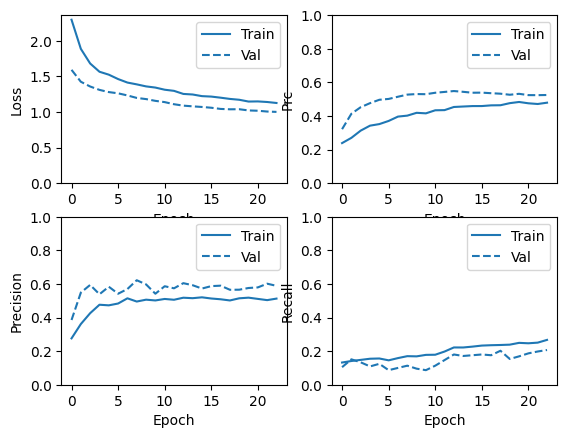

In [ ]:
plot_metrics_clf(resampled_history_clf)

In [ ]:
#Re-train model
EPOCHS=100

resampled_model_clf1 = make_clf_model((num_features,), num_classes)
resampled_model_clf1.load_weights(initial_weights_clf)
bias_shape = resampled_model_clf1.layers[-1].bias.shape
zero_bias = np.zeros(bias_shape)
resampled_model_clf1.layers[-1].bias.assign(zero_bias)

resampled_history_clf_1 = resampled_model_clf1.fit(
    resampled_ds_clf,
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds_clf))

Epoch 1/1000
20/20 [==============================] - 4s 106ms/step - loss: 2.1408 - True Positives: 1480.0000 - False Positives: 3247.0000 - True Negatives: 38553.0000 - False Negatives: 8970.0000 - Accuracy: 0.3026 - Precision: 0.3131 - Recall: 0.1416 - AUC: 0.5729 - prc: 0.2508 - F1 Score: 0.1633 - val_loss: 1.4648 - val_True Positives: 70.0000 - val_False Positives: 64.0000 - val_True Negatives: 1736.0000 - val_False Negatives: 380.0000 - val_Accuracy: 0.4644 - val_Precision: 0.5224 - val_Recall: 0.1556 - val_AUC: 0.7091 - val_prc: 0.3966 - val_F1 Score: 0.1873
Epoch 2/1000
20/20 [==============================] - 0s 20ms/step - loss: 1.6637 - True Positives: 1537.0000 - False Positives: 1978.0000 - True Negatives: 38022.0000 - False Negatives: 8463.0000 - Accuracy: 0.3654 - Precision: 0.4373 - Recall: 0.1537 - AUC: 0.6354 - prc: 0.3185 - F1 Score: 0.1787 - val_loss: 1.3498 - val_True Positives: 46.0000 - val_False Positives: 38.0000 - val_True Negatives: 1762.0000 - val_False Nega

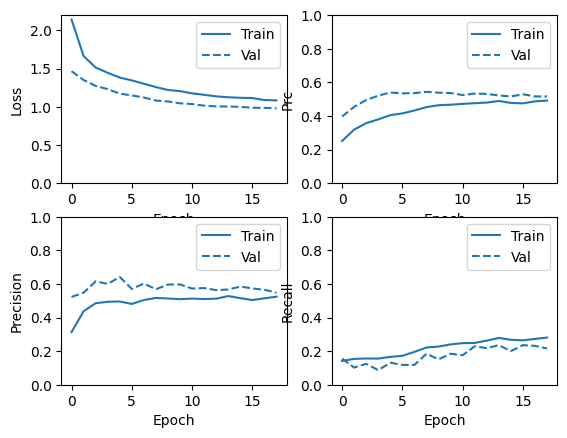

In [ ]:
plot_metrics_clf(resampled_history_clf_1)

In [ ]:
clf_train_predictions_resampled = resampled_model_clf1.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_resampled = resampled_model_clf1.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 21ms/step


loss :  1.0699267387390137
True Positives :  75.0
False Positives :  81.0
True Negatives :  1919.0
False Negatives :  425.0
Accuracy :  0.5419999957084656
Precision :  0.48076921701431274
Recall :  0.15000000596046448
AUC :  0.8656414747238159
prc :  0.5018675923347473
F1 Score :  [0.696477   0.12017167 0.         0.         0.        ]



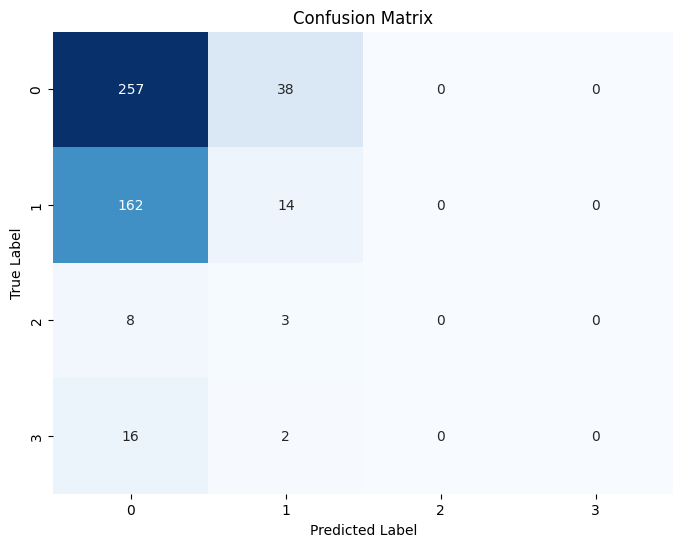

In [ ]:
resampled_results_clf = resampled_model_clf1.evaluate(test_features_class, clf_test_labels_onehot,
                                             batch_size=clf_batch_size, verbose=0)
for name, value in zip(resampled_model_clf1.metrics_names, resampled_results_clf):
  print(name, ': ', value)
print()
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_resampled)

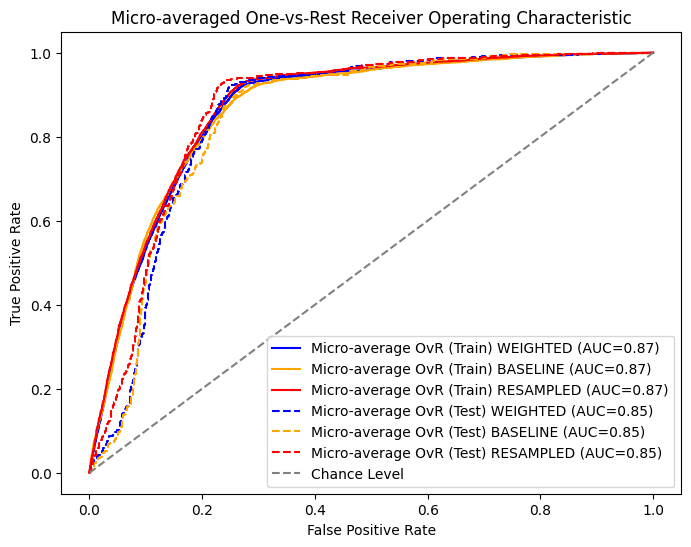

In [ ]:
# Calculate ROC curve for clf_train_predictions_weighted
fpr_train_weighted_clf, tpr_train_weighted_clf, _ = roc_curve(y_onehot_train.ravel(), clf_train_predictions_weighted.ravel())
roc_auc_train_weighted_clf = auc(fpr_train_weighted_clf, tpr_train_weighted_clf)

# Calculate ROC curve for clf_train_predictions_baseline
fpr_train_baseline_clf, tpr_train_baseline_clf, _ = roc_curve(y_onehot_train.ravel(), clf_train_predictions_baseline.ravel())
roc_auc_train_baseline_clf = auc(fpr_train_baseline_clf, tpr_train_baseline_clf)

# Calculate ROC curve for clf_train_predictions_resampled
fpr_train_resampled_clf, tpr_train_resampled_clf, _ = roc_curve(y_onehot_train.ravel(), clf_train_predictions_resampled.ravel())
roc_auc_train_resampled_clf = auc(fpr_train_resampled_clf, tpr_train_resampled_clf)

# Calculate ROC curve for clf_test_predictions_weighted
fpr_test_weighted_clf, tpr_test_weighted_clf, _ = roc_curve(y_onehot_test.ravel(), clf_test_predictions_weighted.ravel())
roc_auc_test_weighted_clf = auc(fpr_test_weighted_clf, tpr_test_weighted_clf)

# Calculate ROC curve for clf_test_predictions_baseline
fpr_test_baseline_clf, tpr_test_baseline_clf, _ = roc_curve(y_onehot_test.ravel(), clf_test_predictions_baseline.ravel())
roc_auc_test_baseline_clf = auc(fpr_test_baseline_clf, tpr_test_baseline_clf)

# Calculate ROC curve for clf_test_predictions_resampled
fpr_test_resampled_clf, tpr_test_resampled_clf, _ = roc_curve(y_onehot_test.ravel(), clf_test_predictions_resampled.ravel())
roc_auc_test_resampled_clf = auc(fpr_test_resampled_clf, tpr_test_resampled_clf)

# Plot all ROC curves
plt.figure(figsize=(8, 6))

# Plot the micro-average ROC curve for clf_train_predictions_weighted
plt.plot(fpr_train_weighted_clf, tpr_train_weighted_clf, color="blue", linestyle="-", label=f"Micro-average OvR (Train) WEIGHTED (AUC={roc_auc_train_weighted_clf:.2f})")

# Plot the micro-average ROC curve for clf_train_predictions_baseline
plt.plot(fpr_train_baseline_clf, tpr_train_baseline_clf, color="orange", linestyle="-", label=f"Micro-average OvR (Train) BASELINE (AUC={roc_auc_train_baseline_clf:.2f})")

# Plot the micro-average ROC curve for clf_train_predictions_resampled
plt.plot(fpr_train_resampled_clf, tpr_train_resampled_clf, color="red", linestyle="-", label=f"Micro-average OvR (Train) RESAMPLED (AUC={roc_auc_train_baseline_clf:.2f})")

# Plot the micro-average ROC curve for clf_test_predictions_weighted
plt.plot(fpr_test_weighted_clf, tpr_test_weighted_clf, color="blue", linestyle="--", label=f"Micro-average OvR (Test) WEIGHTED (AUC={roc_auc_test_weighted_clf:.2f})")

# Plot the micro-average ROC curve for clf_test_predictions_baseline
plt.plot(fpr_test_baseline_clf, tpr_test_baseline_clf, color="orange", linestyle="--", label=f"Micro-average OvR (Test) BASELINE (AUC={roc_auc_test_baseline_clf:.2f})")

# Plot the micro-average ROC curve for clf_test_predictions_resampled
plt.plot(fpr_test_resampled_clf, tpr_test_resampled_clf, color="red", linestyle="--", label=f"Micro-average OvR (Test) RESAMPLED (AUC={roc_auc_test_baseline_clf:.2f})")

# Plot the chance level (diagonal line)
plt.plot([0, 1], [0, 1], color='gray', linestyle="--", label='Chance Level')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest Receiver Operating Characteristic")
plt.legend()
plt.show()


### **Manually improving Baseline Model**

In [ ]:
# Define the input shape and number of classes
input_shape = (num_features,)
num_classes = 5

# Create the improved classification model with more layers
improved_model_clf = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax', bias_initializer=tf.keras.initializers.Constant(clf_initial_bias)),
])

# Compile the model
improved_model_clf.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=Clf_metrics
)

# Train the model
improved_model_clf_history = improved_model_clf.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(val_features_class, clf_val_labels_onehot)
)


Epoch 1/100
9/9 [==============================] - 3s 105ms/step - loss: 1.7207 - True Positives: 266.0000 - False Positives: 585.0000 - True Negatives: 17615.0000 - False Negatives: 4284.0000 - Accuracy: 0.2835 - Precision: 0.3126 - Recall: 0.0585 - AUC: 0.6183 - prc: 0.2717 - F1 Score: 0.1590 - val_loss: 1.3207 - val_True Positives: 5.0000 - val_False Positives: 7.0000 - val_True Negatives: 1793.0000 - val_False Negatives: 445.0000 - val_Accuracy: 0.4889 - val_Precision: 0.4167 - val_Recall: 0.0111 - val_AUC: 0.8154 - val_prc: 0.4569 - val_F1 Score: 0.1766
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 1.4078 - True Positives: 549.0000 - False Positives: 583.0000 - True Negatives: 15617.0000 - False Negatives: 3501.0000 - Accuracy: 0.4035 - Precision: 0.4850 - Recall: 0.1356 - AUC: 0.7359 - prc: 0.3868 - F1 Score: 0.1931 - val_loss: 1.1516 - val_True Positives: 30.0000 - val_False Positives: 30.0000 - val_True Negatives: 1770.0000 - val_False Negatives: 420.0

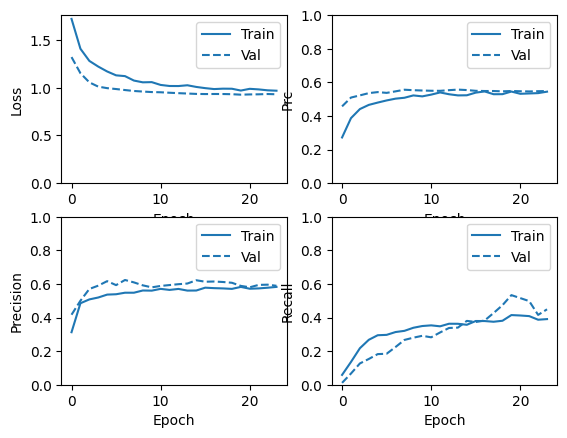

In [ ]:
plot_metrics_clf(improved_model_clf_history)

In [ ]:
clf_train_predictions_improved = improved_model_clf.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_improved = improved_model_clf.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 44ms/step


loss :  0.98325115442276
True Positives :  99.0
False Positives :  178.0
True Negatives :  1822.0
False Negatives :  401.0
Accuracy :  0.5839999914169312
Precision :  0.35740071535110474
Recall :  0.1979999989271164
AUC :  0.8307409882545471
prc :  0.4222272038459778
F1 Score :  [0.7373737 0.        0.        0.        0.       ]



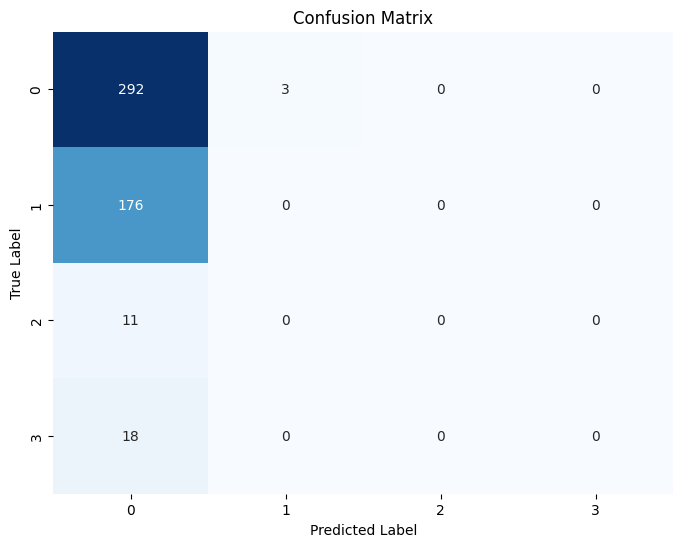

In [ ]:
improved_results_clf = improved_model_clf.evaluate(test_features_class, clf_test_labels_onehot,
                                             batch_size=clf_batch_size, verbose=0)
for name, value in zip(improved_model_clf.metrics_names, improved_results_clf):
  print(name, ': ', value)
print()
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_improved)

In [ ]:
#Create new model, changing activation to LeakyRelu
improved_model_clf2 = Sequential([
    keras.layers.Dense(64, activation=LeakyReLU(alpha=0.2), input_shape=input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation=LeakyReLU(alpha=0.2)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation=LeakyReLU(alpha=0.2)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax', bias_initializer=tf.keras.initializers.Constant(clf_initial_bias)),
])

# Compile the model
improved_model_clf2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=Clf_metrics
)

# Train the model
improved_model_clf_history2 = improved_model_clf2.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(val_features_class, clf_val_labels_onehot)
)

Epoch 1/100
9/9 [==============================] - 3s 106ms/step - loss: 2.0241 - True Positives: 338.0000 - False Positives: 1093.0000 - True Negatives: 17107.0000 - False Negatives: 4212.0000 - Accuracy: 0.2699 - Precision: 0.2362 - Recall: 0.0743 - AUC: 0.5840 - prc: 0.2430 - F1 Score: 0.1542 - val_loss: 1.2964 - val_True Positives: 9.0000 - val_False Positives: 5.0000 - val_True Negatives: 1795.0000 - val_False Negatives: 441.0000 - val_Accuracy: 0.4822 - val_Precision: 0.6429 - val_Recall: 0.0200 - val_AUC: 0.8055 - val_prc: 0.4622 - val_F1 Score: 0.1897
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 1.4875 - True Positives: 464.0000 - False Positives: 643.0000 - True Negatives: 15557.0000 - False Negatives: 3586.0000 - Accuracy: 0.3728 - Precision: 0.4192 - Recall: 0.1146 - AUC: 0.7088 - prc: 0.3453 - F1 Score: 0.1859 - val_loss: 1.1250 - val_True Positives: 80.0000 - val_False Positives: 51.0000 - val_True Negatives: 1749.0000 - val_False Negatives: 370.

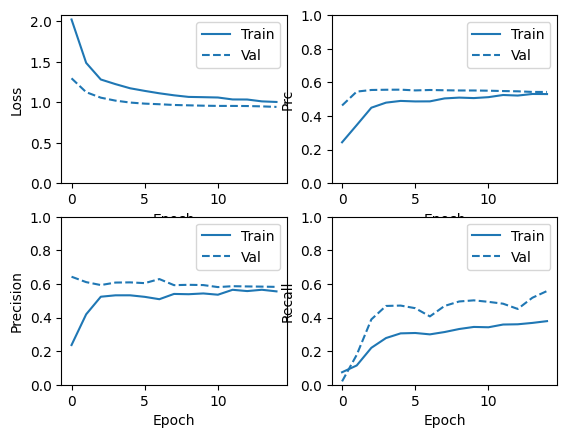

In [ ]:
#Activation=LeakyReLU
plot_metrics_clf(improved_model_clf_history2)

In [ ]:
#Activation=LeakyReLU
clf_train_predictions_improved2 = improved_model_clf2.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_improved2 = improved_model_clf2.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 20ms/step


loss :  1.018958330154419
True Positives :  198.0
False Positives :  169.0
True Negatives :  1831.0
False Negatives :  302.0
Accuracy :  0.5920000076293945
Precision :  0.5395095348358154
Recall :  0.3959999978542328
AUC :  0.836838960647583
prc :  0.4402371346950531
F1 Score :  [0.74307305 0.01129944 0.         0.         0.        ]



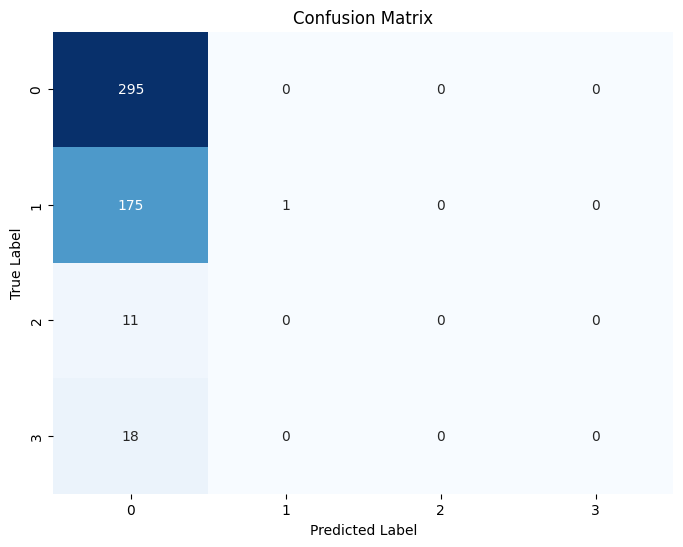

In [ ]:
#Activation=LeakyReLU
improved_results_clf2 = improved_model_clf2.evaluate(test_features_class, clf_test_labels_onehot,
                                             batch_size=clf_batch_size, verbose=0)
for name, value in zip(improved_model_clf2.metrics_names, improved_results_clf2):
  print(name, ': ', value)
print()
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_improved2)

In [ ]:
# Define the model, changing activation function to Sigmoid
improved_model_clf3 = Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_shape=input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax', bias_initializer=tf.keras.initializers.Constant(clf_initial_bias)),
])

# Compile the model
improved_model_clf3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=Clf_metrics
)

# Train the model
improved_model_clf_history3 = improved_model_clf3.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(val_features_class, clf_val_labels_onehot)
)


Epoch 1/100
9/9 [==============================] - 3s 151ms/step - loss: 2.2584 - True Positives: 237.0000 - False Positives: 2036.0000 - True Negatives: 16164.0000 - False Negatives: 4313.0000 - Accuracy: 0.0809 - Precision: 0.1043 - Recall: 0.0521 - AUC: 0.3755 - prc: 0.1506 - F1 Score: 0.0448 - val_loss: 2.0494 - val_True Positives: 0.0000e+00 - val_False Positives: 0.0000e+00 - val_True Negatives: 1800.0000 - val_False Negatives: 450.0000 - val_Accuracy: 0.0178 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.3869 - val_prc: 0.1541 - val_F1 Score: 0.0070
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 2.0000 - True Positives: 20.0000 - False Positives: 890.0000 - True Negatives: 15310.0000 - False Negatives: 4030.0000 - Accuracy: 0.0210 - Precision: 0.0220 - Recall: 0.0049 - AUC: 0.3628 - prc: 0.1462 - F1 Score: 0.0196 - val_loss: 1.8230 - val_True Positives: 0.0000e+00 - val_False Positives: 0.0000e+00 - val_True Negatives: 1800.0000 - val_

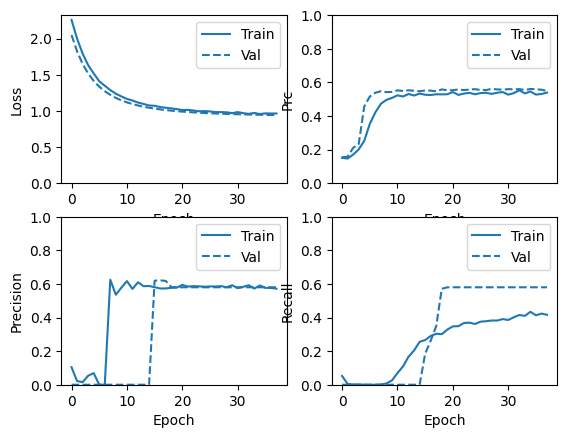

In [ ]:
#Activation=Sigmoid
plot_metrics_clf(improved_model_clf_history3)

In [ ]:
#Activation=Sigmoid
clf_train_predictions_improved3 = improved_model_clf3.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_improved3 = improved_model_clf3.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 19ms/step


loss :  0.9429101347923279
True Positives :  295.0
False Positives :  205.0
True Negatives :  1795.0
False Negatives :  205.0
Accuracy :  0.5899999737739563
Precision :  0.5899999737739563
Recall :  0.5899999737739563
AUC :  0.8151230216026306
prc :  0.3928239941596985
F1 Score :  [0.7421384 0.        0.        0.        0.       ]



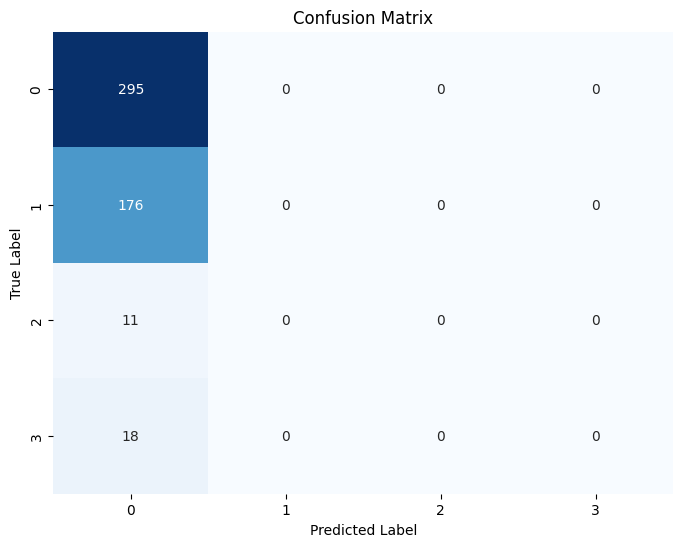

In [ ]:
#Activation=Sigmoid
improved_results_clf3 = improved_model_clf3.evaluate(test_features_class, clf_test_labels_onehot,
                                             batch_size=clf_batch_size, verbose=0)
for name, value in zip(improved_model_clf3.metrics_names, improved_results_clf3):
  print(name, ': ', value)
print()
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_improved3)

In [ ]:
#Sigmoid activation scores minor improvements on AUC and loss

In [ ]:
# Define the model, changing optimiser to another popular option = RMSprop
improved_model_clf4 = Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_shape=input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax', bias_initializer=tf.keras.initializers.Constant(clf_initial_bias)),
])

# Compile the model
improved_model_clf4.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=Clf_metrics
)
# Train the model
improved_model_clf_history4 = improved_model_clf4.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(val_features_class, clf_val_labels_onehot)
)

Epoch 1/100
9/9 [==============================] - 2s 100ms/step - loss: 1.5289 - True Positives: 296.0000 - False Positives: 215.0000 - True Negatives: 17985.0000 - False Negatives: 4254.0000 - Accuracy: 0.3077 - Precision: 0.5793 - Recall: 0.0651 - AUC: 0.6846 - prc: 0.3133 - F1 Score: 0.1546 - val_loss: 1.3332 - val_True Positives: 0.0000e+00 - val_False Positives: 0.0000e+00 - val_True Negatives: 1800.0000 - val_False Negatives: 450.0000 - val_Accuracy: 0.5800 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.8561 - val_prc: 0.5218 - val_F1 Score: 0.1468
Epoch 2/100
9/9 [==============================] - 0s 21ms/step - loss: 1.3382 - True Positives: 38.0000 - False Positives: 58.0000 - True Negatives: 16142.0000 - False Negatives: 4012.0000 - Accuracy: 0.4454 - Precision: 0.3958 - Recall: 0.0094 - AUC: 0.7820 - prc: 0.4154 - F1 Score: 0.1900 - val_loss: 1.2056 - val_True Positives: 0.0000e+00 - val_False Positives: 0.0000e+00 - val_True Negatives: 1800.0000 - val_Fa

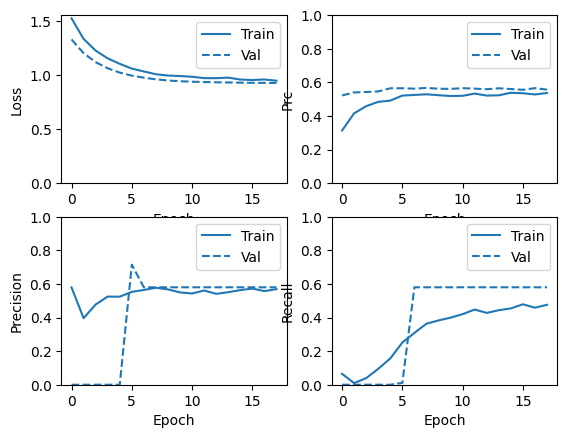

In [ ]:
#Optimiser=RMSprop
plot_metrics_clf(improved_model_clf_history4)

In [ ]:
#Optimiser=RMSprop
clf_train_predictions_improved4 = improved_model_clf4.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_improved4 = improved_model_clf4.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 29ms/step


loss :  0.9567528367042542
True Positives :  295.0
False Positives :  205.0
True Negatives :  1795.0
False Negatives :  205.0
Accuracy :  0.5899999737739563
Precision :  0.5899999737739563
Recall :  0.5899999737739563
AUC :  0.8159749507904053
prc :  0.39666733145713806
F1 Score :  [0.7421384 0.        0.        0.        0.       ]



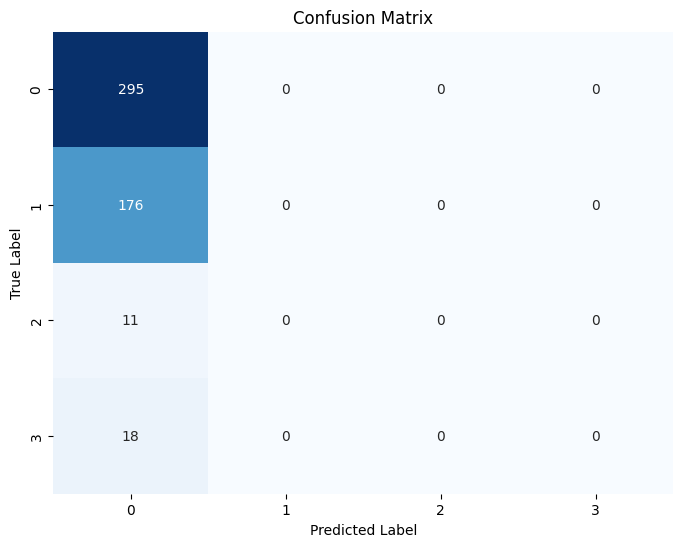

In [ ]:
#Optimiser=RMSprop
improved_results_clf4 = improved_model_clf4.evaluate(test_features_class, clf_test_labels_onehot,
                                             batch_size=clf_batch_size, verbose=0)
for name, value in zip(improved_model_clf4.metrics_names, improved_results_clf4):
  print(name, ': ', value)
print()
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_improved4)

In [ ]:
# Define a new model with an extra dense and dropout layer
improved_model_clf5 = Sequential([
    keras.layers.Dense(128, activation='sigmoid', input_shape=input_shape),  # Add a Dense layer with 128 units and ReLU activation
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='sigmoid'),  # Add another Dense layer with 64 units and ReLU activation
    keras.layers.Dropout(0.4),  # Adjust dropout rate
    keras.layers.Dense(32, activation='sigmoid'),  # Add another Dense layer with 32 units and ReLU activation
    keras.layers.Dropout(0.3),  # Adjust dropout rate
    keras.layers.Dense(16, activation='sigmoid'),  # Add another Dense layer with 16 units and ReLU activation
    keras.layers.Dropout(0.2),  # Adjust dropout rate
    keras.layers.Dense(num_classes, activation='softmax', bias_initializer=tf.keras.initializers.Constant(clf_initial_bias)),
])

# Compile the model
improved_model_clf5.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=Clf_metrics  # assuming Clf_metrics is defined elsewhere
)

# Train the model
improved_model_clf_history5 = improved_model_clf4.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(val_features_class, clf_val_labels_onehot)
)

Epoch 1/100
9/9 [==============================] - 0s 36ms/step - loss: 1.0010 - True Positives: 1599.0000 - False Positives: 1256.0000 - True Negatives: 14944.0000 - False Negatives: 2451.0000 - Accuracy: 0.5370 - Precision: 0.5601 - Recall: 0.3948 - AUC: 0.8579 - prc: 0.5190 - F1 Score: 0.1852 - val_loss: 0.9476 - val_True Positives: 261.0000 - val_False Positives: 189.0000 - val_True Negatives: 1611.0000 - val_False Negatives: 189.0000 - val_Accuracy: 0.5800 - val_Precision: 0.5800 - val_Recall: 0.5800 - val_AUC: 0.8730 - val_prc: 0.5672 - val_F1 Score: 0.1468
Epoch 2/100
9/9 [==============================] - 0s 24ms/step - loss: 0.9781 - True Positives: 1720.0000 - False Positives: 1317.0000 - True Negatives: 14883.0000 - False Negatives: 2330.0000 - Accuracy: 0.5474 - Precision: 0.5663 - Recall: 0.4247 - AUC: 0.8629 - prc: 0.5367 - F1 Score: 0.1860 - val_loss: 0.9417 - val_True Positives: 261.0000 - val_False Positives: 189.0000 - val_True Negatives: 1611.0000 - val_False Negativ

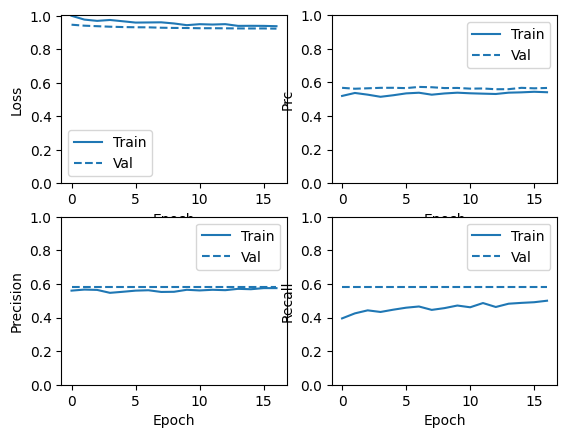

In [ ]:
#1 dense and 1 dropout layer added
plot_metrics_clf(improved_model_clf_history5)

In [ ]:
#1 dense and 1 dropout layer added
clf_train_predictions_improved5 = improved_model_clf5.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_improved5 = improved_model_clf5.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 24ms/step


loss :  1.8980727195739746
True Positives :  261.0
False Positives :  189.0
True Negatives :  3611.0
False Negatives :  689.0
Accuracy :  0.27473685145378113
Precision :  0.5799999833106995
Recall :  0.27473685145378113
AUC :  0.7128612399101257
prc :  0.3835638165473938
F1 Score :  [0.5188867 0.        0.        0.        0.       ]



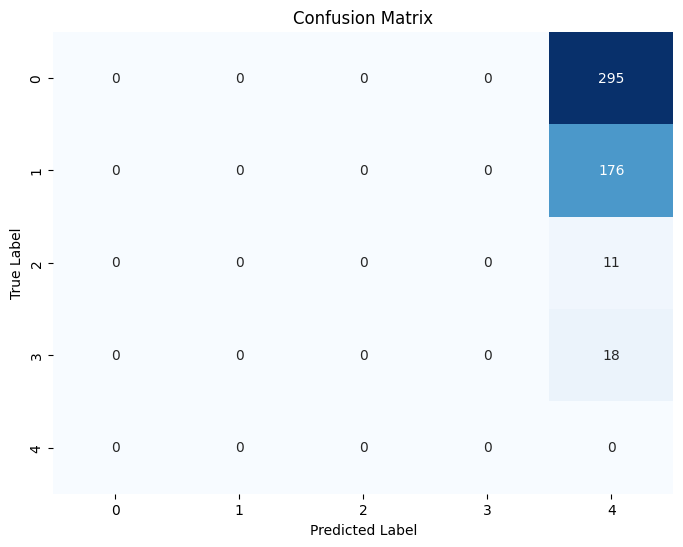

In [ ]:
#1 dense and 1 dropout layer added
improved_results_clf5 = improved_model_clf5.evaluate(test_features_class, clf_test_labels_onehot,
                                             batch_size=clf_batch_size, verbose=0)
for name, value in zip(improved_model_clf5.metrics_names, improved_results_clf5):
  print(name, ': ', value)
print()
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_improved5)

In [ ]:
# Define the model, adding 2 dense and 2 dropout layers
improved_model_clf6 = Sequential([
    keras.layers.Dense(128, activation='sigmoid', input_shape=input_shape),  # Add a Dense layer with 128 units and ReLU activation
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='sigmoid'),  # Add another Dense layer with 64 units and ReLU activation
    keras.layers.Dropout(0.4),  # Adjust dropout rate
    keras.layers.Dense(32, activation='sigmoid'),  # Add another Dense layer with 32 units and ReLU activation
    keras.layers.Dropout(0.3),  # Adjust dropout rate
    keras.layers.Dense(16, activation='sigmoid'),  # Add another Dense layer with 16 units and ReLU activation
    keras.layers.Dropout(0.2),  # Adjust dropout rate
    keras.layers.Dense(8, activation='sigmoid'),  # Add another Dense layer with 8 units and ReLU activation
    keras.layers.Dropout(0.1),  # Adjust dropout rate
    keras.layers.Dense(num_classes, activation='softmax', bias_initializer=tf.keras.initializers.Constant(clf_initial_bias)),
])

# Compile the model
improved_model_clf6.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=Clf_metrics  # assuming Clf_metrics is defined elsewhere
)

# Train the model
improved_model_clf_history6 = improved_model_clf4.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=100,
    callbacks=[early_stopping],
    validation_data=(val_features_class, clf_val_labels_onehot)
)

Epoch 1/100
9/9 [==============================] - 0s 27ms/step - loss: 0.9586 - True Positives: 1850.0000 - False Positives: 1477.0000 - True Negatives: 14723.0000 - False Negatives: 2200.0000 - Accuracy: 0.5454 - Precision: 0.5561 - Recall: 0.4568 - AUC: 0.8633 - prc: 0.5265 - F1 Score: 0.1834 - val_loss: 0.9290 - val_True Positives: 261.0000 - val_False Positives: 189.0000 - val_True Negatives: 1611.0000 - val_False Negatives: 189.0000 - val_Accuracy: 0.5800 - val_Precision: 0.5800 - val_Recall: 0.5800 - val_AUC: 0.8742 - val_prc: 0.5672 - val_F1 Score: 0.1468
Epoch 2/100
9/9 [==============================] - 0s 13ms/step - loss: 0.9519 - True Positives: 1899.0000 - False Positives: 1465.0000 - True Negatives: 14735.0000 - False Negatives: 2151.0000 - Accuracy: 0.5541 - Precision: 0.5645 - Recall: 0.4689 - AUC: 0.8657 - prc: 0.5377 - F1 Score: 0.1790 - val_loss: 0.9286 - val_True Positives: 261.0000 - val_False Positives: 189.0000 - val_True Negatives: 1611.0000 - val_False Negativ

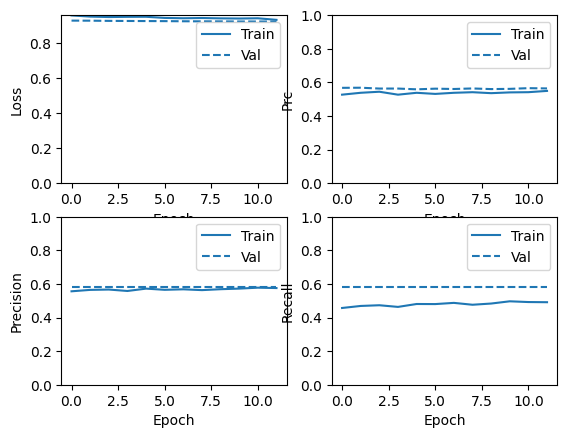

In [ ]:
#2 dense and 2 dropout layers added
plot_metrics_clf(improved_model_clf_history6)

In [ ]:
#2 dense and 2 dropout layers added
clf_train_predictions_improved6 = improved_model_clf6.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_improved6 = improved_model_clf6.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 19ms/step


loss :  2.16801381111145
True Positives :  261.0
False Positives :  189.0
True Negatives :  3611.0
False Negatives :  689.0
Accuracy :  0.2936842143535614
Precision :  0.5799999833106995
Recall :  0.27473685145378113
AUC :  0.6520900726318359
prc :  0.3598894476890564
F1 Score :  [0.5188867  0.         0.         0.06679035 0.        ]



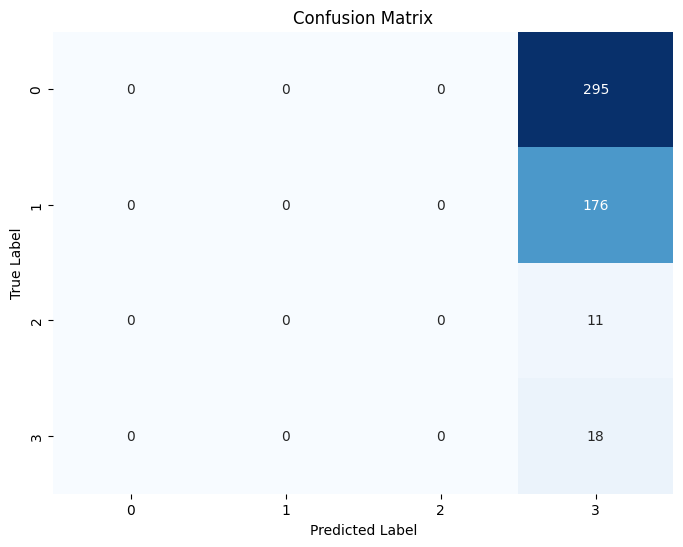

In [ ]:
#2 dense and 2 dropout layers added
improved_results_clf6 = improved_model_clf6.evaluate(test_features_class, clf_test_labels_onehot,
                                             batch_size=clf_batch_size, verbose=0)
for name, value in zip(improved_model_clf6.metrics_names, improved_results_clf6):
  print(name, ': ', value)
print()
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_improved6)

In [ ]:
# Define the model, keeping activation function to Sigmoid
improved_model_clf7 = Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_shape=input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax', bias_initializer=tf.keras.initializers.Constant(clf_initial_bias)),
])

# Compile the model
improved_model_clf7.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=Clf_metrics
)

# Train the model with only 50 epochs
improved_model_clf_history7 = improved_model_clf7.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=50,
    callbacks=[early_stopping],
    validation_data=(val_features_class, clf_val_labels_onehot)
)

Epoch 1/50
9/9 [==============================] - 4s 161ms/step - loss: 1.6166 - True Positives: 261.0000 - False Positives: 189.0000 - True Negatives: 19811.0000 - False Negatives: 4739.0000 - Accuracy: 0.2294 - Precision: 0.5800 - Recall: 0.0522 - AUC: 0.5496 - prc: 0.2444 - F1 Score: 0.1320 - val_loss: 1.4798 - val_True Positives: 0.0000e+00 - val_False Positives: 0.0000e+00 - val_True Negatives: 1800.0000 - val_False Negatives: 450.0000 - val_Accuracy: 0.3511 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.5571 - val_prc: 0.2712 - val_F1 Score: 0.1039
Epoch 2/50
9/9 [==============================] - 0s 27ms/step - loss: 1.4685 - True Positives: 0.0000e+00 - False Positives: 3.0000 - True Negatives: 16197.0000 - False Negatives: 4050.0000 - Accuracy: 0.2931 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.6774 - prc: 0.2899 - F1 Score: 0.1285 - val_loss: 1.3479 - val_True Positives: 0.0000e+00 - val_False Positives: 0.0000e+00 - val_True Negatives: 1800.0000 

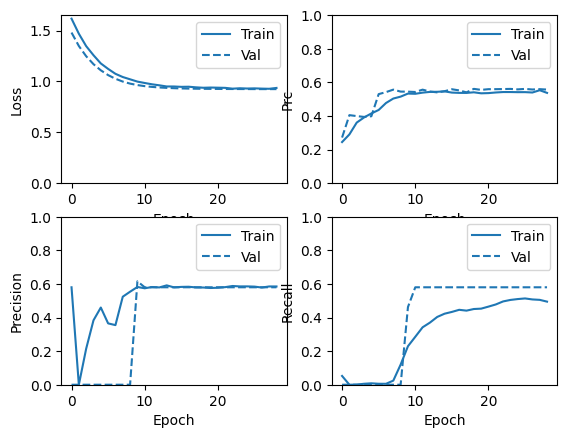

In [ ]:
#Epochs=50
plot_metrics_clf(improved_model_clf_history7)

In [ ]:
#Epochs=50
clf_train_predictions_improved7 = improved_model_clf7.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_improved7 = improved_model_clf7.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 19ms/step


loss :  0.9001376628875732
True Positives :  295.0
False Positives :  205.0
True Negatives :  1795.0
False Negatives :  205.0
Accuracy :  0.5899999737739563
Precision :  0.5899999737739563
Recall :  0.5899999737739563
AUC :  0.8329229950904846
prc :  0.40959635376930237
F1 Score :  [0.7421384 0.        0.        0.        0.       ]



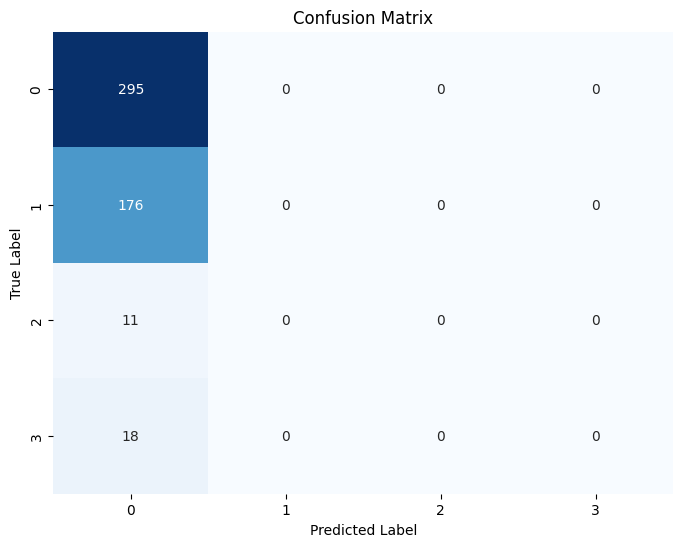

In [ ]:
#Epochs=50
improved_results_clf7 = improved_model_clf7.evaluate(test_features_class, clf_test_labels_onehot,
                                             batch_size=clf_batch_size, verbose=0)
for name, value in zip(improved_model_clf7.metrics_names, improved_results_clf7):
  print(name, ': ', value)
print()
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_improved7)

In [ ]:
# Define the model, keeping activation function to Sigmoid
improved_model_clf8 = Sequential([
    keras.layers.Dense(64, activation='sigmoid', input_shape=input_shape),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='sigmoid'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax', bias_initializer=tf.keras.initializers.Constant(clf_initial_bias)),
])

# Compile the model
improved_model_clf8.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=Clf_metrics
)

# Train the model with 150 epochs
improved_model_clf_history8 = improved_model_clf8.fit(
    train_features_class,
    clf_train_labels_onehot,
    batch_size=clf_batch_size,
    epochs=150,
    callbacks=[early_stopping],
    validation_data=(val_features_class, clf_val_labels_onehot)
)

Epoch 1/150
9/9 [==============================] - 4s 128ms/step - loss: 1.8098 - True Positives: 295.0000 - False Positives: 221.0000 - True Negatives: 17979.0000 - False Negatives: 4255.0000 - Accuracy: 0.1426 - Precision: 0.5717 - Recall: 0.0648 - AUC: 0.4734 - prc: 0.2023 - F1 Score: 0.0900 - val_loss: 1.6481 - val_True Positives: 0.0000e+00 - val_False Positives: 0.0000e+00 - val_True Negatives: 1800.0000 - val_False Negatives: 450.0000 - val_Accuracy: 0.0044 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_AUC: 0.4581 - val_prc: 0.1813 - val_F1 Score: 0.0018
Epoch 2/150
9/9 [==============================] - 0s 14ms/step - loss: 1.6099 - True Positives: 0.0000e+00 - False Positives: 3.0000 - True Negatives: 16197.0000 - False Negatives: 4050.0000 - Accuracy: 0.2605 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - AUC: 0.5649 - prc: 0.2353 - F1 Score: 0.1492 - val_loss: 1.4680 - val_True Positives: 0.0000e+00 - val_False Positives: 0.0000e+00 - val_True Negatives: 1800.000

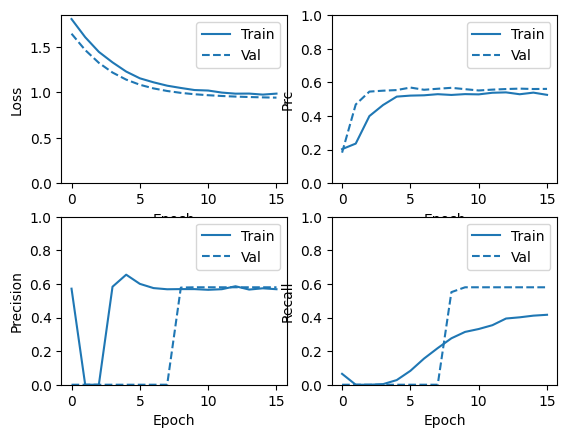

In [ ]:
#Epochs=150
plot_metrics_clf(improved_model_clf_history8)

In [ ]:
#Epochs=150
clf_train_predictions_improved8 = improved_model_clf8.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_improved8 = improved_model_clf8.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 20ms/step


loss :  1.0815346240997314
True Positives :  0.0
False Positives :  0.0
True Negatives :  2000.0
False Negatives :  500.0
Accuracy :  0.5899999737739563
Precision :  0.0
Recall :  0.0
AUC :  0.8274550437927246
prc :  0.4032699465751648
F1 Score :  [0.7421384 0.        0.        0.        0.       ]



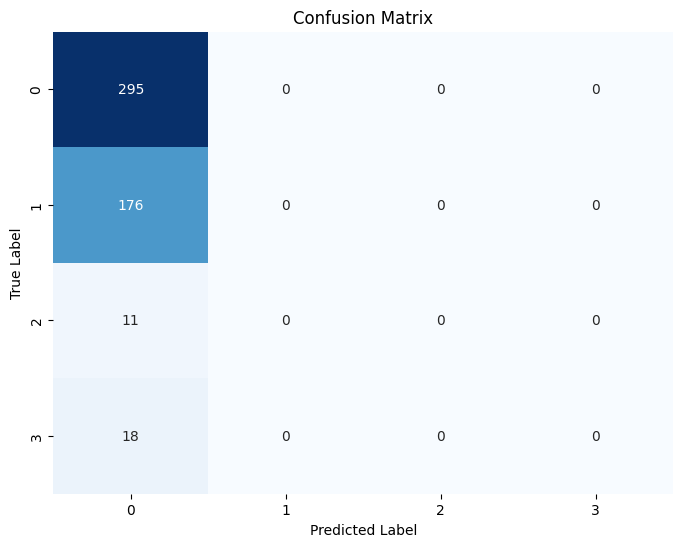

In [ ]:
#Epochs=150
improved_results_clf8 = improved_model_clf8.evaluate(test_features_class, clf_test_labels_onehot,
                                             batch_size=clf_batch_size, verbose=0)
for name, value in zip(improved_model_clf8.metrics_names, improved_results_clf8):
  print(name, ': ', value)
print()
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_improved8)

In [ ]:
#Adding more layers and decreasing/increasing epochs means the model scores worse in some evaluation metrics.
#Model 3 with 7 layers,sigmoid activation function,carefully initalised output bias and 100 epochs scores the best across the metrics

### **Improving model using Grid Search**

In [ ]:
#Create a HyperModel, define the min and max values for dense and dropout layers so the tuner can search on these requirements
#Compile the model using a choice of optimisers and activation functions
class MyHyperModelClf1(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes

    def build(self, hp):
        model = keras.Sequential()
        model.add(keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=128, step=16),
                                      activation=hp.Choice('activation', ['relu', 'leaky_relu', 'sigmoid']),
                                      input_shape=self.input_shape))
        model.add(keras.layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(keras.layers.Dense(self.num_classes, activation='softmax', bias_initializer=tf.keras.initializers.Constant(clf_initial_bias)))

        optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
        model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        return model



In [ ]:
# Define the objective as finding best accuracy
objective_clf = Objective(name='val_accuracy', direction='max')

# Create the tuner using this objective with 100 trials and search
tuner_clf = RandomSearch(
    hypermodel=MyHyperModelClf1(input_shape, num_classes),
    objective=objective_clf,
    max_trials=100,
    directory='tuning_results',
    project_name='improved_classification2'
)

tuner_clf.search(train_features_class, clf_train_labels_onehot, validation_data=(val_features_class, clf_val_labels_onehot))


Reloading Tuner from tuning_results/improved_classification2/tuner0.json


In [ ]:
# Get the best hyperparameters
best_hp_clf = tuner_clf.get_best_hyperparameters()[0]
print("Best Hyperparameters:")
print(best_hp_clf.values)

# Get the best model
best_model_clf = tuner_clf.get_best_models()[0]
print("Best Model Summary:")
print(best_model_clf.summary())


Best Hyperparameters:
{'units': 112, 'activation': 'sigmoid', 'dropout': 0.30000000000000004, 'optimizer': 'sgd'}
Best Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 112)               15792     
                                                                 
 dropout (Dropout)           (None, 112)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 565       
                                                                 
Total params: 16357 (63.89 KB)
Trainable params: 16357 (63.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Load, compile and train the best model
best_model_clf = tuner_clf.get_best_models(num_models=1)[0]

# Compile the model with built-in metrics
best_model_clf.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy',
                                                                                   Precision(),
                                                                                   Recall(),
                                                                                   F1Score(),
                                                                                   TruePositives(name='True Positives'),
                                                                                   FalsePositives(name='False Positives'),
                                                                                   TrueNegatives(name='True Negatives'),
                                                                                   FalseNegatives(name='False Negatives')])

# Train the best model
best_model_clf_history = best_model_clf.fit(train_features_class, clf_train_labels_onehot,
                         epochs=100,
                         validation_data=(val_features_class, clf_val_labels_onehot))


Epoch 1/100
127/127 [==============================] - 3s 12ms/step - loss: 0.9759 - accuracy: 0.5286 - precision: 0.5388 - recall: 0.4612 - f1_score: 0.1827 - True Positives: 1868.0000 - False Positives: 1599.0000 - True Negatives: 14601.0000 - False Negatives: 2182.0000 - val_loss: 0.9357 - val_accuracy: 0.5822 - val_precision: 0.5782 - val_recall: 0.5667 - val_f1_score: 0.1496 - val_True Positives: 255.0000 - val_False Positives: 186.0000 - val_True Negatives: 1614.0000 - val_False Negatives: 195.0000
Epoch 2/100
127/127 [==============================] - 1s 4ms/step - loss: 0.9691 - accuracy: 0.5402 - precision: 0.5477 - recall: 0.4738 - f1_score: 0.1866 - True Positives: 1919.0000 - False Positives: 1585.0000 - True Negatives: 14615.0000 - False Negatives: 2131.0000 - val_loss: 0.9332 - val_accuracy: 0.5822 - val_precision: 0.5813 - val_recall: 0.5800 - val_f1_score: 0.1496 - val_True Positives: 261.0000 - val_False Positives: 188.0000 - val_True Negatives: 1612.0000 - val_False N

In [ ]:
#Get predictions from optimal model using GridSearch
clf_train_predictions_improved11 = best_model_clf.predict(train_features_class, batch_size=clf_batch_size)
clf_test_predictions_improved11 = best_model_clf.predict(test_features_class, batch_size=clf_batch_size)

1/1 [==============================] - 0s 22ms/step


loss :  0.9311386346817017
accuracy :  0.5899999737739563
precision :  0.5875251293182373
recall :  0.5839999914169312
f1_score :  [0.7421384 0.        0.        0.        0.       ]
True Positives :  292.0
False Positives :  205.0
True Negatives :  1795.0
False Negatives :  208.0



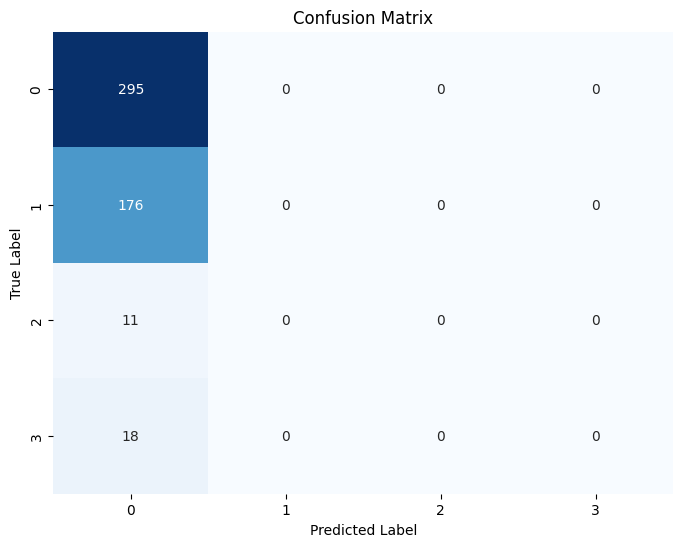

In [ ]:
#Display Loss/Accuracy initally and confusion matrix for optimal model using GridSearch
improved_results_clf11 = best_model_clf.evaluate(test_features_class, clf_test_labels_onehot,
                                             batch_size=clf_batch_size, verbose=0)
for name, value in zip(best_model_clf.metrics_names, improved_results_clf11):
  print(name, ': ', value)
print()
plot_cm_clf(clf_test_labels_onehot, clf_test_predictions_improved11)

In [ ]:
# Evaluate the model on the test dataset
test_loss_clf, test_accuracy_clf, test_precision_clf, test_recall_clf, test_f1_score_clf, tp_clf, fp_clf, tn_clf, fn_clf = best_model_clf.evaluate(test_features_class, clf_test_labels_onehot)

print("Test Loss:", test_loss_clf)
print("Test Accuracy:", test_accuracy_clf)
print("Test Precision:", test_precision_clf)
print("Test Recall:", test_recall_clf)
print("Test F1 Score:", test_f1_score_clf)

# Print True Positives, False Positives, True Negatives, False Negatives
print("True Positives:", tp_clf)
print("False Positives:", fp_clf)
print("True Negatives:", tn_clf)
print("False Negatives:", fn_clf)


16/16 [==============================] - 0s 3ms/step - loss: 0.9311 - accuracy: 0.5900 - precision: 0.5875 - recall: 0.5840 - f1_score: 0.1484 - True Positives: 292.0000 - False Positives: 205.0000 - True Negatives: 1795.0000 - False Negatives: 208.0000
Test Loss: 0.9311386346817017
Test Accuracy: 0.5899999737739563
Test Precision: 0.5875251293182373
Test Recall: 0.5839999914169312
Test F1 Score: [0.7421384 0.        0.        0.        0.       ]
True Positives: 292.0
False Positives: 205.0
True Negatives: 1795.0
False Negatives: 208.0


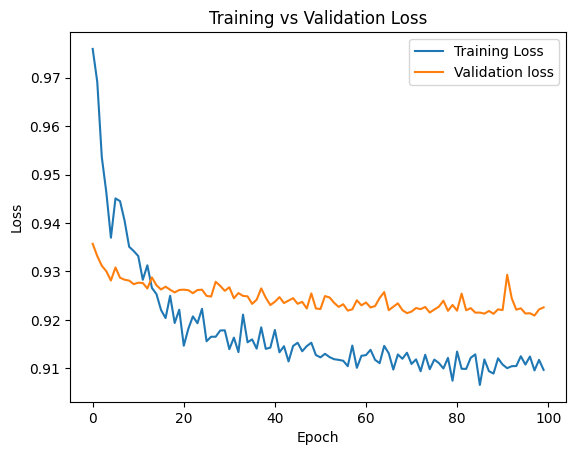

In [ ]:
# Plot training & validation loss values for best model
plt.plot(best_model_clf_history.history['loss'])
plt.plot(best_model_clf_history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation loss'], loc='upper right')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


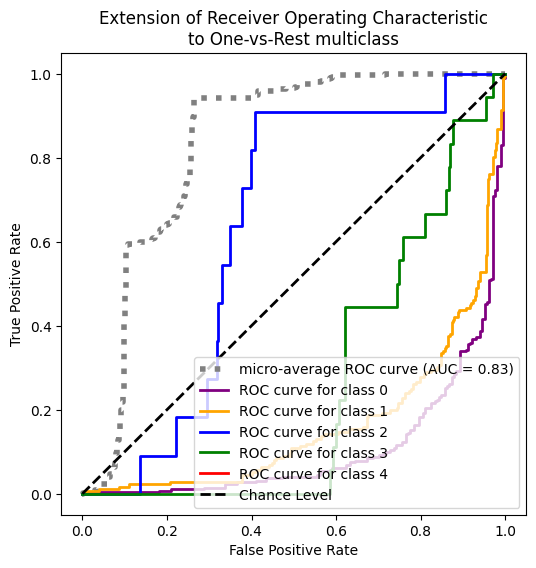

In [ ]:
#Set figure size for ROC curve

fig, ax = plt.subplots(figsize=(6, 6))

# Compute micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_onehot_test.ravel(), clf_test_predictions_improved11.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot micro-average ROC curve
plt.plot(
    fpr_micro,
    tpr_micro,
    label=f"micro-average ROC curve (AUC = {roc_auc_micro:.2f})",
    color="gray",
    linestyle=":",
    linewidth=4,
)

# Plot ROC curves for each class
colors = cycle(["purple", "orange", "blue", "green", "red"])
for class_id, color in zip(range(num_classes), colors):
    # Compute ROC curve for each class
    fpr_class, tpr_class, _ = roc_curve(y_onehot_test[:, class_id], clf_test_predictions_improved11[:, class_id])

    # Plot ROC curve for each class
    plt.plot(
        fpr_class,
        tpr_class,
        label=f"ROC curve for class {class_id}",
        color=color,
        linewidth=2,
    )


plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=2, label='Chance Level')
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)
plt.legend(loc="lower right")
plt.show()


##########################################################
##Code developed using existing code: SciKitLearn (2024)##
##########################################################

In [ ]:
best_model_clf.save('classification')

In [ ]:
# Threshold the predictions to determine if each sample is normal or anomalous
threshold_clf1 = 0.6 # Adjust this threshold based on your model's performance
predictions_labels_train_clf = ["normal" if pred[0] >= threshold else "anomalous" for pred in clf_train_predictions_improved11]
predictions_labels_test_clf = ["normal" if pred[0] >= threshold else "anomalous" for pred in clf_test_predictions_improved11]

# Create DataFrames with predicted labels
train_predictions_df_clf = pd.DataFrame(predictions_labels_train_clf, columns=["Prediction"])
test_predictions_df_clf = pd.DataFrame(predictions_labels_test_clf, columns=["Prediction"])

# Concatenate the train and test prediction DataFrames
combined_predictions_df_clf = pd.concat([train_predictions_df_clf, test_predictions_df_clf], ignore_index=True)

# Print the first few rows of the combined DataFrame
combined_predictions_df_clf.head()

In [ ]:
# Save combined_predictions_df_clf to a CSV file
combined_predictions_df_clf.to_csv("combined_predictions.csv", index=False)


# **Time Series Forecasting**

Time series forecasting was completed using an LSTM model.

##### Create DataFrame

In [ ]:
ECG_TS = pd.DataFrame(vis_df1)

In [ ]:
ECG_TS.columns = ['Target', *range(1, 141)]  # Rename column 0 as Target
ECG_TS['Target'] = ECG_TS['Target'].map({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})

In [ ]:
ECG_TS

Target         1         2         3         4         5         6  \
0          0  3.690844  0.711414 -2.114091 -4.141007 -4.574472 -3.431909   
1          0 -1.348132 -3.996038 -4.226750 -4.251187 -3.477953 -2.228422   
2          0  1.024295 -0.590314 -1.916949 -2.806989 -3.527905 -3.638675   
3          0  0.545657 -1.014383 -2.316698 -3.634040 -4.196857 -3.758093   
4          0  0.661133 -1.552471 -3.124641 -4.313351 -4.017042 -3.005993   
...      ...       ...       ...       ...       ...       ...       ...   
4995       1 -0.478577 -1.779959 -2.398159 -3.170112 -3.559732 -3.573956   
4996       1 -1.325210 -2.480992 -2.965356 -3.342392 -3.176351 -2.891528   
4997       1 -0.021964 -0.912434 -1.903353 -2.662829 -3.122156 -3.451490   
4998       1  0.288011 -1.098020 -2.500250 -3.598599 -3.650608 -3.281587   
4999       1 -1.133674 -2.702941 -3.120979 -3.558669 -3.312442 -2.607641   

             7         8         9  ...       131       132       133  \
0    -1.950791 -1.107067 -0.632322  ... -0.032477  0.022847  0.188937   
1    -1.808488 -1.534242 -0.779861  ...  0.937984  1.570938  1.591394   
2    -2.779767 -2.019031 -1.980754  ...  0.368820  0.443502  0.827582   
3    -3.194444 -2.221764 -1.588554  ...  0.894638  0.777530  1.119240   
4    -1.832411 -1.503886 -1.071705  ...  1.416582  1.280823  1.494315   
...        ...       ...       ...  ...       ...       ...       ...   
4995 -2.989770 -2.270605 -1.688277  ...  1.294840  1.160885  1.456331   
4996 -2.369679 -1.598750 -1.071751  ...  0.552076 -0.172154 -0.864803   
4997 -3.392982 -2.929937 -2.256294  ...  1.528745  1.339479  1.457995   
4998 -2.231601 -1.250656 -1.072574  ...  0.081634 -0.029242  0.071414   
4999 -1.354939 -1.014740 -0.796023  ... -2.886340 -3.206942 -2.941677   

           134       135       136       137       138       139       140  
0     0.480932  0.629250  0.577291  0.665527  1.035997  1.492287 -1.905073  
1     1.549193  1.193077  0.515134  0.126274  0.267532  1.071148 -1.164009  
2     1.237007  1.235121  1.738103  1.800767  1.816301  1.473963  1.389767  
3     0.902984  0.554098  0.497053  0.418116  0.703108  1.064602 -0.044853  
4     1.618764  1.447449  1.238577  1.749692  1.986803  1.422756 -0.357784  
...        ...       ...       ...       ...       ...       ...       ...  
4995  2.209421  2.507175  2.198534  1.705849  1.492642  1.561890  1.520161  
4996 -1.549854 -2.460243 -3.366562 -3.466546 -2.718380 -1.855209 -1.539958  
4997  2.128078  2.630759  2.295748  1.764967  1.444280  1.432347  1.457028  
4998  0.118161 -0.071967 -0.171214  0.131211  0.049872  0.010915 -0.081534  
4999 -2.557140 -1.487946 -1.118880 -0.737113 -0.110840  0.001858 -0.122639  

[5000 rows x 141 columns]

##### Preprocessing

In [ ]:
# Split features (X) and target (y)
X_TS = ECG_TS.drop('Target', axis=1)
y_TS = ECG_TS['Target']

In [ ]:
scaler = StandardScaler()
X_scaled_TS = scaler.fit_transform(X_TS)

In [ ]:
#Split data
X_train_TS, X_test_TS, y_train_TS, y_test_TS = train_test_split(X_scaled_TS, y_TS, test_size=0.1, random_state=42) #train and test size based on dataset information

In [ ]:
#Reshape Data to allow model to process each sample as a sequence of observations
X_train_TS = X_train_TS.reshape((X_train_TS.shape[0], 1, X_train_TS.shape[1]))
X_test_TS = X_test_TS.reshape((X_test_TS.shape[0], 1, X_test_TS.shape[1]))

######################################################################
## THIS CODE WAS DEVELOPED USING EXISTING CODE StackOverflow (2020) ##
######################################################################

##### Build Model

In [ ]:
# Build Basic Model
model_TS = Sequential()
model_TS.add(LSTM(units=50, input_shape=(X_train_TS.shape[1], X_train_TS.shape[2])))
model_TS.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Compile model
model_TS.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision_TS'), Recall(name='recall_TS'),
                                                                     CategoricalAccuracy(name='categorical_accuracy_TS'), TruePositives(name='true_positives_TS'),
                                                                     FalsePositives(name='false_positives_TS'), TrueNegatives(name='true_negatives_TS'),
                                                                     FalseNegatives(name='false_negatives_TS')])


history_TS = model_TS.fit(X_train_TS, y_train_TS, epochs=10, batch_size=32, validation_data=(X_test_TS, y_test_TS))


#################################################################
## THIS CODE WAS DEVELOPED USING EXISTING CODE (Chollet, 2024) ##
#################################################################

Epoch 1/10
141/141 [==============================] - 3s 6ms/step - loss: 0.2173 - accuracy: 0.9336 - precision_TS: 0.4359 - recall_TS: 0.1796 - categorical_accuracy_TS: 1.0000 - true_positives_TS: 51.0000 - false_positives_TS: 66.0000 - true_negatives_TS: 4150.0000 - false_negatives_TS: 233.0000 - val_loss: 0.1268 - val_accuracy: 0.9620 - val_precision_TS: 0.8667 - val_recall_TS: 0.4333 - val_categorical_accuracy_TS: 1.0000 - val_true_positives_TS: 13.0000 - val_false_positives_TS: 2.0000 - val_true_negatives_TS: 468.0000 - val_false_negatives_TS: 17.0000
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1278 - accuracy: 0.9598 - precision_TS: 0.7943 - recall_TS: 0.4894 - categorical_accuracy_TS: 1.0000 - true_positives_TS: 139.0000 - false_positives_TS: 36.0000 - true_negatives_TS: 4180.0000 - false_negatives_TS: 145.0000 - val_loss: 0.1172 - val_accuracy: 0.9660 - val_precision_TS: 0.8824 - val_recall_TS: 0.5000 - val_categorical_accuracy_TS: 1.0000 - val_t

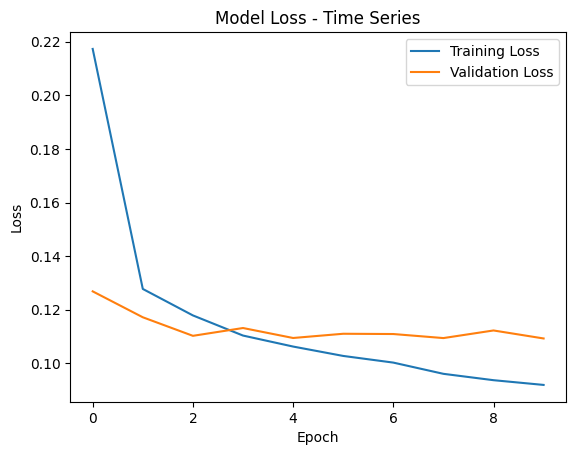

In [ ]:
# Plot training and validation loss. Accuracy metrics aren't to be plotted as the problem involves predicting continous variables
plt.plot(history_TS.history['loss'], label='Training Loss')
plt.plot(history_TS.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - Time Series')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### Evaluate Model

In [ ]:
evaluation_TS = model_TS.evaluate(X_test_TS, y_test_TS)

loss_TS = evaluation_TS[0]
accuracy_TS = evaluation_TS[1]
precision_TS = evaluation_TS[2]
recall_TS = evaluation_TS[3]
categorical_accuracy_TS = evaluation_TS[4]
TruePositives_TS = evaluation_TS[5]
FalsePositives_TS = evaluation_TS[6]
TrueNegatives_TS = evaluation_TS[7]
FalseNegatives_TS = evaluation_TS[8]

print("Test Loss:", f"{loss_TS:.3f}")
print("Test Accuracy:", f"{accuracy_TS:.3f}")
print("Precision:", f"{precision_TS:.3f}")
print("Recall:", f"{recall_TS:.3f}")
print("Categorical Accuracy:", f"{categorical_accuracy_TS:.3f}")
print("True Positives:", f"{TruePositives_TS:.3f}")
print("False Positives:", f"{FalsePositives_TS:.3f}")
print("True Negatives:", f"{TrueNegatives_TS:.3f}")
print("False Negatives:", f"{FalseNegatives_TS:.3f}")

#############################################################################################
## DEVELOPED USING EXISTING CODE ON KERAS BUILT IN EVALUATION FUNCTIONS (TENSORFLOW, 2024) ##
#############################################################################################

16/16 [==============================] - 0s 3ms/step - loss: 0.1093 - accuracy: 0.9620 - precision_TS: 0.7895 - recall_TS: 0.5000 - categorical_accuracy_TS: 1.0000 - true_positives_TS: 15.0000 - false_positives_TS: 4.0000 - true_negatives_TS: 466.0000 - false_negatives_TS: 15.0000 
Test Loss: 0.109
Test Accuracy: 0.962
Precision: 0.789
Recall: 0.500
Categorical Accuracy: 1.000
True Positives: 15.000
False Positives: 4.000
True Negatives: 466.000
False Negatives: 15.000


16/16 [==============================] - 0s 2ms/step


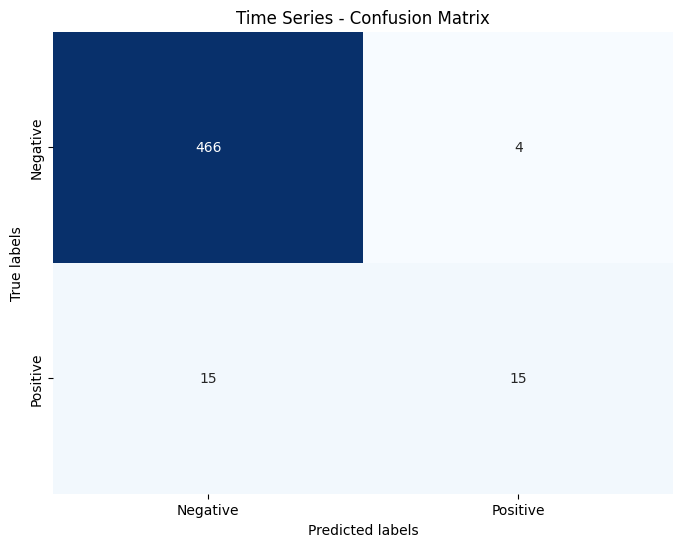

In [ ]:
#Confusion Matrix
y_pred_probs_TS = model_TS.predict(X_test_TS)
y_pred_TS = (y_pred_probs_TS > 0.5).astype(int) #use threshold for binary predictions

cm_TS = confusion_matrix(y_test_TS, y_pred_TS)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_TS, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Time Series - Confusion Matrix')
plt.show()

##### Hyperparameter tuning and testing

###### Test optimisation functions

In [ ]:
def train_model_with_optimizer(optimizer):
    model_OP = Sequential()
    model_OP.add(LSTM(units=50, input_shape=(X_train_TS.shape[1], X_train_TS.shape[2])))
    model_OP.add(Dense(units=1, activation='sigmoid'))

    # Compile model with the given optimizer
    model_OP.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision_OP'), Recall(name='recall_OP'),
                                                                     CategoricalAccuracy(name='categorical_accuracy_OP'), TruePositives(name='true_positives_OP'),
                                                                     FalsePositives(name='false_positives_OP'), TrueNegatives(name='true_negatives_OP'),
                                                                     FalseNegatives(name='false_negatives_OP')])

    # Train the model
    history_op = model_OP.fit(X_train_TS, y_train_TS, epochs=10, batch_size=32, validation_data=(X_test_TS, y_test_TS), verbose=0)

    # Evaluate the model
    loss_OP, accuracy_OP, precision_OP, recall_OP, categorical_accuracy_OP, true_positives_OP, false_positives_OP, true_negatives_OP, false_negatives_OP = model_OP.evaluate(X_test_TS, y_test_TS)

    return model_OP, history_op, accuracy_OP

#################################################################
## THIS CODE WAS DEVELOPED USING EXISTING CODE (Chollet, 2024) ##
#################################################################

In [ ]:
# Test optimizers
optimizers = [Adam(), RMSprop(), SGD()]

best_model_OP = None
best_accuracy_OP = 0.0

# Train and evaluate models with different optimizers
models_OP = []
histories_op = []
for optimizer in optimizers:
    model_OP, history_op, accuracy_OP = train_model_with_optimizer(optimizer)
    models_OP.append(model_OP)
    histories_op.append(history_op)
    if accuracy_OP > best_accuracy_OP:
        best_accuracy_OP = accuracy_OP
        best_model_OP = model_OP

16/16 [==============================] - 0s 2ms/step - loss: 0.1597 - accuracy: 0.9400 - precision_OP: 0.0000e+00 - recall_OP: 0.0000e+00 - categorical_accuracy_OP: 1.0000 - true_positives_OP: 0.0000e+00 - false_positives_OP: 0.0000e+00 - true_negatives_OP: 470.0000 - false_negatives_OP: 30.0000


In [ ]:
#Confirm best practice
print("Best model optimizer:", best_model_OP.optimizer.__class__.__name__)
print("Best model accuracy:", best_accuracy_OP)

Best model optimizer: Adam
Best model accuracy: 0.9679999947547913


In [ ]:
# Clearly show evaluation metrics
loss_OP, accuracy_OP, precision_OP, recall_OP, categorical_accuracy_OP, true_positives_OP, false_positives_OP, true_negatives_OP, false_negatives_OP = best_model_OP.evaluate(X_test_TS, y_test_TS)

print("Best Model Evaluation Metrics:")
print("Test Loss:", f"{loss_OP:.3f}")
print("Test Accuracy:", f"{accuracy_OP:.3f}")
print("Precision:", f"{precision_OP:.3f}")
print("Recall:", f"{recall_OP:.3f}")
print("Categorical Accuracy:", f"{categorical_accuracy_OP:.3f}")
print("True Positives:", f"{true_positives_OP:.3f}")
print("False Positives:", f"{false_positives_OP:.3f}")
print("True Negatives:", f"{true_negatives_OP:.3f}")
print("False Negatives:", f"{false_negatives_OP:.3f}")

16/16 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9680 - precision_OP: 0.8889 - recall_OP: 0.5333 - categorical_accuracy_OP: 1.0000 - true_positives_OP: 16.0000 - false_positives_OP: 2.0000 - true_negatives_OP: 468.0000 - false_negatives_OP: 14.0000 
Best Model Evaluation Metrics:
Test Loss: 0.111
Test Accuracy: 0.968
Precision: 0.889
Recall: 0.533
Categorical Accuracy: 1.000
True Positives: 16.000
False Positives: 2.000
True Negatives: 468.000
False Negatives: 14.000


16/16 [==============================] - 0s 2ms/step


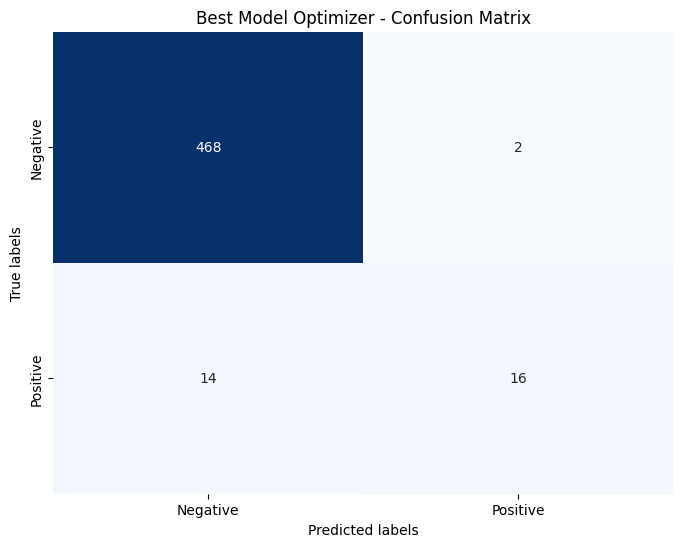

In [ ]:
# Create Confusion Matrix for the best model
y_pred_probs_best_OP = best_model_OP.predict(X_test_TS)
y_pred_best_OP = (y_pred_probs_best_OP > 0.5).astype(int)

cm_best_OP = confusion_matrix(y_test_TS, y_pred_best_OP)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_OP, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Best Model Optimizer - Confusion Matrix')
plt.show()

###### Layers and Regularisation

In [ ]:
def build_model_layers(num_lstm_layers_l, dropout_rate_l, X_train_l, y_train_l, X_val_l, y_val_l, optimizer_name):
    model_l = Sequential()

    for _ in range(num_lstm_layers_l - 1):
        model_l.add(LSTM(units=50, return_sequences=True))
        model_l.add(Dropout(dropout_rate_l))

    model_l.add(LSTM(units=50))
    model_l.add(Dropout(dropout_rate_l))
    model_l.add(Dense(units=1, activation='sigmoid'))

    model_l.compile(optimizer=optimizer_name,
                    loss='binary_crossentropy',
                    metrics=['accuracy', Precision(name='precision_l'), Recall(name='recall_l'),
                             CategoricalAccuracy(name='categorical_accuracy_l'),
                             TruePositives(name='true_positives_l'), FalsePositives(name='false_positives_l'),
                             TrueNegatives(name='true_negatives_l'), FalseNegatives(name='false_negatives_l')])

    history_l = model_l.fit(X_train_l, y_train_l, epochs=10, batch_size=32, validation_data=(X_val_l, y_val_l), verbose=0)

    val_accuracy_l = history_l.history['val_accuracy'][-1]
    print(f"Model with {num_lstm_layers_l} LSTM layers and Dropout rate of {dropout_rate_l} - Validation Accuracy: {val_accuracy_l:.4f}")

    return model_l, history_l

#################################################################
## THIS CODE WAS DEVELOPED USING EXISTING CODE (Chollet, 2024) ##
#################################################################

In [ ]:
# Implement hyperparameter testing
num_lstm_layers_list_l = [1, 2, 3]
dropout_rates_l = [0.2, 0.5]

best_num_lstm_layers_l = None
best_dropout_rate_l = None
best_val_accuracy_l = 0.0
best_model_l = None
best_history_l = None
best_optimizer_name = best_model_OP.optimizer.__class__.__name__



for num_lstm_layers_l in num_lstm_layers_list_l:
    for dropout_rate_l in dropout_rates_l:
        model_l, history_l = build_model_layers(num_lstm_layers_l, dropout_rate_l, X_train_TS, y_train_TS, X_test_TS, y_test_TS, best_optimizer_name)
        if history_l.history['val_accuracy'][-1] > best_val_accuracy_l:
            best_val_accuracy_l = history_l.history['val_accuracy'][-1]
            best_num_lstm_layers_l = num_lstm_layers_l
            best_dropout_rate_l = dropout_rate_l
            best_model_l = model_l
            best_history_l = history_l

print(f"\nThe best model has {best_num_lstm_layers_l} LSTM layers, Dropout rate of {best_dropout_rate_l}, and a validation accuracy of {best_val_accuracy_l:.4f}.")

Model with 1 LSTM layers and Dropout rate of 0.2 - Validation Accuracy: 0.9620
Model with 1 LSTM layers and Dropout rate of 0.5 - Validation Accuracy: 0.9660
Model with 2 LSTM layers and Dropout rate of 0.2 - Validation Accuracy: 0.9700
Model with 2 LSTM layers and Dropout rate of 0.5 - Validation Accuracy: 0.9620
Model with 3 LSTM layers and Dropout rate of 0.2 - Validation Accuracy: 0.9640
Model with 3 LSTM layers and Dropout rate of 0.5 - Validation Accuracy: 0.9620

The best model has 2 LSTM layers, Dropout rate of 0.2, and a validation accuracy of 0.9700.


In [ ]:
best_model_l.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_81 (LSTM)              (None, 1, 50)             38200     
                                                                 
 dropout_69 (Dropout)        (None, 1, 50)             0         
                                                                 
 lstm_82 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_70 (Dropout)        (None, 50)                0         
                                                                 
 dense_49 (Dense)            (None, 1)                 51        
                                                                 
Total params: 58451 (228.32 KB)
Trainable params: 58451 (228.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


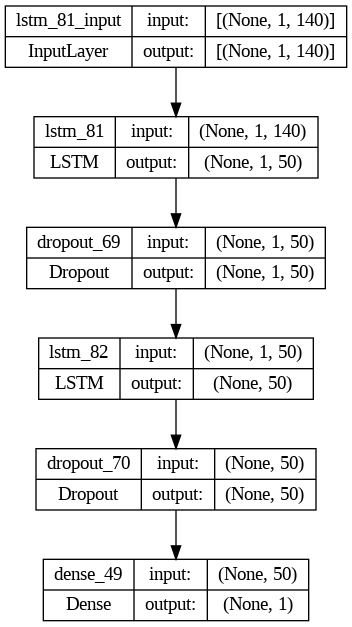

In [ ]:
from tensorflow.keras.utils import plot_model, to_categorical
plot_model(best_model_l, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
evaluation_layers = best_model_l.evaluate(X_test_TS, y_test_TS)

loss_layers = evaluation_layers[0]
accuracy_layers = evaluation_layers[1]
precision_layers = evaluation_layers[2]
recall_layers = evaluation_layers[3]
categorical_accuracy_layers = evaluation_layers[4]
TruePositives_layers = evaluation_layers[5]
FalsePositives_layers = evaluation_layers[6]
TrueNegatives_layers = evaluation_layers[7]
FalseNegatives_layers = evaluation_layers[8]

print("Test Loss:", f"{loss_layers:.3f}")
print("Test Accuracy:", f"{accuracy_layers:.3f}")
print("Precision:", f"{precision_layers:.3f}")
print("Recall:", f"{recall_layers:.3f}")
print("Categorical Accuracy:", f"{categorical_accuracy_layers:.3f}")
print("True Positives:", f"{TruePositives_layers:.3f}")
print("False Positives:", f"{FalsePositives_layers:.3f}")
print("True Negatives:", f"{TrueNegatives_layers:.3f}")
print("False Negatives:", f"{FalseNegatives_layers:.3f}")

#########################################################################################################################
## REPLICATED FROM ABOVE CODE, DEVELOPED USING EXISTING CODE ON KERAS BUILT IN EVALUATION FUNCTIONS (TENSORFLOW, 2024) ##
#########################################################################################################################

16/16 [==============================] - 0s 3ms/step - loss: 0.1016 - accuracy: 0.9700 - precision_l: 0.8947 - recall_l: 0.5667 - categorical_accuracy_l: 1.0000 - true_positives_l: 17.0000 - false_positives_l: 2.0000 - true_negatives_l: 468.0000 - false_negatives_l: 13.0000 
Test Loss: 0.102
Test Accuracy: 0.970
Precision: 0.895
Recall: 0.567
Categorical Accuracy: 1.000
True Positives: 17.000
False Positives: 2.000
True Negatives: 468.000
False Negatives: 13.000


16/16 [==============================] - 1s 2ms/step


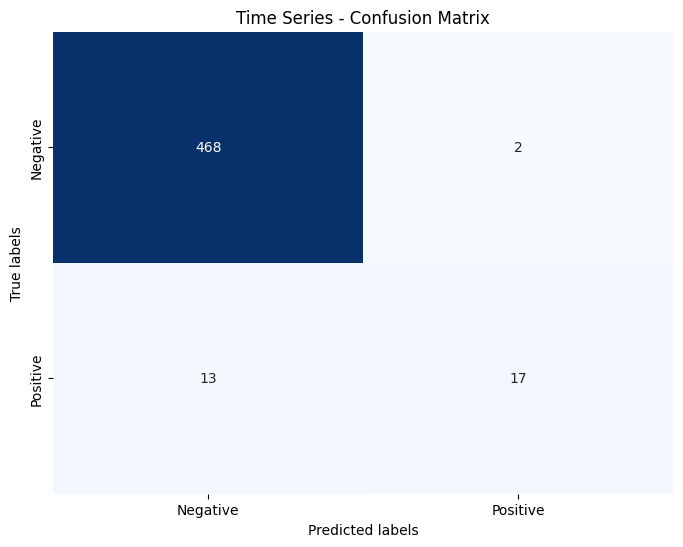

In [ ]:
#Create Confusion Matrix
y_pred_probs_layers = best_model_l.predict(X_test_TS)
y_pred_layers = (y_pred_probs_layers > 0.5).astype(int)

cm_TS_layers = confusion_matrix(y_test_TS, y_pred_layers)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_TS_layers, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Time Series - Confusion Matrix')
plt.show()

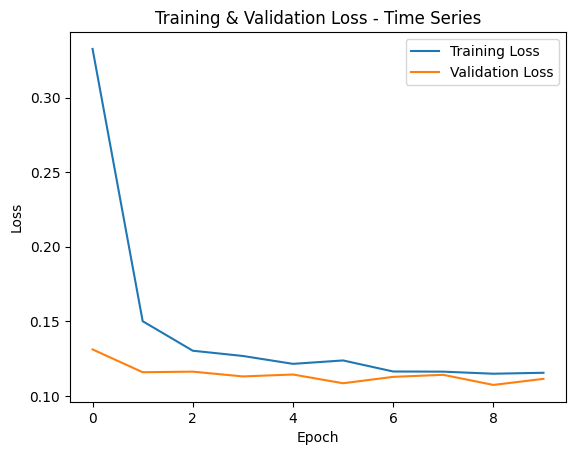

In [ ]:
# Plot training & validation loss values
plt.plot(history_l.history['loss'], label='Training Loss')
plt.plot(history_l.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss - Time Series')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# **Time Instance Forecasting**

#### **Method 1 - Dense Neural Network**

##### Create DataFrame

In [ ]:
ECG_TI = pd.DataFrame(vis_df1)

In [ ]:
ECG_TI.columns = ['Target', *range(1, 141)]  # Rename column 0 to 'Target'
ECG_TI['Target'] = ECG_TI['Target'].map({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})

In [ ]:
ECG_TI

Target         1         2         3         4         5         6  \
0          0  3.690844  0.711414 -2.114091 -4.141007 -4.574472 -3.431909   
1          0 -1.348132 -3.996038 -4.226750 -4.251187 -3.477953 -2.228422   
2          0  1.024295 -0.590314 -1.916949 -2.806989 -3.527905 -3.638675   
3          0  0.545657 -1.014383 -2.316698 -3.634040 -4.196857 -3.758093   
4          0  0.661133 -1.552471 -3.124641 -4.313351 -4.017042 -3.005993   
...      ...       ...       ...       ...       ...       ...       ...   
4995       1 -0.478577 -1.779959 -2.398159 -3.170112 -3.559732 -3.573956   
4996       1 -1.325210 -2.480992 -2.965356 -3.342392 -3.176351 -2.891528   
4997       1 -0.021964 -0.912434 -1.903353 -2.662829 -3.122156 -3.451490   
4998       1  0.288011 -1.098020 -2.500250 -3.598599 -3.650608 -3.281587   
4999       1 -1.133674 -2.702941 -3.120979 -3.558669 -3.312442 -2.607641   

             7         8         9  ...       131       132       133  \
0    -1.950791 -1.107067 -0.632322  ... -0.032477  0.022847  0.188937   
1    -1.808488 -1.534242 -0.779861  ...  0.937984  1.570938  1.591394   
2    -2.779767 -2.019031 -1.980754  ...  0.368820  0.443502  0.827582   
3    -3.194444 -2.221764 -1.588554  ...  0.894638  0.777530  1.119240   
4    -1.832411 -1.503886 -1.071705  ...  1.416582  1.280823  1.494315   
...        ...       ...       ...  ...       ...       ...       ...   
4995 -2.989770 -2.270605 -1.688277  ...  1.294840  1.160885  1.456331   
4996 -2.369679 -1.598750 -1.071751  ...  0.552076 -0.172154 -0.864803   
4997 -3.392982 -2.929937 -2.256294  ...  1.528745  1.339479  1.457995   
4998 -2.231601 -1.250656 -1.072574  ...  0.081634 -0.029242  0.071414   
4999 -1.354939 -1.014740 -0.796023  ... -2.886340 -3.206942 -2.941677   

           134       135       136       137       138       139       140  
0     0.480932  0.629250  0.577291  0.665527  1.035997  1.492287 -1.905073  
1     1.549193  1.193077  0.515134  0.126274  0.267532  1.071148 -1.164009  
2     1.237007  1.235121  1.738103  1.800767  1.816301  1.473963  1.389767  
3     0.902984  0.554098  0.497053  0.418116  0.703108  1.064602 -0.044853  
4     1.618764  1.447449  1.238577  1.749692  1.986803  1.422756 -0.357784  
...        ...       ...       ...       ...       ...       ...       ...  
4995  2.209421  2.507175  2.198534  1.705849  1.492642  1.561890  1.520161  
4996 -1.549854 -2.460243 -3.366562 -3.466546 -2.718380 -1.855209 -1.539958  
4997  2.128078  2.630759  2.295748  1.764967  1.444280  1.432347  1.457028  
4998  0.118161 -0.071967 -0.171214  0.131211  0.049872  0.010915 -0.081534  
4999 -2.557140 -1.487946 -1.118880 -0.737113 -0.110840  0.001858 -0.122639  

[5000 rows x 141 columns]

###### Preprocessing

In [ ]:
# Split features (X) and target (y) and drop target variable
X_TI = ECG_TI.drop('Target', axis=1)
y_TI = ECG_TI['Target']

In [ ]:
#Scale
scaler = StandardScaler()
X_scaled_TI = scaler.fit_transform(X_TI)

In [ ]:
#Split data
X_train_TI, X_test_TI, y_train_TI, y_test_TI = train_test_split(X_scaled_TI, y_TI, test_size=0.1, random_state=42) #test and train size determined in source

In [ ]:
# Define the input shape
input_shape = X_train_TI.shape[1:] #shape as 1 as each heartbeart is to be reviewed individually for the problem statement

##### Build Model

In [ ]:
# Create a sequential model that focuses on each time instance independently for each class

model_TI = Sequential()
model_TI.add(Dense(64, activation='relu', input_shape=input_shape))
model_TI.add(Dense(32, activation='relu'))
model_TI.add(Dense(1, activation='sigmoid'))

################################################################
##THIS CODE WAS DEVELOPED USING EXISTING CODE: (Chollet, 2023) ##
################################################################

In [ ]:
#Compile Model
model_TI.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision_TI'), Recall(name='recall_TI'),
                                                                     CategoricalAccuracy(name='categorical_accuracy_TI'), TruePositives(name='true_positives_TI'),
                                                                     FalsePositives(name='false_positives_TI'), TrueNegatives(name='true_negatives_TI'),
                                                                     FalseNegatives(name='false_negatives_TI')])

#####################################################################
## THIS CODE WAS DEVELOPED USING EXISTING CODE: (TENSORFLOW) 2024) ##
#####################################################################

In [ ]:
model_TI.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                9024      
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11137 (43.50 KB)
Trainable params: 11137 (43.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


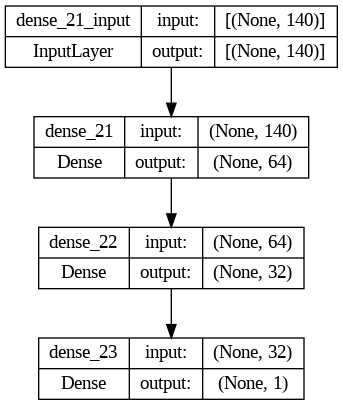

In [ ]:
plot_model(model_TI, show_shapes=True, show_layer_names=True)

##### Train Model

In [ ]:
# Train model
history_TI = model_TI.fit(X_train_TI, y_train_TI, epochs=10, batch_size=32, validation_data=(X_test_TI, y_test_TI))

Epoch 1/10
141/141 [==============================] - 2s 6ms/step - loss: 0.1729 - accuracy: 0.9398 - precision_TI: 0.5575 - recall_TI: 0.2218 - categorical_accuracy_TI: 1.0000 - true_positives_TI: 63.0000 - false_positives_TI: 50.0000 - true_negatives_TI: 4166.0000 - false_negatives_TI: 221.0000 - val_loss: 0.1308 - val_accuracy: 0.9640 - val_precision_TI: 0.8750 - val_recall_TI: 0.4667 - val_categorical_accuracy_TI: 1.0000 - val_true_positives_TI: 14.0000 - val_false_positives_TI: 2.0000 - val_true_negatives_TI: 468.0000 - val_false_negatives_TI: 16.0000
Epoch 2/10
141/141 [==============================] - 1s 5ms/step - loss: 0.1285 - accuracy: 0.9591 - precision_TI: 0.7717 - recall_TI: 0.5000 - categorical_accuracy_TI: 1.0000 - true_positives_TI: 142.0000 - false_positives_TI: 42.0000 - true_negatives_TI: 4174.0000 - false_negatives_TI: 142.0000 - val_loss: 0.1202 - val_accuracy: 0.9720 - val_precision_TI: 0.9444 - val_recall_TI: 0.5667 - val_categorical_accuracy_TI: 1.0000 - val_t

##### Training and Validation Loss and Accuracy

In [ ]:
training_loss_TI = history_TI.history['loss']
training_accuracy_TI = history_TI.history['accuracy']
validation_loss_TI = history_TI.history['val_loss']
validation_accuracy_TI = history_TI.history['val_accuracy']

last_epoch = len(training_loss_TI)
print("Training Loss:", training_loss_TI[last_epoch-1])
print("Training Accuracy:", training_accuracy_TI[last_epoch-1])
print("Validation Loss:", validation_loss_TI[last_epoch-1])
print("Validation Accuracy:", validation_accuracy_TI[last_epoch-1])

Training Loss: 0.09514221549034119
Training Accuracy: 0.9706666469573975
Validation Loss: 0.11077176034450531
Validation Accuracy: 0.9639999866485596


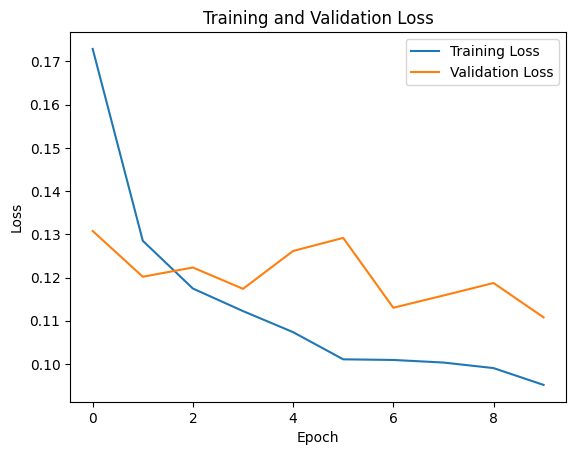

In [ ]:
# Plot training and validation loss
plt.plot(training_loss_TI, label='Training Loss')
plt.plot(validation_loss_TI, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

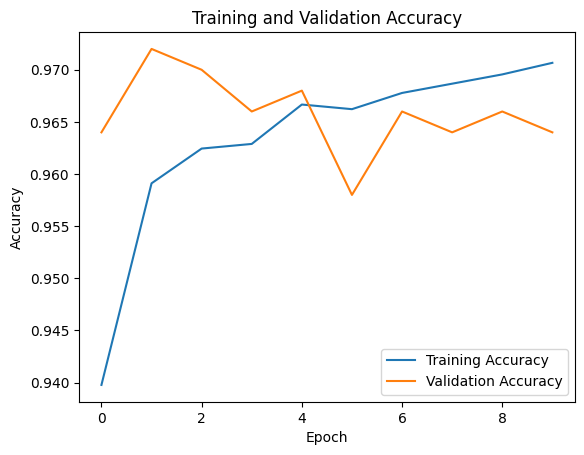

In [ ]:
# Plot training and validation accuracy
plt.plot(training_accuracy_TI, label='Training Accuracy')
plt.plot(validation_accuracy_TI, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Evaluate Model

In [ ]:
evaluation_TI = model_TI.evaluate(X_test_TI, y_test_TI)

loss_TI = evaluation_TI[0]
accuracy_TI = evaluation_TI[1]
precision_TI = evaluation_TI[2]
recall_TI = evaluation_TI[3]
categorical_accuracy_TI = evaluation_TI[4]
true_positives_TI = evaluation_TI[5]
false_positives_TI = evaluation_TI[6]
true_negatives_TI = evaluation_TI[7]
false_negatives_TI = evaluation_TI[8]

print("Test Loss:", f"{loss_TI:.2f}")
print("Test Accuracy:", f"{accuracy_TI:.2f}")
print("Precision:", f"{precision_TI:.2f}")
print("Recall:", f"{recall_TI:.2f}")
print("Categorical Accuracy:", f"{categorical_accuracy_TI:.2f}")
print("True Positives:", f"{true_positives_TI:.2f}")
print("False Positives:", f"{false_positives_TI:.2f}")
print("True Negatives:", f"{true_negatives_TI:.2f}")
print("False Negatives:", f"{false_negatives_TI:.2f}")

#############################################################################################
## DEVELOPED USING EXISTING CODE ON KERAS BUILT IN EVALUATION FUNCTIONS (TENSORFLOW, 2024) ##
#############################################################################################

16/16 [==============================] - 0s 7ms/step - loss: 0.1108 - accuracy: 0.9640 - precision_TI: 0.8333 - recall_TI: 0.5000 - categorical_accuracy_TI: 1.0000 - true_positives_TI: 15.0000 - false_positives_TI: 3.0000 - true_negatives_TI: 467.0000 - false_negatives_TI: 15.0000
Test Loss: 0.11
Test Accuracy: 0.96
Precision: 0.83
Recall: 0.50
Categorical Accuracy: 1.00
True Positives: 15.00
False Positives: 3.00
True Negatives: 467.00
False Negatives: 15.00


###### Confusion Matrix

In [ ]:
y_pred_prob_TI = model_TI.predict(X_test_TI)
y_pred_classes_TI = (y_pred_prob_TI > 0.5).astype("int32")

conf_matrix_TI = confusion_matrix(y_test_TI, y_pred_classes_TI)
true_positives_TI = conf_matrix_TI[1, 1]
false_positives_TI = conf_matrix_TI[0, 1]
true_negatives_TI = conf_matrix_TI[0, 0]
false_negatives_TI = conf_matrix_TI[1, 0]

16/16 [==============================] - 0s 2ms/step


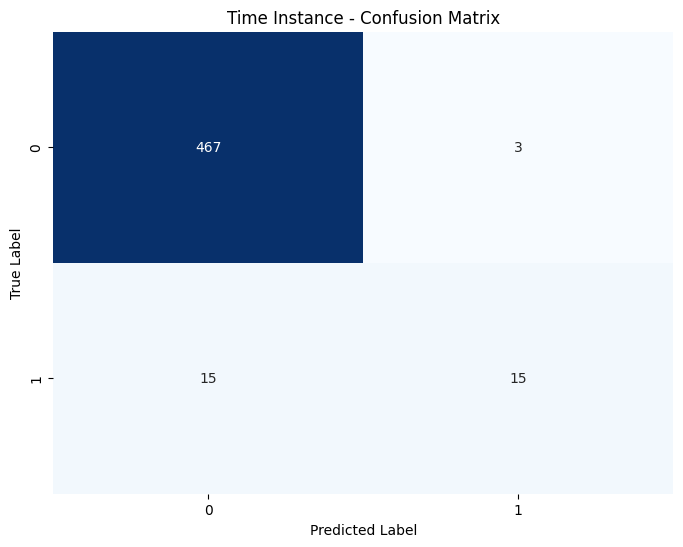

In [ ]:
#Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_TI, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Time Instance - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### Hyperparamter Tuning

###### Layers

In [ ]:
def build_hypermodel_TI(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('input_units', min_value=32, max_value=128, step=32),activation='relu', input_shape=input_shape))
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
        model.add(Dense(units=hp.Int(f'layer_{i}_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy',Precision(name='precision_l'), Recall(name='recall_l'),
                                                                     CategoricalAccuracy(name='categorical_accuracy_l'), TruePositives(name='true_positives_l'),
                                                                     FalsePositives(name='false_positives_l'), TrueNegatives(name='true_negatives_l'),
                                                                     FalseNegatives(name='false_negatives_l')])
    return model


##############################################################
## THIS CODE WAS DEVELOPED USING EXISTING CODE: KERAS, 2024 ##
##############################################################

In [ ]:
# Define the tuner to test layers
tuner_TI_L = kt.RandomSearch(build_hypermodel_TI, objective='val_accuracy',max_trials=5, directory='my_dir',project_name='layers_neurons_tuning')

# Perform hyperparameter tuning
tuner_TI_L.search(X_train_TI, y_train_TI, epochs=10, validation_data=(X_test_TI, y_test_TI))

####################################################
##THIS CODE WAS DEVELOPED USING TENSORFLOW (2022) ##
####################################################

Reloading Tuner from my_dir/layers_neurons_tuning/tuner0.json


In [ ]:
# Get the best hyperparameters
best_hps_L = tuner_TI_L.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Number of Layers:", best_hps_L.get('num_layers'))
for i in range(best_hps_L.get('num_layers')):
    print(f"Layer {i+1} Units:", best_hps_L.get(f'layer_{i}_units'))

Best Number of Layers: 1
Layer 1 Units: 128


In [ ]:
# Build and train the model with the best hyperparameters
best_model_TI_L = tuner_TI_L.hypermodel.build(best_hps_L)
history_TI_HP_L = best_model_TI_L.fit(X_train_TI, y_train_TI, epochs=10, validation_data=(X_test_TI, y_test_TI))

##############################################################
## THIS CODE WAS DEVELOPED USING EXISTING CODE: KERAS, 2024 ##
##############################################################

Epoch 1/10
141/141 [==============================] - 2s 6ms/step - loss: 0.1777 - accuracy: 0.9451 - precision_l: 0.6434 - recall_l: 0.2923 - categorical_accuracy_l: 1.0000 - true_positives_l: 83.0000 - false_positives_l: 46.0000 - true_negatives_l: 4170.0000 - false_negatives_l: 201.0000 - val_loss: 0.1365 - val_accuracy: 0.9600 - val_precision_l: 0.9167 - val_recall_l: 0.3667 - val_categorical_accuracy_l: 1.0000 - val_true_positives_l: 11.0000 - val_false_positives_l: 1.0000 - val_true_negatives_l: 469.0000 - val_false_negatives_l: 19.0000
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 0.1219 - accuracy: 0.9609 - precision_l: 0.8103 - recall_l: 0.4965 - categorical_accuracy_l: 1.0000 - true_positives_l: 141.0000 - false_positives_l: 33.0000 - true_negatives_l: 4183.0000 - false_negatives_l: 143.0000 - val_loss: 0.1309 - val_accuracy: 0.9600 - val_precision_l: 0.7778 - val_recall_l: 0.4667 - val_categorical_accuracy_l: 1.0000 - val_true_positives_l: 14.0000

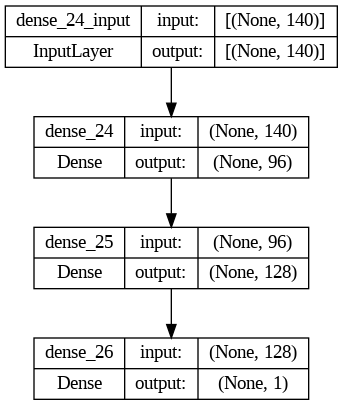

In [ ]:
plot_model(best_model_TI_L, show_shapes=True, show_layer_names=True)

Evaluation

In [ ]:
evaluation_l = best_model_TI_L.evaluate(X_test_TI, y_test_TI)

loss_l = evaluation_l[0]
accuracy_l = evaluation_l[1]
precision_l = evaluation_l[2]
recall_l = evaluation_l[3]
categorical_accuracy_l = evaluation_l[4]
true_positives_l = evaluation_l[5]
false_positives_l = evaluation_l[6]
true_negatives_l = evaluation_l[7]
false_negatives_l = evaluation_l[8]

print("Test Loss:", f"{loss_l:.2f}")
print("Test Accuracy:", f"{accuracy_l:.2f}")
print("Precision:", f"{precision_l:.2f}")
print("Recall:", f"{recall_l:.2f}")
print("Categorical Accuracy:", f"{categorical_accuracy_l:.2f}")
print("True Positives:", f"{true_positives_l:.2f}")
print("False Positives:", f"{false_positives_l:.2f}")
print("True Negatives:", f"{true_negatives_l:.2f}")
print("False Negatives:", f"{false_negatives_l:.2f}")

16/16 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.9600 - precision_l: 0.7778 - recall_l: 0.4667 - categorical_accuracy_l: 1.0000 - true_positives_l: 14.0000 - false_positives_l: 4.0000 - true_negatives_l: 466.0000 - false_negatives_l: 16.0000 
Test Loss: 0.13
Test Accuracy: 0.96
Precision: 0.78
Recall: 0.47
Categorical Accuracy: 1.00
True Positives: 14.00
False Positives: 4.00
True Negatives: 466.00
False Negatives: 16.00


###### Dropout

In [ ]:
def build_hypermodel_TI(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('input_units', min_value=32, max_value=128, step=32), activation='relu', input_shape=input_shape))

    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
        model.add(Dense(units=hp.Int(f'layer_{i}_units', min_value=32, max_value=128, step=32), activation='relu'))
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1, default=0.2)
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy', Precision(name='precision_d'), Recall(name='recall_d'),
                                                                     CategoricalAccuracy(name='categorical_accuracy_d'), TruePositives(name='true_positives_d'),
                                                                     FalsePositives(name='false_positives_d'), TrueNegatives(name='true_negatives_d'),
                                                                     FalseNegatives(name='false_negatives_d')])
    return model


##############################################################
## THIS CODE WAS DEVELOPED USING EXISTING CODE: KERAS, 2024 ##
##############################################################

In [ ]:
# Define the tuner to dropout
tuner_TI_D = kt.RandomSearch(build_hypermodel_TI, objective='val_accuracy', max_trials=5, directory='my_dir', project_name='dropout_tuning')

# Perform hyperparameter tuning
tuner_TI_D.search(X_train_TI, y_train_TI, epochs=10, validation_data=(X_test_TI, y_test_TI))

####################################################
##THIS CODE WAS DEVELOPED USING TENSORFLOW (2022) ##
####################################################

Reloading Tuner from my_dir/dropout_tuning/tuner0.json


In [ ]:
# Best parameters
best_hps_TI_D = tuner_TI_D.get_best_hyperparameters(num_trials=1)[0]
print("Best Number of Layers:", best_hps_TI_D.get('num_layers'))
for i in range(best_hps_TI_D.get('num_layers')):
    print(f"Layer {i+1} Units:", best_hps_TI_D.get(f'layer_{i}_units'))
    print(f"Dropout Rate for Layer {i+1}:", best_hps_TI_D.get(f'dropout_{i}'))

Best Number of Layers: 3
Layer 1 Units: 64
Dropout Rate for Layer 1: 0.1
Layer 2 Units: 64
Dropout Rate for Layer 2: 0.30000000000000004
Layer 3 Units: 32
Dropout Rate for Layer 3: 0.1


In [ ]:
# Build the model with the best hyperparameters
best_model_TI_D = tuner_TI_D.hypermodel.build(best_hps_TI_D)

# Train the model
history_TI_D = best_model_TI_D.fit(X_train_TI, y_train_TI, epochs=10, validation_data=(X_test_TI, y_test_TI))

141/141 [==============================] - 3s 7ms/step - loss: 0.1935 - accuracy: 0.9387 - precision_d: 0.5377 - recall_d: 0.2007 - categorical_accuracy_d: 1.0000 - true_positives_d: 57.0000 - false_positives_d: 49.0000 - true_negatives_d: 4167.0000 - false_negatives_d: 227.0000 - val_loss: 0.1365 - val_accuracy: 0.9580 - val_precision_d: 0.8000 - val_recall_d: 0.4000 - val_categorical_accuracy_d: 1.0000 - val_true_positives_d: 12.0000 - val_false_positives_d: 3.0000 - val_true_negatives_d: 467.0000 - val_false_negatives_d: 18.0000
Epoch 2/10
141/141 [==============================] - 1s 4ms/step - loss: 0.1473 - accuracy: 0.9556 - precision_d: 0.7360 - recall_d: 0.4613 - categorical_accuracy_d: 1.0000 - true_positives_d: 131.0000 - false_positives_d: 47.0000 - true_negatives_d: 4169.0000 - false_negatives_d: 153.0000 - val_loss: 0.1193 - val_accuracy: 0.9620 - val_precision_d: 0.8235 - val_recall_d: 0.4667 - val_categorical_accuracy_d: 1.0000 - val_true_positives_d: 14.0000 - val_fals

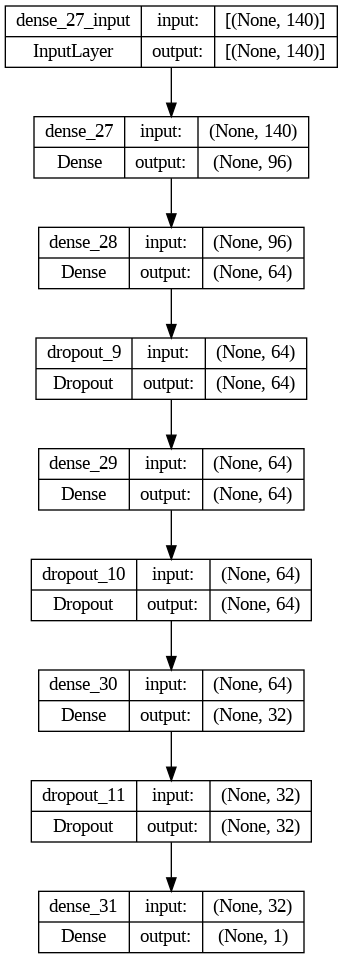

In [ ]:
plot_model(best_model_TI_D, show_shapes=True, show_layer_names=True)

In [ ]:
evaluation_d = best_model_TI_L.evaluate(X_test_TI, y_test_TI)

loss_d = evaluation_d[0]
accuracy_d = evaluation_d[1]
precision_d = evaluation_d[2]
recall_d = evaluation_d[3]
categorical_accuracy_d = evaluation_d[4]
true_positives_d = evaluation_d[5]
false_positives_d = evaluation_d[6]
true_negatives_d = evaluation_d[7]
false_negatives_d = evaluation_d[8]

print("Test Loss:", f"{loss_d:.2f}")
print("Test Accuracy:", f"{accuracy_d:.2f}")
print("Precision:", f"{precision_d:.2f}")
print("Recall:", f"{recall_d:.2f}")
print("Categorical Accuracy:", f"{categorical_accuracy_d:.2f}")
print("True Positives:", f"{true_positives_d:.2f}")
print("False Positives:", f"{false_positives_d:.2f}")
print("True Negatives:", f"{true_negatives_d:.2f}")
print("False Negatives:", f"{false_negatives_d:.2f}")

16/16 [==============================] - 0s 3ms/step - loss: 0.1252 - accuracy: 0.9600 - precision_l: 0.7778 - recall_l: 0.4667 - categorical_accuracy_l: 1.0000 - true_positives_l: 14.0000 - false_positives_l: 4.0000 - true_negatives_l: 466.0000 - false_negatives_l: 16.0000 
Test Loss: 0.13
Test Accuracy: 0.96
Precision: 0.78
Recall: 0.47
Categorical Accuracy: 1.00
True Positives: 14.00
False Positives: 4.00
True Negatives: 466.00
False Negatives: 16.00


#### **Method 2 - LSTM (defined instance)**

In [ ]:
# Create DataFrame
lstmdf = pd.DataFrame(vis_df1)

# Map values in column 0
lstmdf[0] = lstmdf[0].map({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})

# Rename columns for clarity
lstmdf.columns = ['Target', *range(1, 141)]  # Rename column 0 to 'Target'

# Display the new DataFrame
lstmdf

Target         1         2         3         4         5         6  \
0          0  3.690844  0.711414 -2.114091 -4.141007 -4.574472 -3.431909   
1          0 -1.348132 -3.996038 -4.226750 -4.251187 -3.477953 -2.228422   
2          0  1.024295 -0.590314 -1.916949 -2.806989 -3.527905 -3.638675   
3          0  0.545657 -1.014383 -2.316698 -3.634040 -4.196857 -3.758093   
4          0  0.661133 -1.552471 -3.124641 -4.313351 -4.017042 -3.005993   
...      ...       ...       ...       ...       ...       ...       ...   
4995       1 -0.478577 -1.779959 -2.398159 -3.170112 -3.559732 -3.573956   
4996       1 -1.325210 -2.480992 -2.965356 -3.342392 -3.176351 -2.891528   
4997       1 -0.021964 -0.912434 -1.903353 -2.662829 -3.122156 -3.451490   
4998       1  0.288011 -1.098020 -2.500250 -3.598599 -3.650608 -3.281587   
4999       1 -1.133674 -2.702941 -3.120979 -3.558669 -3.312442 -2.607641   

             7         8         9  ...       131       132       133  \
0    -1.950791 -1.107067 -0.632322  ... -0.032477  0.022847  0.188937   
1    -1.808488 -1.534242 -0.779861  ...  0.937984  1.570938  1.591394   
2    -2.779767 -2.019031 -1.980754  ...  0.368820  0.443502  0.827582   
3    -3.194444 -2.221764 -1.588554  ...  0.894638  0.777530  1.119240   
4    -1.832411 -1.503886 -1.071705  ...  1.416582  1.280823  1.494315   
...        ...       ...       ...  ...       ...       ...       ...   
4995 -2.989770 -2.270605 -1.688277  ...  1.294840  1.160885  1.456331   
4996 -2.369679 -1.598750 -1.071751  ...  0.552076 -0.172154 -0.864803   
4997 -3.392982 -2.929937 -2.256294  ...  1.528745  1.339479  1.457995   
4998 -2.231601 -1.250656 -1.072574  ...  0.081634 -0.029242  0.071414   
4999 -1.354939 -1.014740 -0.796023  ... -2.886340 -3.206942 -2.941677   

           134       135       136       137       138       139       140  
0     0.480932  0.629250  0.577291  0.665527  1.035997  1.492287 -1.905073  
1     1.549193  1.193077  0.515134  0.126274  0.267532  1.071148 -1.164009  
2     1.237007  1.235121  1.738103  1.800767  1.816301  1.473963  1.389767  
3     0.902984  0.554098  0.497053  0.418116  0.703108  1.064602 -0.044853  
4     1.618764  1.447449  1.238577  1.749692  1.986803  1.422756 -0.357784  
...        ...       ...       ...       ...       ...       ...       ...  
4995  2.209421  2.507175  2.198534  1.705849  1.492642  1.561890  1.520161  
4996 -1.549854 -2.460243 -3.366562 -3.466546 -2.718380 -1.855209 -1.539958  
4997  2.128078  2.630759  2.295748  1.764967  1.444280  1.432347  1.457028  
4998  0.118161 -0.071967 -0.171214  0.131211  0.049872  0.010915 -0.081534  
4999 -2.557140 -1.487946 -1.118880 -0.737113 -0.110840  0.001858 -0.122639  

[5000 rows x 141 columns]

###### LSTM Model Class

In [ ]:
class DataHandler:
    # Initialize the DataHandler object with features (X) and target (y)
    def __init__(self, X, y):
        self.X = X
        self.y = y

    # Split the data into training and testing sets
    def split(self, test_size=0.1):
        x_train, x_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, stratify=self.y)
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        return self

    # Apply SMOTE (Synthetic Minority Over-sampling Technique) to handle the imbalanced data
    def apply_smote(self):
        undersample = NeighbourhoodCleaningRule()
        x, y = undersample.fit_resample(self.x_train, self.y_train)
        self.x_train = x
        self.y_train = y
        return self

    # Apply standard scaling to the feature
    def apply_scaler(self):
        scaled_features = StandardScaler().fit_transform(self.X)
        self.X = pd.DataFrame(scaled_features, index=self.X.index, columns=self.X.columns)
        return self

    # Reshape the data into 3D format for LSTM input
    def reshape_3d(self):
        self.x_train = self.x_train.values.reshape((self.x_train.shape[0], 1, self.x_train.shape[1]))
        self.x_test = self.x_test.values.reshape((self.x_test.shape[0], 1, self.x_test.shape[1]))
        return self

    # Get the data along with Stratified K-Fold splits
    def get_data(self):
        skf = StratifiedKFold(n_splits=5)
        self.skf = skf.split(self.x_train, self.y_train)
        return (self.x_train, self.y_train, self.x_test, self.y_test, self.skf)

##############################################################
##THIS CODE WAS DEVELOPED USING EXISTING CODE: (Malkin, 2022) ##
##############################################################

In [ ]:
class LSTMModel:
  # Initializing the LSTMModel object with specified parameters
  def __init__(self, input_shape, output_size = 1, lstm_nodes = 50, dropout= 0.4, rec_dropout = 0.35):
    self.input_shape = input_shape
    self.output_size = output_size
    self.lstm_nodes = lstm_nodes
    self.dropout = dropout
    self.rec_dropout = rec_dropout
    self.is_built = False
    self.history = []

  # Define the input layers
  def build(self):
    input_layer = Input(self.input_shape)
    h_layer_1 = LSTM(self.lstm_nodes,return_sequences=True, dropout=self.dropout, recurrent_dropout=self.rec_dropout)(input_layer)
    h_layer_2 = LSTM(self.lstm_nodes,return_sequences=True, dropout=self.dropout, recurrent_dropout=self.rec_dropout)(h_layer_1)
  # Creating the model
    output_layer = Dense(self.output_size, activation='sigmoid')(h_layer_2)
    self.model = Model(input_layer, output_layer)
    self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', metrics.Precision(name="precision"), metrics.Recall(name="recall")])
    self.is_built = True

  # Plot the model architecture
  def plot_model_arch(self):
    if not self.is_built:
      print("Please build the model first.")
      return

    plot_model(self.model, to_file = 'lstm_arch.jpg', show_shapes = True, show_layer_names = True, dpi=1200)
    img = np.asarray(Image.open('lstm_arch.jpg'))
    imgplot = plt.imshow(img)

  # Fitting the model
  def fit_model(self, lstm_x_train, lstm_y_train, lstm_x_val, lstm_y_val ,skf, batch_size = 2000, epochs = 100):
    if not self.is_built:
      print("Please build the model first.")
      return

    history = self.model.fit(lstm_x_train, lstm_y_train,epochs=epochs,batch_size=batch_size, validation_data=(lstm_x_val, lstm_y_val))
    self.history.append(history)

  # Plot the evaluation scores
  def plot_history(self):
    fold_no = 1
    for history in self.history:
      print("On fold: " , fold_no)
      plt.figure(dpi=700)
      plt.subplot(221)
      plt.title('Loss')
      plt.plot(history.history['loss'], label='train')
      plt.plot(history.history['val_loss'], label='test')
      plt.legend()
      plt.subplot(222)
      plt.title('Accuracy')
      plt.plot(history.history['accuracy'], label='train')
      plt.plot(history.history['val_accuracy'], label='test')
      plt.legend()

      plt.subplot(223)
      plt.title('Recall')
      plt.plot(history.history['recall'], label='train')
      plt.plot(history.history['val_recall'], label='test')
      plt.legend()

      plt.subplot(224)
      plt.title('Presicion')
      plt.plot(history.history['precision'], label='train')
      plt.plot(history.history['val_precision'], label='test')
      plt.legend()

      plt.tight_layout()

      plt.show()
      fold_no = fold_no + 1

  # Predicting probabilities
  def predict(self, x_test):
    y_probs = self.model.predict(x_test, verbose=0)
    y_probs = y_probs[:, 0]
    y_probs = (y_probs > 0.5).astype(np.float32)
    return y_probs

  # Predicting Evaluation Metrics
  def evaluate_model(self, x_test, y_test):
    y_probs = self.predict(x_test)
    accuracy = accuracy_score(y_test, y_probs)
    print('Accuracy: %f' % accuracy)
    precision = precision_score(y_test, y_probs)
    print('Precision: %f' % precision)
    recall = recall_score(y_test, y_probs)
    print('Recall: %f' % recall)

    f1 = (2 * recall * precision) / (recall + precision)
    print('F1: %f' % f1)

  # Saving the Model
  def save_model(self, path = 'lstm_saved_model.h5'):
    self.model.save(path)
    print(f"Saved model at '{path}'.")

##############################################################
##THIS CODE WAS DEVELOPED USING EXISTING CODE: (Stack Overflow, n.d.) ##
##############################################################

###### Loading Data and Building Model

In [ ]:
lstm_dataset = lstmdf

# Initializing a DataHandler object with features and target variable
data_handler = DataHandler(lstm_dataset.iloc[:, 1:], lstmdf['Target'])

# Splitting the dataset into training and testing sets
(lstm_x_train, lstm_y_train, lstm_x_test, lstm_y_test, lstm_skf) = data_handler.split().get_data()

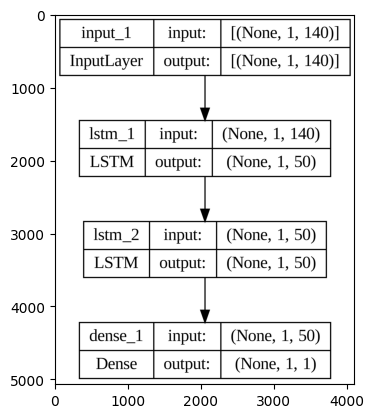

In [ ]:
# Creating an LSTMModel object with specified input shape and number of LSTM nodes
# Input shape is set to (1, 140) indicating a time forecast data with one time step and 140 features
lstm_model = LSTMModel(input_shape=(1,140), lstm_nodes = 50)

# Defining the layers of the model and compiling it
lstm_model.build()

# Plotting the architecture of the built LSTM model
lstm_model.plot_model_arch()

###### Evaluation

In [ ]:
# Reshape input data to include time step dimension
lstm_x_train_reshaped = np.expand_dims(lstm_x_train, axis=1)
lstm_x_test_reshaped = np.expand_dims(lstm_x_test, axis=1)

3/3 [==============================] - 1s 207ms/step - loss: 0.1980 - accuracy: 0.9404 - precision: 0.6230 - recall: 0.1343 - val_loss: 0.2093 - val_accuracy: 0.9400 - val_precision: 0.5556 - val_recall: 0.1613


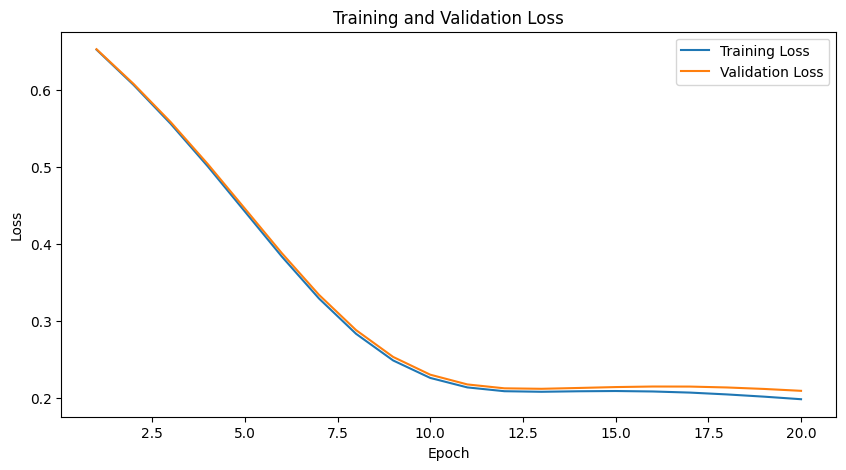

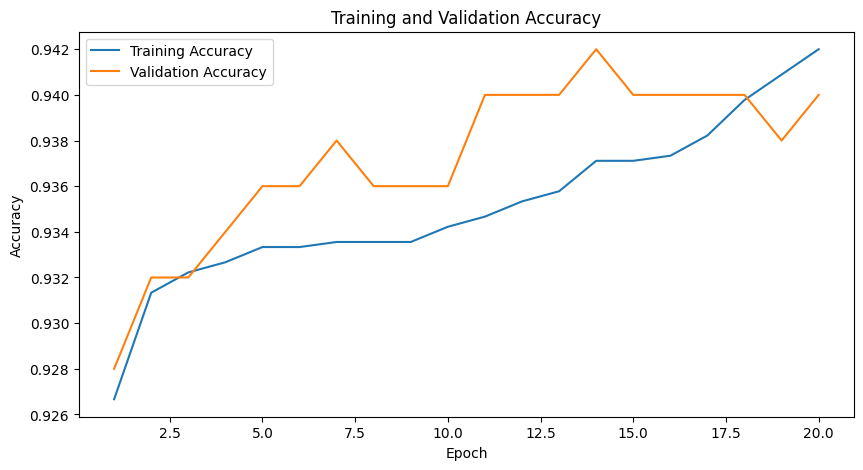

In [ ]:
# Define the number of epochs
num_epochs = 20

# Define lists to store training and validation scores
train_loss = []
train_accuracy = []
val_loss = []
val_accuracy = []

# Training loop
for epoch in range(num_epochs):
    # Fit the model for one epoch
    lstm_model.fit_model(lstm_x_train_reshaped, lstm_y_train, lstm_x_val=lstm_x_test_reshaped, lstm_y_val=lstm_y_test, skf=lstm_skf, batch_size=2000, epochs=1)

    # Evaluate the model on training and validation data
    train_metrics = lstm_model.model.evaluate(lstm_x_train_reshaped, lstm_y_train, verbose=0)
    val_metrics = lstm_model.model.evaluate(lstm_x_test_reshaped, lstm_y_test, verbose=0)

    # Store the training and validation scores
    train_loss.append(train_metrics[0])
    train_accuracy.append(train_metrics[1])
    val_loss.append(val_metrics[0])
    val_accuracy.append(val_metrics[1])

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

##############################################################
##THIS CODE WAS DEVELOPED USING EXISTING CODE: (Stack Overflow, n.d.) ##
##############################################################

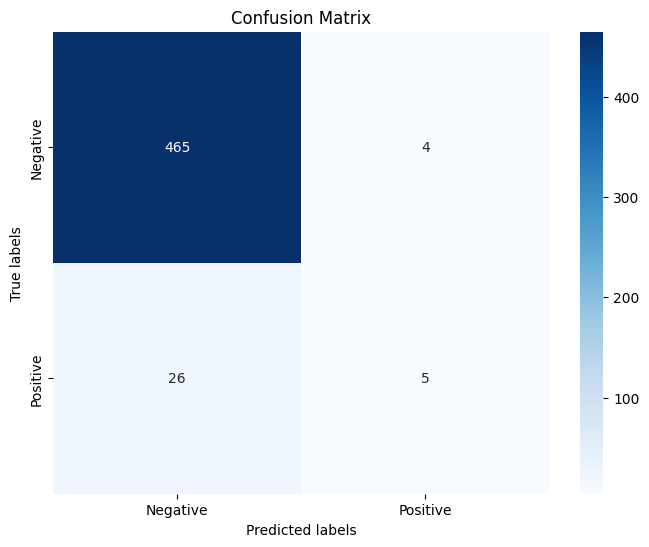

True Negatives (TN): 465
False Positives (FP): 4
False Negatives (FN): 26
True Positives (TP): 5


In [ ]:
# Evaluation of the model
lstm_y_pred = lstm_model.predict(lstm_x_test_reshaped)

# Compute confusion matrix
conf_matrix = confusion_matrix(lstm_y_test, lstm_y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Labeling the confusion matrix
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

In [ ]:
# Prints Evaluation Metrics
lstm_model.evaluate_model(lstm_x_test_reshaped, lstm_y_test)

Accuracy: 0.940000
Precision: 0.555556
Recall: 0.161290
F1: 0.250000


###### Grid Search for Optimal Model with Evaluation

In [ ]:
class MyHyperModelLSTM(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=16),
                       activation=hp.Choice('activation', ['relu', 'tanh', 'sigmoid']),
                       input_shape=self.input_shape))
        model.add(Dense(1, activation='sigmoid'))  # Adjust output size as needed

        model.compile(
            optimizer=hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop']),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model


In [ ]:
# Define the objective as finding best validation accuracy
objective_lstm = Objective(name='val_accuracy', direction='max')

# Create the tuner using this objective with 100 trials and search
tuner_lstm = RandomSearch(
    hypermodel=MyHyperModelLSTM(input_shape=(1, 140)),
    objective=objective_lstm,
    max_trials=20,
    directory='tuning_results',
    project_name='improved_lstm'
)

# Start the search for best hyperparameters
tuner_lstm.search(lstm_x_train_reshaped, lstm_y_train,
                  validation_data=(lstm_x_test_reshaped, lstm_y_test))


Reloading Tuner from tuning_results/improved_lstm/tuner0.json


In [ ]:
# Get the best hyperparameters for the LSTM model
best_hp_lstm = tuner_lstm.get_best_hyperparameters()[0]
print("Best Hyperparameters:")
print(best_hp_lstm.values)

# Get the best LSTM model
best_model_lstm = tuner_lstm.get_best_models()[0]
print("Best Model Summary:")
best_model_lstm.summary()


Best Hyperparameters:
{'units': 112, 'activation': 'relu', 'optimizer': 'rmsprop'}


Best Model Summary:
Model: "sequential"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 112)               113344    
                                                                 
 dense (Dense)               (None, 1)                 113       
                                                                 
Total params: 113457 (443.19 KB)
Trainable params: 113457 (443.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load the best LSTM model
best_model_lstm = tuner_lstm.get_best_models(num_models=1)[0]

# Compile the model with appropriate metrics
best_model_lstm.compile(optimizer='adam', loss='binary_crossentropy',
                        metrics=['accuracy', Precision(name='precision'),
                                 Recall(name='recall'), F1Score(name='f1_score'),
                                 TruePositives(name='true_positives'),
                                 FalsePositives(name='false_positives'),
                                 TrueNegatives(name='true_negatives'),
                                 FalseNegatives(name='false_negatives')])

# Convert labels to float32
lstm_y_train = np.array(lstm_y_train, dtype=np.float32)
lstm_y_test = np.array(lstm_y_test, dtype=np.float32)

# Train the best LSTM model
best_model_lstm_history = best_model_lstm.fit(lstm_x_train_reshaped, lstm_y_train,
                                              epochs=100, batch_size=2000,
                                              validation_data=(lstm_x_test_reshaped, lstm_y_test))

Epoch 1/100
3/3 [==============================] - 7s 393ms/step - loss: 0.1332 - accuracy: 0.9529 - precision: 0.8142 - recall: 0.3251 - f1_score: 0.1183 - true_positives: 92.0000 - false_positives: 21.0000 - true_negatives: 4196.0000 - false_negatives: 191.0000 - val_loss: 0.1457 - val_accuracy: 0.9440 - val_precision: 0.6154 - val_recall: 0.2581 - val_f1_score: 0.1168 - val_true_positives: 8.0000 - val_false_positives: 5.0000 - val_true_negatives: 464.0000 - val_false_negatives: 23.0000
Epoch 2/100
3/3 [==============================] - 0s 56ms/step - loss: 0.1306 - accuracy: 0.9513 - precision: 0.7759 - recall: 0.3180 - f1_score: 0.1183 - true_positives: 90.0000 - false_positives: 26.0000 - true_negatives: 4191.0000 - false_negatives: 193.0000 - val_loss: 0.1413 - val_accuracy: 0.9520 - val_precision: 0.7059 - val_recall: 0.3871 - val_f1_score: 0.1168 - val_true_positives: 12.0000 - val_false_positives: 5.0000 - val_true_negatives: 464.0000 - val_false_negatives: 19.0000
Epoch 3/10

In [ ]:
# Get predictions from the optimal LSTM model
lstm_train_predictions = best_model_lstm.predict(lstm_x_train_reshaped, batch_size=2000)
lstm_test_predictions = best_model_lstm.predict(lstm_x_test_reshaped, batch_size=2000)


1/1 [==============================] - 0s 31ms/step


In [ ]:
# Evaluate the optimal LSTM model on test data and display loss/accuracy
improved_results_lstm = best_model_lstm.evaluate(lstm_x_test_reshaped, lstm_y_test, batch_size=2000, verbose=0)
for name, value in zip(best_model_lstm.metrics_names, improved_results_lstm):
    print(name, ': ', value)
print()

loss :  0.11465432494878769
accuracy :  0.9660000205039978
precision :  0.8500000238418579
recall :  0.5483871102333069
f1_score :  [0.11676082]
true_positives :  17.0
false_positives :  3.0
true_negatives :  466.0
false_negatives :  14.0



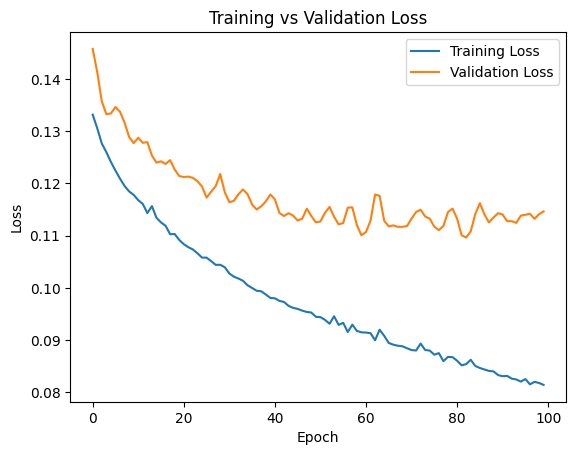

In [ ]:
# Plot training & validation loss values for best LSTM model
plt.plot(best_model_lstm_history.history['loss'])
plt.plot(best_model_lstm_history.history['val_loss'])
plt.title('Training vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# **Streamlit Code**

In [ ]:
#Install Streamlit library
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
#Save all models
vae.save('anomaly_detection', save_format='tf')
best_model_clf.save('classification')
best_model_l.save("Time_Series")
best_model_lstm.save("Time_Instance")
autoencoder.save("DNN1", save_format='tf')
autoencoder_dnn2.save("DNN2", save_format='tf')

In [ ]:
#Install localtunnel to serve the Streamlit app
! npm install -g localtunnel


/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 2.133s


In [ ]:
#Install Streamlit library
!pip install -q streamlit

In [ ]:
#Added purely so I can remove from main bit to check indentation and then I won't loose it. No need to run

# %%writefile 7app.py

In [ ]:
threshold_cfl1 = 0.6
predictions_labels_train_clf = ["normal" if pred[0] >= threshold else "anomalous" for pred in clf_train_predictions_improved11]
predictions_labels_test_clf = ["normal" if pred[0] >= threshold else "anomalous" for pred in clf_train_predictions_improved11]


train_predictions_df_clf = pd.DataFrame(predictions_labels_train_clf, columns=["Prediction"])
test_predictions_df_clf = pd.DataFrame(predictions_labels_test_clf, columns=["Prediction"])

combined_predictions_df_clf = pd.concat([train_predictions_df_clf, test_predictions_df_clf], ignore_index = True)

combined_predictions_df_clf.to_csv("combined_predictions.csv", index=False)

In [ ]:
threshold_cfl1 = 0.6
predictions_labels_train_TS = ["normal" if pred[0] >= threshold else "anomalous" for pred in y_pred_probs_layers]
predictions_labels_test_TS = ["normal" if pred[0] >= threshold else "anomalous" for pred in y_pred_probs_layers]

train_predictions_df_TS = pd.DataFrame(predictions_labels_train_TS, columns=["Prediction"])
test_predictions_df_TS = pd.DataFrame(predictions_labels_test_TS, columns=["Prediction"])

combined_predictions_df_TS = pd.concat([train_predictions_df_TS, test_predictions_df_TS], ignore_index = True)

combined_predictions_df_TS.to_csv("combined_predictions_TS.csv", index=False)

In [ ]:
threshold_cfl1 = 0.6
predictions_labels_train_TI = ["normal" if pred[0] >= threshold else "anomalous" for pred in lstm_train_predictions]
predictions_labels_test_TI = ["normal" if pred[0] >= threshold else "anomalous" for pred in lstm_test_predictions]

train_predictions_df_TI = pd.DataFrame(predictions_labels_train_TS, columns=["Prediction"])
test_predictions_df_TI = pd.DataFrame(predictions_labels_test_TS, columns=["Prediction"])

combined_predictions_df_TI = pd.concat([train_predictions_df_TS, test_predictions_df_TS], ignore_index = True)

combined_predictions_df_TI.to_csv("combined_predictions_TI.csv", index=False)

In [ ]:
#DNN1 Prediction Labels

threshold = 0.029764771

# Predict anomalies using the autoencoder model
predictions = tf.math.less(test_loss, threshold)

# Convert predictions to numpy array
predictions_np = predictions.numpy()

# Generate labels based on predictions
predictions_labels_test_autoencoder = ["normal" if pred >= threshold else "anomalous" for pred in predictions_np]

# Create DataFrame for test predictions
test_predictions_df_dnn1 = pd.DataFrame(predictions_labels_test_autoencoder, columns=["Prediction"])
test_predictions_df_dnn1.head()

test_predictions_df_dnn1.to_csv("test_predictions_df_dnn1.csv", index=False)

In [ ]:
# Filter out rows with "normal" predictions
anomalous_predictions_df_dnn1 = test_predictions_df_dnn1[test_predictions_df_dnn1["Prediction"] == "anomalous"]

# Save the filtered DataFrame to a CSV file
anomalous_predictions_df_dnn1.to_csv("test_predictions_df_dnn1_filtered.csv", index=False)

In [ ]:
############UPDATED CODE##############

%%writefile 7app.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load models
model_AD = load_model("anomaly_detection")
model_CL = load_model("classification")
model_TS = load_model("Time_Series")
model_TI = load_model("Time_Instance")
model_DNN1 = load_model("DNN1")
model_DNN2 = load_model("DNN2")


# Load combined_predictions_df_clf DataFrame
combined_predictions_df_clf = pd.read_csv("combined_predictions.csv")

# Load combined_predictions_df_TS DataFrame
combined_predictions_df_TS = pd.read_csv("combined_predictions_TS.csv")

# Load combined_predictions_df_TI DataFrame
combined_predictions_df_TI = pd.read_csv("combined_predictions_TI.csv")

# Load dnn1 DataFrame
test_predictions_df_dnn1 = pd.read_csv("test_predictions_df_dnn1_filtered.csv")

# Function to load preloaded dataset
def load_preloaded_dataset():
    return pd.read_csv("Combined.csv")

# Function to select a random record by class
def select_random_record_by_class(dataset, class_label):
    class_records = dataset[dataset.iloc[:, 0] == class_label]
    if not class_records.empty:
        return class_records.sample(n=1).iloc[0]
    else:
        return None

# Function to display prediction label for selected heartbeat and plot records
def display_prediction_label(index, predictions_df):
    if index >= len(predictions_df):
        st.error("Invalid index. Please select a valid index.")
        return

    dataset = load_preloaded_dataset()
    baseline_record = dataset.iloc[839, 1:]
    selected_record = dataset.iloc[index, 1:]

    # Plot the records
    plt.figure(figsize=(10, 6))
    plt.plot(baseline_record, color='red', label='Baseline Record (Index 839)')
    plt.plot(selected_record, color='green', label='Selected Record')
    plt.title("Comparison of Baseline Record and Selected Record")
    plt.xlabel("Time Step")
    plt.ylabel("Feature Value")
    plt.xticks(np.arange(0, 145, 5))
    plt.legend()
    st.pyplot(plt)

    # Display prediction label
    prediction_label = predictions_df.loc[index, "Prediction"]
    st.write(f"Prediction for heartbeat: {prediction_label}")

# Main function
def main():
    st.title("CI7520: Assignment 2 - Timeseries Anomaly Detection")

    menu = ["Home", "Dataset", "Existing Deep Neural Networks", "Designed Deep Neural Networks"]
    choice = st.sidebar.selectbox('Menu', menu)

    if choice == 'Home':
        st.title("Home Page")
        st.subheader("Group Members")
        st.write("Becca Bird - K2364371")
        st.write("Bri Dawes - K2369145")
        st.write("Meena Sornnin - K1916640")
        st.write("Zakir Zahir - K2016609")

    elif choice == 'Dataset':
        dataset = load_preloaded_dataset()
        if dataset is not None:
            st.write("ECG5000 Dataset (Combined):")
            st.write(dataset.head())

        st.subheader("Initial Data Analysis")
        st.write("After confirming that each dataset had no missing records, we combined both the test and training datasets. From here, we visualised the counts of each target variable.")

        # Target variable pie chart (IDA)
        tvfig, ax = plt.subplots(figsize=(7, 7), dpi=150)
        ax.pie(x=dataset.iloc[:, 0].value_counts(), autopct='%1.1f%%', labels=dataset.iloc[:, 0].value_counts().index)
        ax.legend(dataset.iloc[:, 0].value_counts().index)
        ax.set_title('Distribution of heartbeat samples per class')
        st.pyplot(tvfig)

    elif choice == 'Existing Deep Neural Networks':
        st.sidebar.subheader("Choose Existing DNN")
        dnn_options = ["Existing DNN 1 - Minesh A Jethva", "Existing DNN 2 - Amardeep Chauhan"]
        selected_e_dnn = st.sidebar.selectbox("Select DNN", dnn_options)

        dataset = load_preloaded_dataset()

        if selected_e_dnn == 'Existing DNN 1 - Minesh A Jethva':
            st.subheader("Existing DNN 1 - Minesh A Jethva")
            st.subheader(selected_e_dnn)

            st.write("Choose dataset:")
            option = st.radio("Select Option", ("Upload Your Own", "Use Preloaded Dataset"))

            if option == "Upload Your Own":
                uploaded_file = st.file_uploader("Upload your own dataset (CSV)", type=['csv'])
                if uploaded_file is not None:
                    dataset = pd.read_csv(uploaded_file)
                    st.write("Uploaded dataset:")
                    st.write(dataset.head())

            elif option == "Use Preloaded Dataset":
                st.write("Using preloaded dataset (ECG5000):")
                st.write(dataset.head())

                if selected_e_dnn == 'Existing DNN 1 - Minesh A Jethva':
                    predictions_df = test_predictions_df_dnn1

                else:
                    predictions_df = test_predictions_df_dnn1

                selection_option = st.radio("Select Option", ("Random Record", "Random Record by Class"))

                if selection_option == "Random Record":
                    random_record = dataset.sample()
                    index = random_record.index[0]
                    st.write("Randomly selected heartbeat:")
                    st.table(random_record)
                    if st.button("Show Prediction Label"):
                        display_prediction_label(index, predictions_df)

                elif selection_option == "Random Record by Class":
                    class_labels = dataset.iloc[:, 0].unique()
                    class_label = st.selectbox("Select a class label", class_labels)
                    class_indices_ecg = dataset.index[dataset.iloc[:, 0] == class_label]
                    class_indices_clf = class_indices_ecg.intersection(predictions_df.index)
                    random_record_by_class = select_random_record_by_class(dataset, class_label)
                    index = random_record_by_class.index[0]
                    if random_record_by_class is not None:
                        st.write("Random heartbeat from class", class_label, ":")
                        st.table(pd.DataFrame(random_record_by_class).T.rename(columns={0: 'Class', **{i: f'Feature {i}' for i in range(1, 141)}}))
                        if st.button("Show Prediction Label"):
                            display_prediction_label(int(index), predictions_df)

        elif selected_e_dnn == 'Existing DNN 2 - Amardeep Chauhan':
            st.subheader("Existing DNN 2 - Amardeep Chauhan")
            st.subheader(selected_e_dnn)

            st.write("Choose dataset:")
            option = st.radio("Select Option", ("Upload Your Own", "Use Preloaded Dataset"))

            if option == "Upload Your Own":
                uploaded_file = st.file_uploader("Upload your own dataset (CSV)", type=['csv'])
                if uploaded_file is not None:
                    dataset = pd.read_csv(uploaded_file)
                    st.write("Uploaded dataset:")
                    st.write(dataset.head())

            elif option == "Use Preloaded Dataset":
                st.write("Using preloaded dataset (ECG5000):")
                st.write(dataset.head())

                if selected_e_dnn == 'Existing DNN 2 - Amardeep Chauhan':
                    predictions_df = combined_predictions_df_TS
                else:
                    predictions_df = combined_predictions_df_TS  # Change this to your classification predictions DataFrame

                selection_option = st.radio("Select Option", ("Random Record", "Random Record by Class"))

                if selection_option == "Random Record":
                    random_record = dataset.sample()
                    index = random_record.index[0]
                    st.write("Randomly selected heartbeat:")
                    st.table(random_record)
                    if st.button("Show Prediction Label"):
                        display_prediction_label(index, predictions_df)

                elif selection_option == "Random Record by Class":
                    class_labels = dataset.iloc[:, 0].unique()
                    class_label = st.selectbox("Select a class label", class_labels)
                    class_indices_ecg = dataset.index[dataset.iloc[:, 0] == class_label]
                    class_indices_clf = class_indices_ecg.intersection(predictions_df.index)
                    random_record_by_class = select_random_record_by_class(dataset, class_label)
                    index = random_record_by_class.index[0]
                    if random_record_by_class is not None:
                        st.write("Random heartbeat from class", class_label, ":")
                        st.table(pd.DataFrame(random_record_by_class).T.rename(columns={0: 'Class', **{i: f'Feature {i}' for i in range(1, 141)}}))
                        if st.button("Show Prediction Label"):
                            display_prediction_label(int(index), predictions_df)

    elif choice == 'Designed Deep Neural Networks':
        st.sidebar.subheader("Choose DNN")
        dnn_options = ["Anomaly Detection", "Classification", "Time Series", "Time Instance"]
        selected_dnn = st.sidebar.selectbox("Select DNN", dnn_options)

        dataset = load_preloaded_dataset()

        if selected_dnn in ['Anomaly Detection', 'Classification']:
            st.subheader(selected_dnn)

            st.write("Choose dataset:")
            option = st.radio("Select Option", ("Upload Your Own", "Use Preloaded Dataset"))

            if option == "Upload Your Own":
                uploaded_file = st.file_uploader("Upload your own dataset (CSV)", type=['csv'])
                if uploaded_file is not None:
                    dataset = pd.read_csv(uploaded_file)
                    st.write("Uploaded dataset:")
                    st.write(dataset.head())

            elif option == "Use Preloaded Dataset":
                st.write("Using preloaded dataset (ECG5000):")
                st.write(dataset.head())

                if selected_dnn == 'Anomaly Detection':
                    predictions_df = combined_predictions_df_clf
                else:
                    predictions_df = combined_predictions_df_clf  # Change this to your classification predictions DataFrame

                selection_option = st.radio("Select Option", ("Random Record", "Random Record by Class"))

                if selection_option == "Random Record":
                    random_record = dataset.sample()
                    index = random_record.index[0]
                    st.write("Randomly selected heartbeat:")
                    st.table(random_record)
                    if st.button("Show Prediction Label"):
                        display_prediction_label(index, predictions_df)

                elif selection_option == "Random Record by Class":
                    class_labels = dataset.iloc[:, 0].unique()
                    class_label = st.selectbox("Select a class label", class_labels)
                    class_indices_ecg = dataset.index[dataset.iloc[:, 0] == class_label]
                    class_indices_clf = class_indices_ecg.intersection(predictions_df.index)
                    random_record_by_class = select_random_record_by_class(dataset, class_label)
                    index = random_record_by_class.index[0]
                    if random_record_by_class is not None:
                        st.write("Random heartbeat from class", class_label, ":")
                        st.table(pd.DataFrame(random_record_by_class).T.rename(columns={0: 'Class', **{i: f'Feature {i}' for i in range(1, 141)}}))
                        if st.button("Show Prediction Label"):
                            display_prediction_label(int(index), predictions_df)

        elif selected_dnn == 'Time Series':

            st.subheader(selected_dnn)
            st.write("Choose dataset:")
            option = st.radio("Select Option", ("Upload Your Own", "Use Preloaded Dataset"))

            if option == "Upload Your Own":
                uploaded_file = st.file_uploader("Upload your own dataset (CSV)", type=['csv'])
                if uploaded_file is not None:
                    dataset = pd.read_csv(uploaded_file)
                    st.write("Uploaded dataset:")
                    st.write(dataset.head())

            elif option == "Use Preloaded Dataset":
                st.write("Using preloaded dataset (ECG5000):")
                st.write(dataset.head())


                if selected_dnn == 'Time Series':
                    predictions_df = combined_predictions_df_TS
                else:
                    predictions_df = combined_predictions_df_TS

                selection_option = st.radio("Select Option", ("Random Record", "All Instances", "Random Record by Class"))

                if selection_option == "Random Record":
                    random_record = dataset.sample()
                    index = random_record.index[0]
                    st.write("Randomly selected heartbeat:")
                    st.table(random_record)
                    if st.button("Show Prediction Label"):
                        display_prediction_label(index, predictions_df)


                elif selection_option == "All Instances":
                    st.write("All Heartbeats:")
                    for i in range(len(dataset)):
                        plt.figure(figsize=(10, 6))
                        plt.plot(dataset.iloc[i, 1:], label=f'Instance {i+1}')
                    plt.title("All Instances")
                    plt.xlabel("Time Step")
                    plt.ylabel("Feature Value")
                    plt.xticks(np.arange(0, 145, 5))
                    plt.legend()
                    st.pyplot(plt.gcf())

                elif selection_option == "Random Record by Class":
                    class_labels = dataset.iloc[:, 0].unique()
                    class_label = st.selectbox("Select a class label", class_labels)
                    class_indices_ecg = dataset.index[dataset.iloc[:, 0] == class_label]
                    class_indices_clf = class_indices_ecg.intersection(predictions_df.index)
                    random_record_by_class = select_random_record_by_class(dataset, class_label)
                    index = random_record_by_class.index[0]
                    if random_record_by_class is not None:
                        st.write("Random heartbeat from class", class_label, ":")
                        st.table(pd.DataFrame(random_record_by_class).T.rename(columns={0: 'Class', **{i: f'Feature {i}' for i in range(1, 141)}}))
                        if st.button("Show Prediction Label"):
                            display_prediction_label(int(index), predictions_df)

        elif selected_dnn == 'Time Instance':

            st.subheader(selected_dnn)
            st.write("Choose dataset:")
            option = st.radio("Select Option", ("Upload Your Own", "Use Preloaded Dataset"))

            if option == "Upload Your Own":
                uploaded_file = st.file_uploader("Upload your own dataset (CSV)", type=['csv'])
                if uploaded_file is not None:
                    dataset = pd.read_csv(uploaded_file)
                    st.write("Uploaded dataset:")
                    st.write(dataset.head())

            elif option == "Use Preloaded Dataset":
                st.write("Using preloaded dataset (ECG5000):")
                st.write(dataset.head())


                if selected_dnn == 'Time Instance':
                    predictions_df = combined_predictions_df_TI
                else:
                    predictions_df = combined_predictions_df_TI

                selection_option = st.radio("Select Option", ("Random Record", "Random Record by Class"))

                if selection_option == "Random Record":
                    random_record = dataset.sample()
                    index = random_record.index[0]
                    st.write("Randomly selected heartbeat:")
                    st.table(random_record)
                    if st.button("Show Prediction Label"):
                        display_prediction_label(index, predictions_df)

                elif selection_option == "Random Record by Class":
                    class_labels = dataset.iloc[:, 0].unique()
                    class_label = st.selectbox("Select a class label", class_labels)
                    class_indices_ecg = dataset.index[dataset.iloc[:, 0] == class_label]
                    class_indices_clf = class_indices_ecg.intersection(predictions_df.index)
                    random_record_by_class = select_random_record_by_class(dataset, class_label)
                    index = random_record_by_class.index[0]
                    if random_record_by_class is not None:
                        st.write("Random heartbeat from class", class_label, ":")
                        st.table(pd.DataFrame(random_record_by_class).T.rename(columns={0: 'Class', **{i: f'Feature {i}' for i in range(1, 141)}}))
                        if st.button("Show Prediction Label"):
                            display_prediction_label(int(index), predictions_df)

if __name__ == '__main__':
    main()

In [ ]:
#Run the Streamlit app in the background
!streamlit run 7app.py &>/content/logs.txt &

In [ ]:
#Expose the Streamlit app on port 8501
#Then just click in the url showed.
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.224.150.97
npx: installed 22 in 4.395s
your url is: https://four-towns-enter.loca.lt


# **References**

Bajaj, A. (2023) *Anomaly Detection in Time Series*. Available at: https://neptune.ai/blog/anomaly-detection-in-time-series [Accessed 03rd April 2024]

Chauhan, A (2022) *Image compression & Anomaly detection on ECG5000*.Available at:https://www.kaggle.com/code/amar09/image-compression-anomaly-detection-on-ecg5000 [Accessed 11th March 2024]

‌Chollet, F. (2020). The Sequential model. [online] keras.io. Available at: https://keras.io/guides/sequential_model/.

DataCamp (2024) *A Comprehensive Introduction to Anomaly Detection*. Available at: https://www.datacamp.com/tutorial/introduction-to-anomaly-detection [Accessed 27th March 2024]

Fazeli, S (2016).*ECG Heartbeat Categorization Dataset*. Available at: https://www.kaggle.com/datasets/shayanfazeli/heartbeat [Accessed 25th March 2024]

Gavrilova, Y. (2021)*What Is Anomaly Detection in Machine Learning?*Available at: https://serokell.io/blog/anomaly-detection-in-machine-learning [Accessed 17th March 2024]

Geeks for Geeks (2023). *Anomaly Detection in Time Series Data*.Available at: https://www.geeksforgeeks.org/anomaly-detection-in-time-series-data/ [Accessed 08th April 2024]

GitHub. (n.d.). keras/keras/metrics/metric.py at v3.2.0 · keras-team/keras. [online] Available at: https://github.com/keras-team/keras/blob/v3.2.0/keras/metrics/metric.py#L9 [Accessed 15 Apr. 2024].

Harikrishnan N B(2019) *Confusion Matrix, Accuracy, Precision, Recall, F1 Score*. Available at https://medium.com/analytics-vidhya/confusion-matrix-accuracy-precision-recall-f1-score-ade299cf63cd [Accessed 19th March 2024]

IBM (2024) *Anomaly detection in machine learning: Finding outliers for optimization of business functions*. Available at: https://www.ibm.com/blog/anomaly-detection-machine-learning/ [Accessed 01st April 2024]

Jethva MA (2021) *ECG Anomaly Detection*.Available at: https://www.kaggle.com/code/mineshjethva/ecg-anomaly-detection [Accessed 11th March 2024]

Maklin, C. (2022). *Synthetic Minority Over-sampling Technique (SMOTE)*. Available at: https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c [Accessed 26th March 2024]

Mathworks (2024). *Time Series Anomaly Detection Using Deep Learning*.Available at: https://ch.mathworks.com/help/deeplearning/ug/time-series-anomaly-detection-using-deep-learning.html [Accessed 06th April 2024]

ML Lectures(2024). *Exercise: Anomaly Detection*. Available at : https://ml-lectures.org/docs/unsupervised_learning/Anomaly_Detection_RNN_AE_VAE.html#:~:text=Autoencoder%20for%20anomaly%20detection,-Usually%20we%20do&text=The%20objective%20of%20an%20autoencoder,these%20examples%20with%20minimal%20error. [Accessed 6th April 2024]

Noor ST, Asad ST, Khan MM, Gaba GS, Al-Amri JF, Masud M. *Predicting the Risk of Depression Based on ECG Using RNN.* Comput Intell Neurosci 2021 (Jul 28;2021). Available at: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8342171/ [Accessed 13th March 2024]

Papers with Code (2024). *ECG5000*. Available at: https://paperswithcode.com/dataset/ecg5000 [Accessed 21st March 2024]

Sciascio, E. D., et al,(2021). *'Robust Anomaly Detection in Time Series through Variational AutoEncoders and a Local Similarity Score*', Online, https://www.scitepress.org/PublishedPapers/2021/103205/103205.pdf [Accessed 08 April 2024].

SciKit-Learn(2024).*Multiclass Receiver Operating Characteristic (ROC).* Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#:~:text=One%2Dvs%2DRest%20multiclass%20ROC,-The%20One%2Dvs&text=The%20OvR%20ROC%20evaluation%20can,encoding%20in%20a%20OvR%20fashion  [Accessed 24 March 2024]

Stack Overflow. (n.d.). *How to properly set the input_shape of LSTM layers?*Available at: https://stackoverflow.com/questions/61153831/how-to-properly-set-the-input-shape-of-lstm-layers [Accessed 26th March 2024]

Stack Overflow. (n.d.). *Tensorflow Keras LSTM not training - affected by number_of_epochs, optimizer adam.* Available at: https://stackoverflow.com/questions/52522590/tensorflow-keras-lstm-not-training-affected-by-number-of-epochs-optimizer-ada [Accessed 26th March 2024]

Stack Overflow. (n.d.). Different Numpy reshaping to 3D array syntax’s. [online] Available at: https://stackoverflow.com/questions/59978242/different-numpy-reshaping-to-3d-array-syntaxs [Accessed 15 Apr. 2024].

Team, K. (n.d.). Keras documentation: Metrics. [online] keras.io. Available at: https://keras.io/api/metrics/.

TensorFlow(2024). *Classification on imbalanced data .* Available at: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data [Accessed 11 March 2024]

TensorFlow(2024). *Classify structured data using Keras preprocessing layers.* Available at: https://https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers  [Accessed 11 March 2024]

TensorFlow. (n.d.). Introduction to the Keras Tuner | TensorFlow Core. [online] Available at: https://www.tensorflow.org/tutorials/keras/keras_tuner#:~:text=The%20Keras%20Tuner%20is%20a [Accessed 15 Apr. 2024].

TensorFlow(2024). *Hyperparameter Tuning with the HParams Dashboard*. Available at: https://www.tensorflow.org/tensorboard/hyperparameter_tuning_with_hparams  [Accessed 5th April 2024]

TensorFlow(2024).*Time series forecasting*.Available at: https://www.tensorflow.org/tutorials/structured_data/time_series [Accessed 11 March 2024]

Team, K. (n.d.). Keras documentation: The base HyperModel class. [online] keras.io. Available at: https://keras.io/api/keras_tuner/hypermodels/base_hypermodel/#:~:text=Users%20should%20subclass%20the%20HyperModel [Accessed 15 Apr. 2024].

TensorFlow. (n.d.). Training & evaluation with the built-in methods | TensorFlow Core. [online] Available at: https://www.tensorflow.org/guide/keras/training_with_built_in_methods.

Time Series Classification.*Dataset: ECG5000.*Available at:https://www.timeseriesclassification.com/description.php?Dataset=ECG5000 [Accessed 25th March 2024]

TensorFlow. (n.d.). tf.keras.Sequential | TensorFlow Core v2.3.0. [online] Available at: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential.
